Description: Jupyter notebook to visualize the results of the different Hamiltonian learning experiments

In [1]:
# Imports
import os, sys, types
import pathlib

In [2]:
# Add paths
import itertools
import math
import sympy
import numpy as np
import scipy.linalg
import scipy.stats
import scipy.optimize
import scipy.fftpack

import tensorflow  as  tf
tf.compat.v1.enable_eager_execution(config=None, device_policy=None, execution_mode=None)

#import seaborn as sns
#import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import pickle

from importlib import reload
from sympy.physics.quantum.dagger import Dagger

In [3]:
# Local package imports
# Update this with setup & develop later
PROJECT_PATH = str(pathlib.Path().resolve().parent)
sys.path.append(PROJECT_PATH)

In [5]:
import hamiltonianlearner

In [6]:
import hamiltonianlearner.quantum_system_oracles.process_data as process_data
import hamiltonianlearner.quantum_system_oracles.simulate_nature as simulate_nature
import hamiltonianlearner.quantum_system_models.quantum_device_models as quantum_device_models
import hamiltonianlearner.learners.design_experiment as design_experiment

In [7]:
# estimators
import hamiltonianlearner.estimators.initial_estimators as initial_estimators
import hamiltonianlearner.estimators.mle_estimators as mle_estimators
import hamiltonianlearner.estimators.estimation_procedure as estimation_procedure

In [8]:
# For plotting purposes
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
import yaml
#import unit_tests
import functools

In [10]:
import hamiltonianlearner.utils.learner_experiment_utils as learner_experiment_utils
import hamiltonianlearner.utils.job_helper as job_helper
import hamiltonianlearner.utils.job_processor as job_processor

In [11]:
# Cool reloading
# Reference: https://stackoverflow.com/questions/28101895/reloading-packages-and-their-submodules-recursively-in-python

def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)

# Simulator: Long time interval -- MFC criterion is satisfied

## Simulation -- RMSE

Baseline

In [12]:
SAVE_DIR = 'passive_baseline_sim/passive_baseline_sim_long_001'
log_file = SAVE_DIR + '/log_job_1.txt'

contents_log = np.loadtxt(log_file,skiprows=1)
max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = False

results_job_PL_baseline = job_processor.extract_results_log(contents_log, max_iters, max_runs, 
                                                FLAG_log_mod=False, N_0=N_0, N_batch=N_batch, 
                                                FLAG_filter=FLAG_filter, do_plot=False)

0
0/200 runs failed
70.0
-0.24731722532313877


MLE

In [13]:
SAVE_DIR = 'passive_mle_sim/passive_mle_sim_long_000'
log_file = SAVE_DIR + '/log_job_0.txt'

contents_log = np.loadtxt(log_file,skiprows=1)
max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = False

results_job_PL_mle = job_processor.extract_results_log(contents_log, max_iters, max_runs, 
                                                FLAG_log_mod=False, N_0=N_0, N_batch=N_batch, 
                                                FLAG_filter=FLAG_filter, do_plot=False)

0
1/200 runs failed
70.0
-0.09887677792685527


HAL-FI

In [14]:
SAVE_DIR = 'FI_mle_sim/FI_mle_sim_long_000'
log_file = SAVE_DIR + '/log_job_0.txt'

contents_log = np.loadtxt(log_file,skiprows=1)
max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = False

results_job_AL = job_processor.extract_results_log(contents_log, max_iters, max_runs, 
                                                FLAG_log_mod=False, N_0=N_0, N_batch=N_batch, 
                                                FLAG_filter=FLAG_filter, do_plot=False)

0
38/200 runs failed
70.0
-0.43931527697387995


HAL-FIR

In [15]:
SAVE_DIR = 'FIR_mle_sim/FIR_mle_sim_long_000'
log_file = SAVE_DIR + '/log_job_0.txt'

contents_log = np.loadtxt(log_file,skiprows=1)
max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = False

results_job_AL_FIR = job_processor.extract_results_log(contents_log, max_iters, max_runs, 
                                                FLAG_log_mod=False, N_0=N_0, N_batch=N_batch, 
                                                FLAG_filter=FLAG_filter, do_plot=False)

0
30/200 runs failed
70.0
-0.9366278953991721


Qinfer

In [16]:
# SMC + Passive Learner (Uniform distribution) -- 5e3 particles
SAVE_DIR_log = 'bayesian_estimator_jobs/passive_sim_long_qinfer_002/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6

FLAG_filter = True
factor_filter=1.9

FLAG_rmse_test = False
FLAG_long_time_range = True

emp_PL_base_sim_qinfer = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

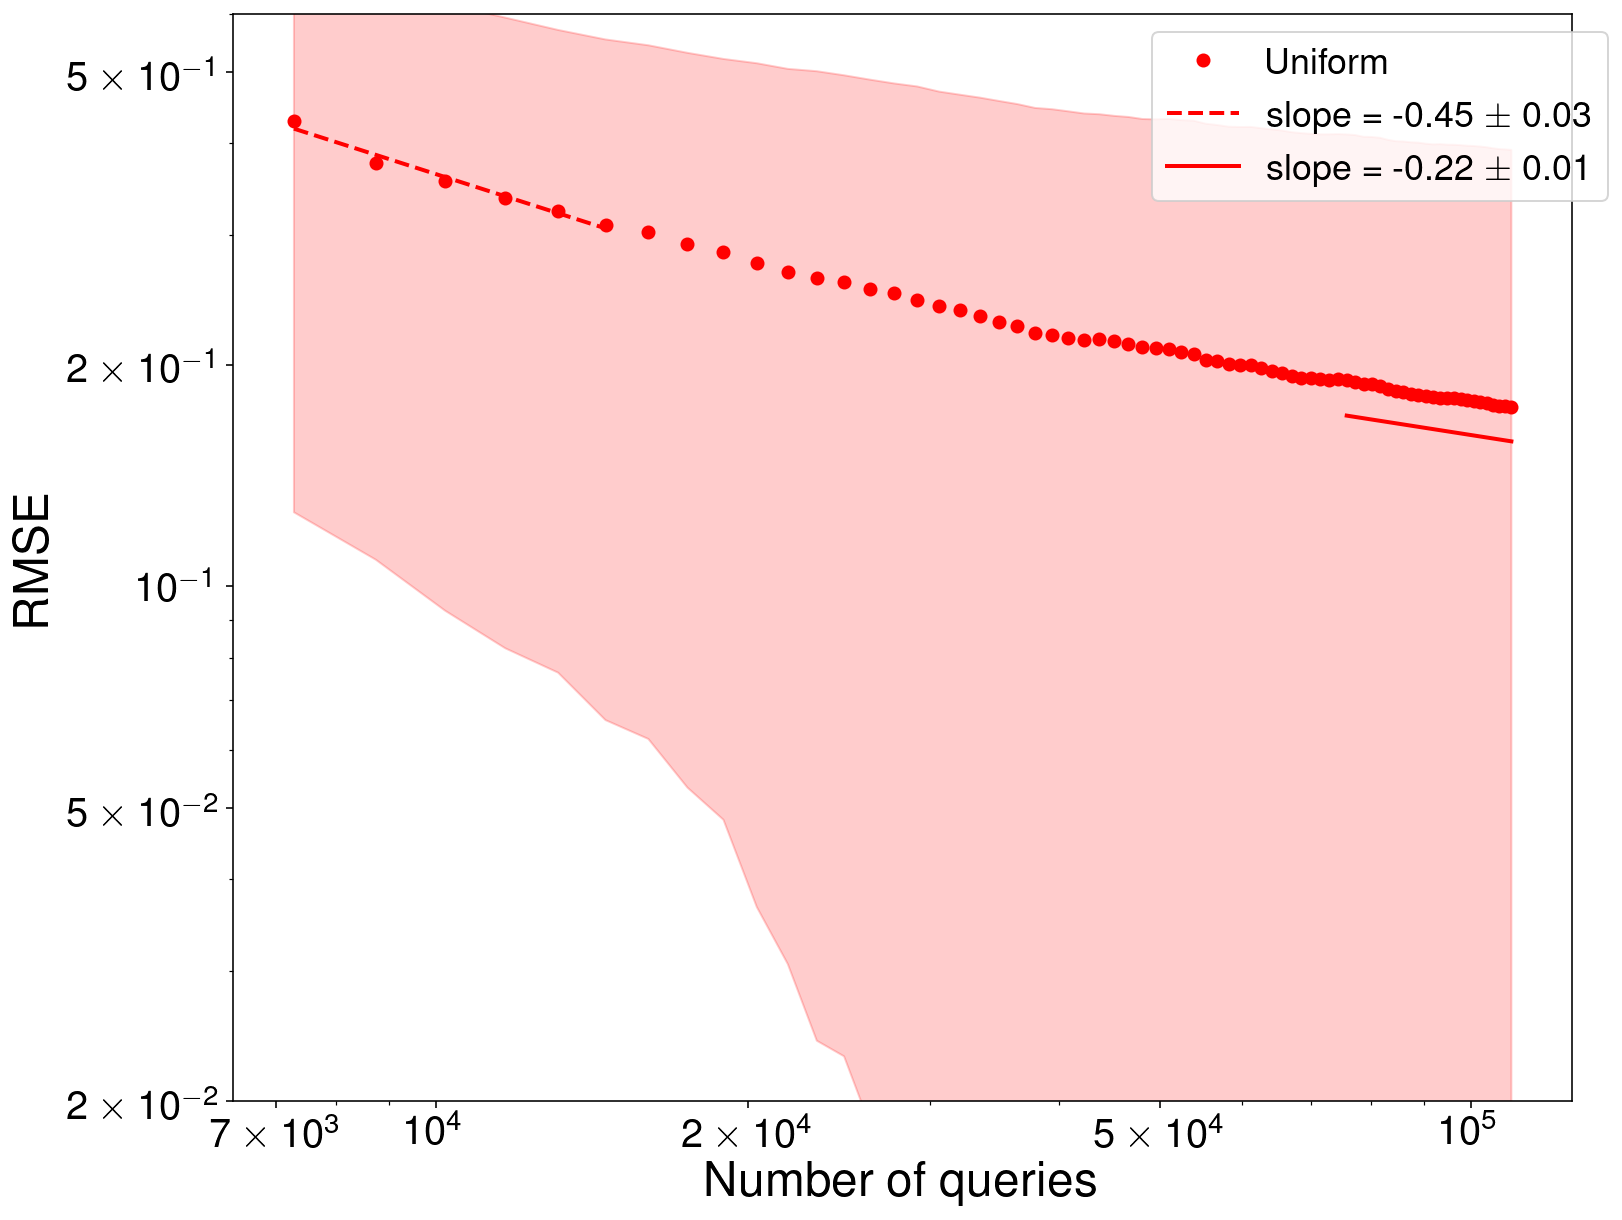

In [21]:
rmse_mean_qinfer, rmse_uncertainty_qinfer = emp_PL_base_sim_qinfer.plot_rmse(FLAG_plot=True)

Large uncertainty in above trend indicates that we need to carry out runs considering higher number of particles in the SMC method.

In [19]:
# SMC + Passive Learner (Uniform distribution) -- 1e4 particles
SAVE_DIR_log = 'bayesian_estimator_jobs/passive_sim_long_qinfer_003/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6

FLAG_filter = True
factor_filter=1.9

FLAG_rmse_test = False
FLAG_long_time_range = True

emp_PL_base_sim_qinfer = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

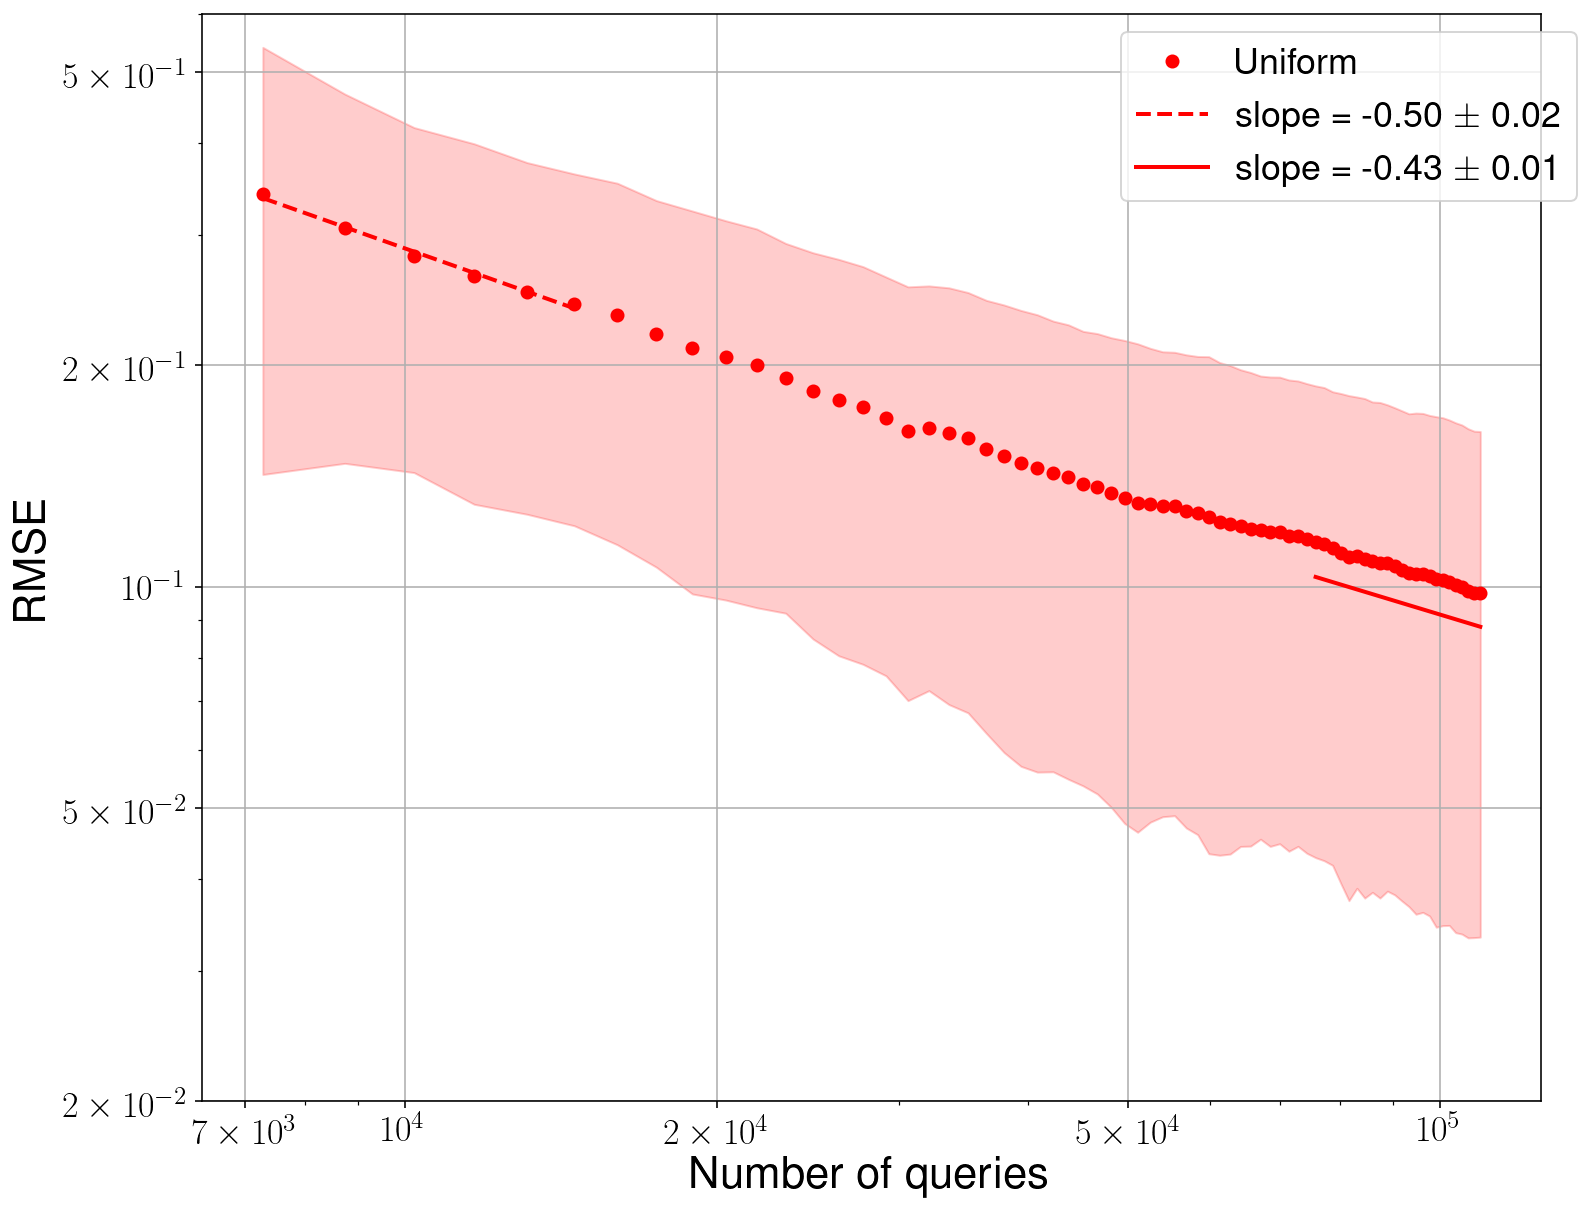

In [20]:
rmse_mean_qinfer2, rmse_uncertainty_qinfer2 = emp_PL_base_sim_qinfer.plot_rmse(FLAG_plot=True)
#rmse_mean_qinfer, rmse_uncertainty_qinfer, _ = emp_PL_base_sim_qinfer.plot_empirical_rmse(FLAG_plot=True)

HAL-FI with Bayesian estimator

In [25]:
# SMC + HAL-FI -- 1e4 particles
SAVE_DIR_log = 'bayesian_estimator_jobs/FI_sim_long_qinfer_001/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6

FLAG_filter = True
factor_filter=1.9

FLAG_rmse_test = False
FLAG_long_time_range = True

emp_FI_sim_qinfer = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

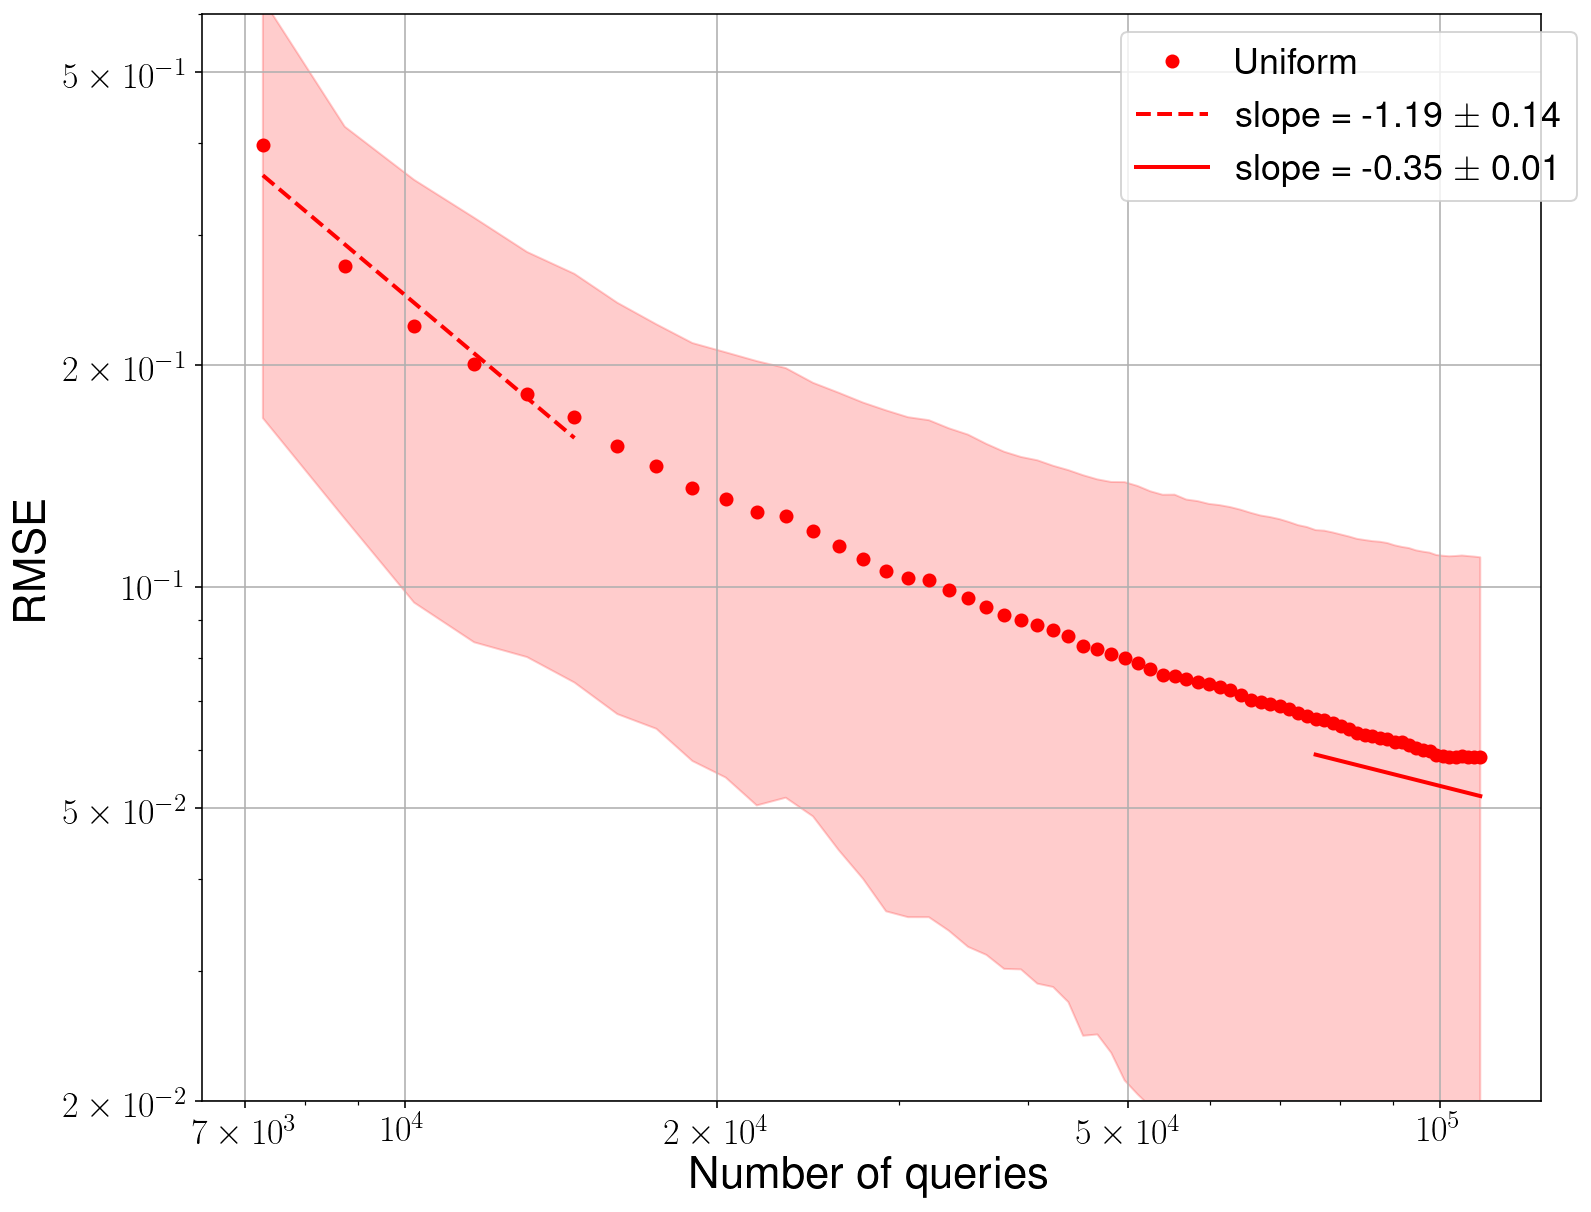

In [26]:
rmse_mean_FI_qinfer, rmse_uncertainty_FI_qinfer = emp_FI_sim_qinfer.plot_rmse(FLAG_plot=True)

In [27]:
# SMC + HAL-FI -- 2e4 particles
SAVE_DIR_log = 'bayesian_estimator_jobs/FI_sim_long_qinfer_002/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6

FLAG_filter = True
factor_filter=1.9

FLAG_rmse_test = False
FLAG_long_time_range = True

emp_FI_sim_qinfer = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

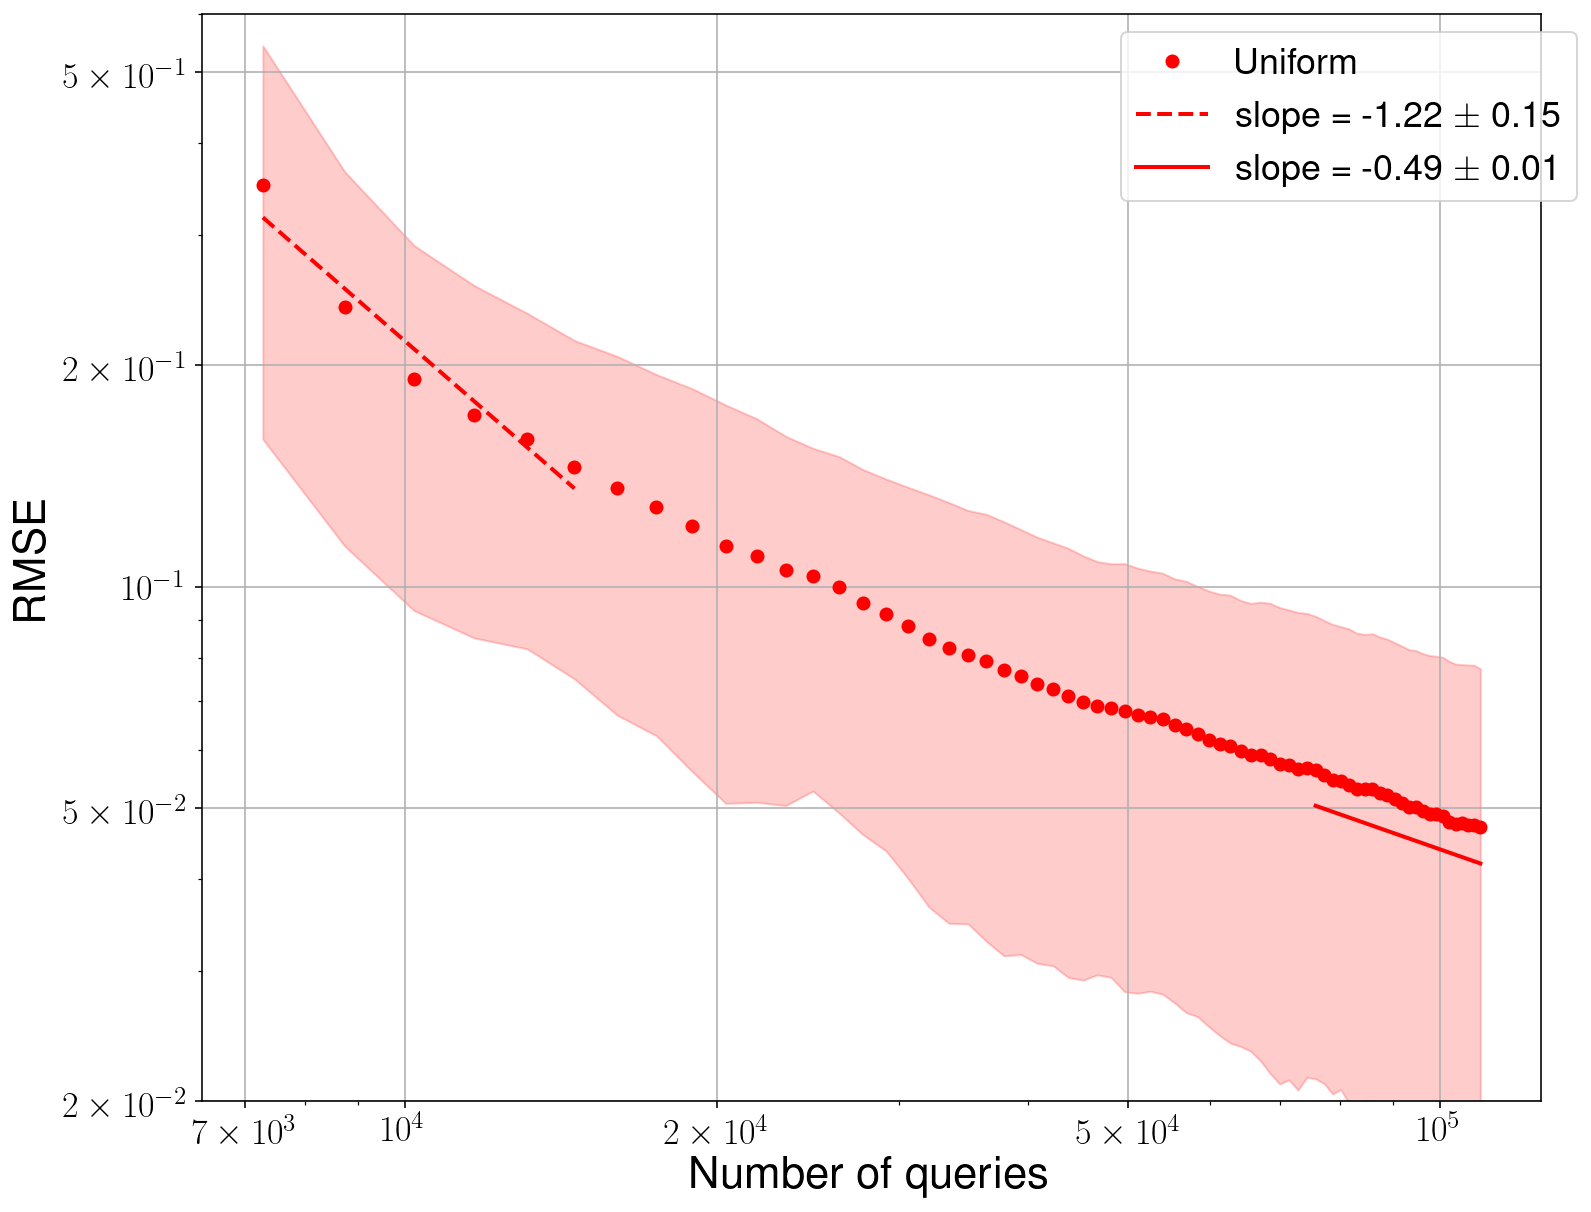

In [28]:
rmse_mean_FI_qinfer2, rmse_uncertainty_FI_qinfer2 = emp_FI_sim_qinfer.plot_rmse(FLAG_plot=True)

Qinfer + Bayes Risk (1e4 particles)

In [29]:
# Qinfer + Bayes Risk -- 1e4 particles
SAVE_DIR_log = 'bayesian_estimator_jobs/qinfer_bed_sim_long_001/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6

FLAG_filter = True
factor_filter=1.9

FLAG_rmse_test = False
FLAG_long_time_range = True

emp_BED_sim_qinfer = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

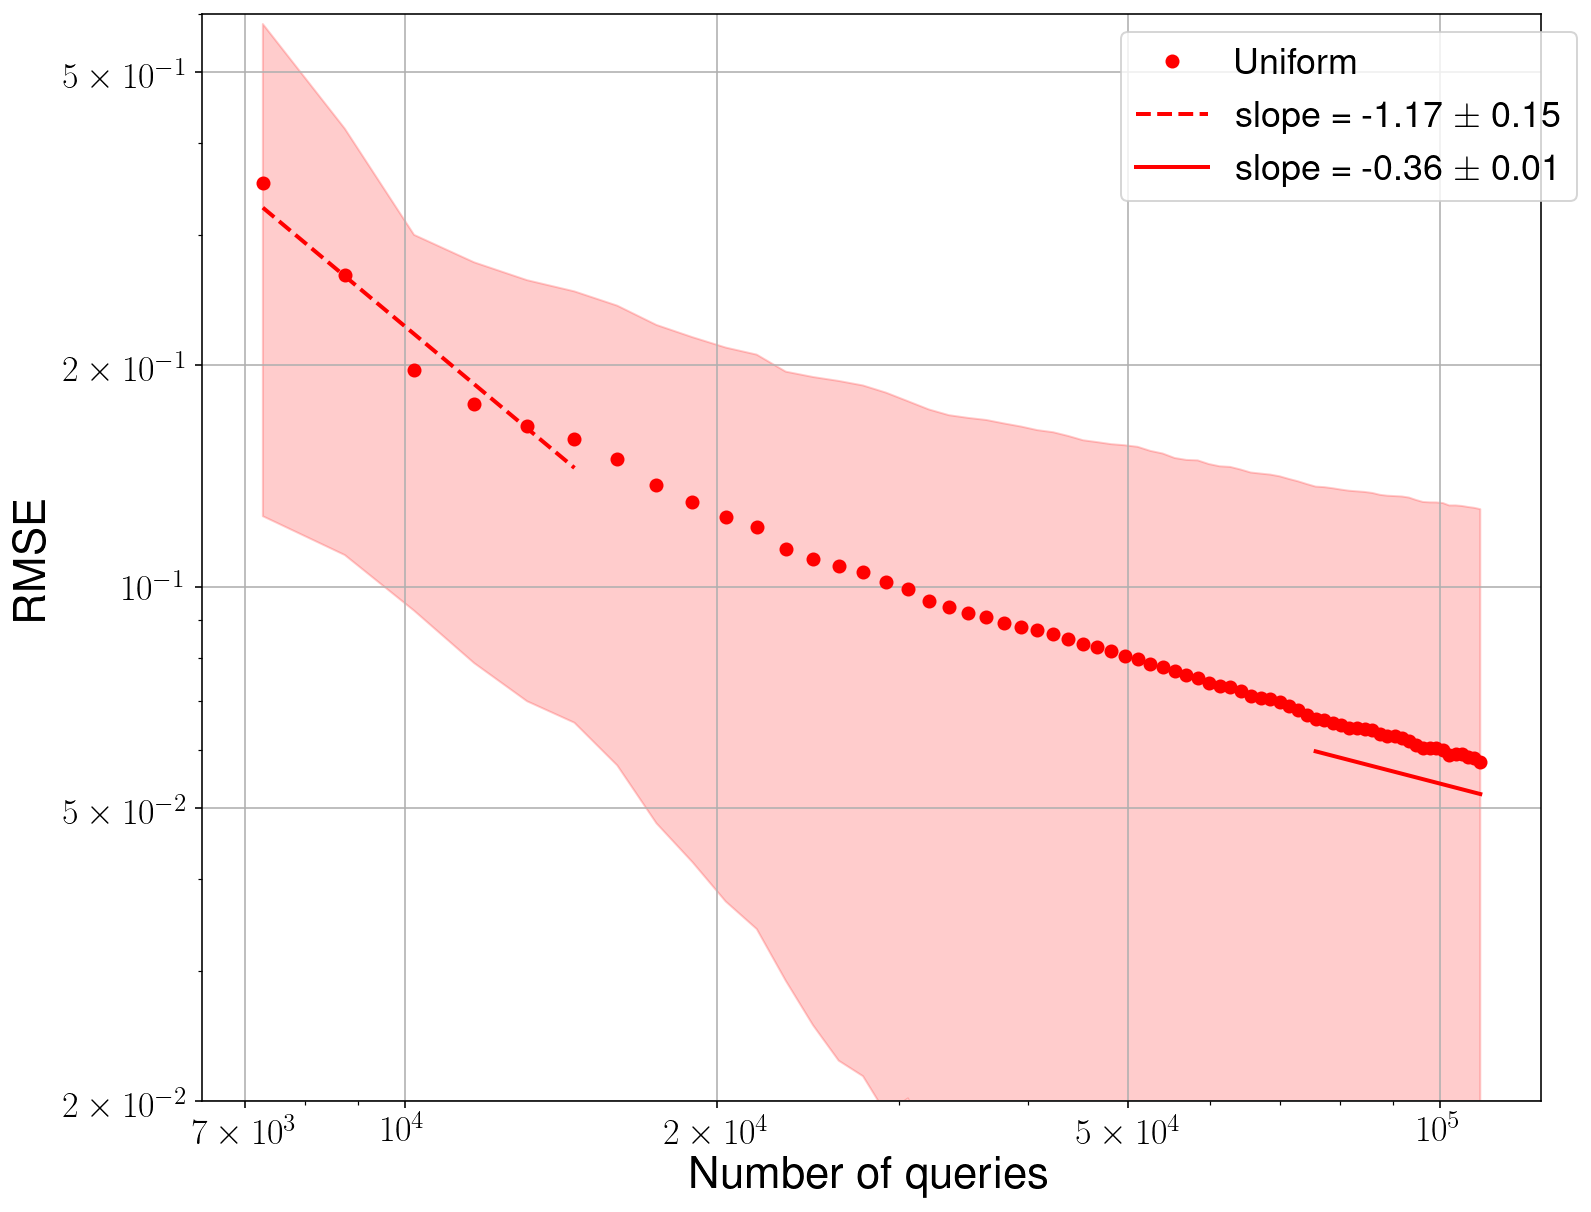

In [30]:
rmse_mean_BED_qinfer, rmse_uncertainty_BED_qinfer = emp_BED_sim_qinfer.plot_rmse(FLAG_plot=True)

In [31]:
# Qinfer + Bayes Risk -- 2e4 particles
SAVE_DIR_log = 'bayesian_estimator_jobs/qinfer_bed_sim_long_002/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6

FLAG_filter = True
factor_filter=1.9

FLAG_rmse_test = False
FLAG_long_time_range = True

emp_BED_sim_qinfer2 = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

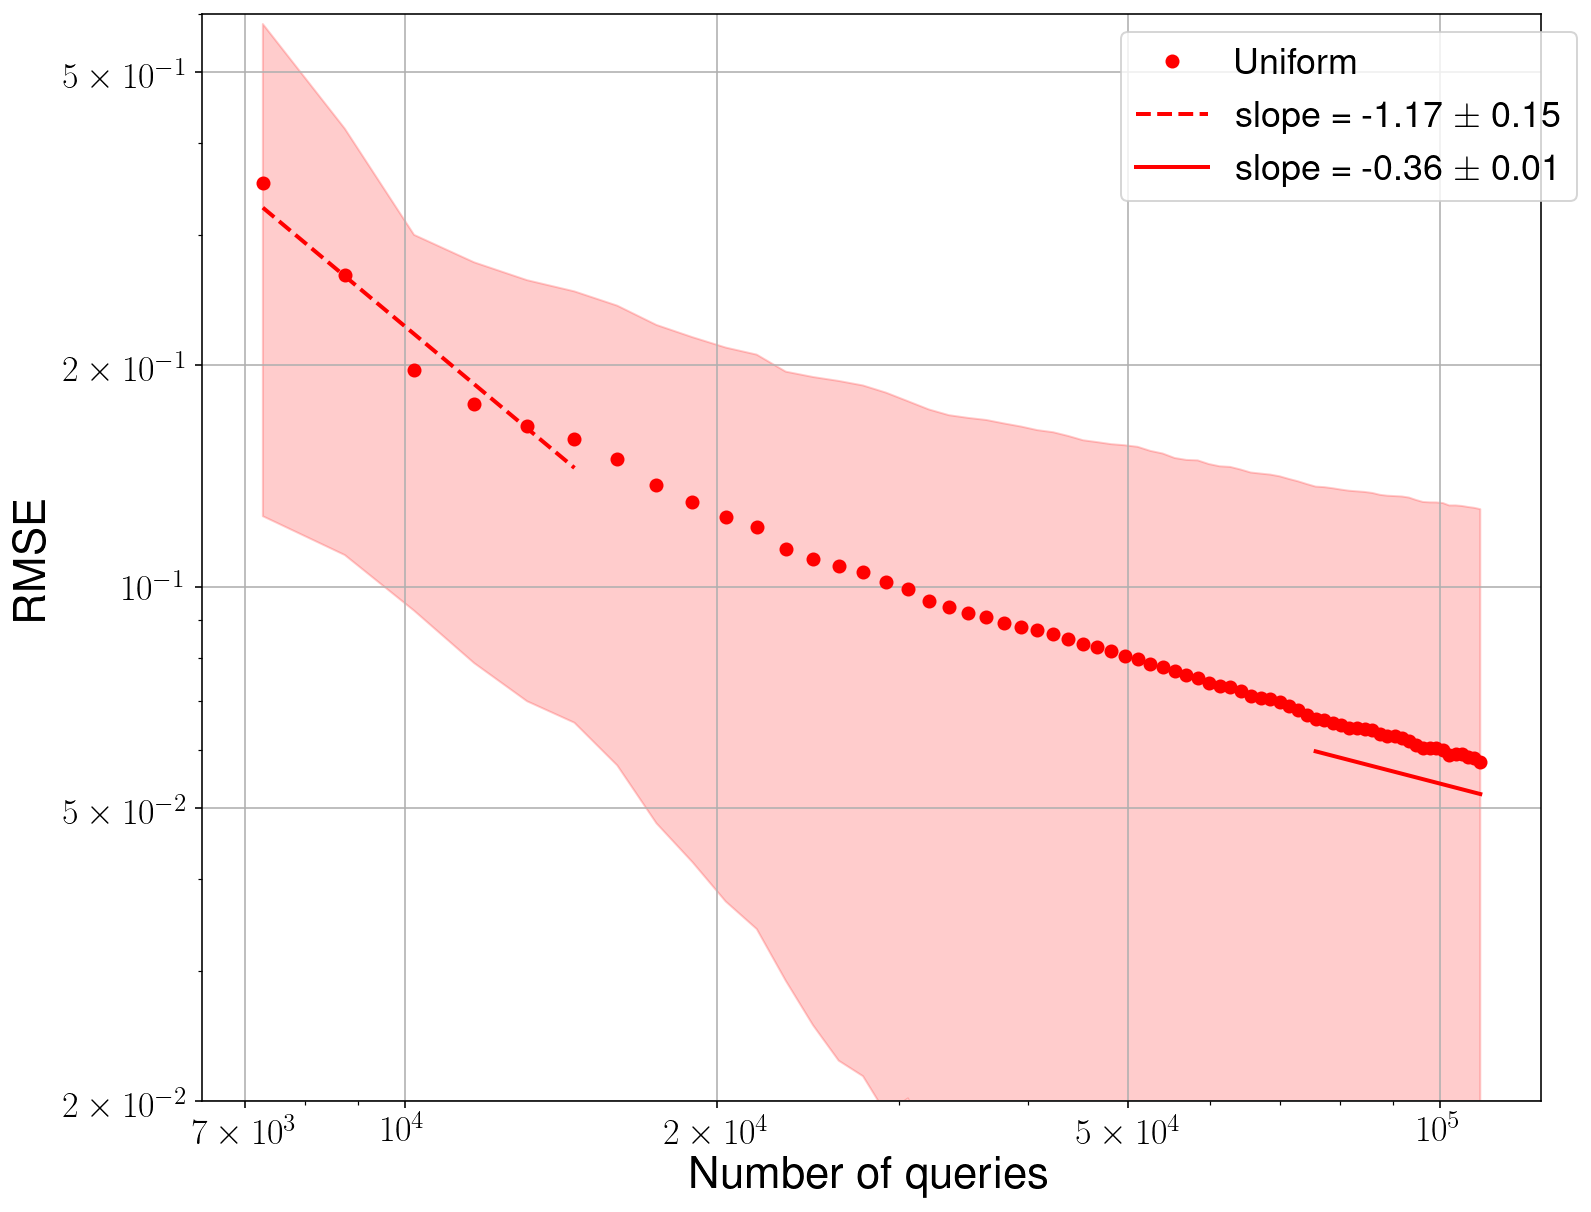

In [32]:
rmse_mean_BED_qinfer2, rmse_uncertainty_BED_qinfer2 = emp_BED_sim_qinfer.plot_rmse(FLAG_plot=True)

In [33]:
L2_error_baseline = results_job_PL_baseline['rmse_mean']
L2_error_PL = results_job_PL_mle['rmse_mean']
L2_error_AL = results_job_AL['rmse_mean']
#L2_error_AL_FIR = results_job_AL_FIR['rmse_mean']
L2_error_qinfer = rmse_mean_qinfer
L2_error_qinfer2 = rmse_mean_qinfer2
L2_error_qinfer3 = rmse_mean_qinfer3
#L2_error_qinfer4 = rmse_mean_qinfer4
L2_error_FI_qinfer = rmse_mean_FI_qinfer2
L2_error_BED_qinfer = rmse_mean_BED_qinfer

_key = 'rmse_std'
errorbar_baseline = results_job_PL_baseline[_key]
errorbar_PL = results_job_PL_mle[_key]
errorbar_AL = results_job_AL[_key]
#errorbar_AL_FIR = results_job_AL_FIR[_key]
errorbar_qinfer = rmse_uncertainty_qinfer/4
errorbar_qinfer2 = rmse_uncertainty_qinfer2
errorbar_qinfer3 = rmse_uncertainty_qinfer3
#errorbar_qinfer4 = rmse_uncertainty_qinfer4
errorbar_FI_qinfer = rmse_uncertainty_FI_qinfer2
errorbar_BED_qinfer = rmse_uncertainty_BED_qinfer

### Summary (Main)

In [98]:
reload_package(hamiltonianlearner)

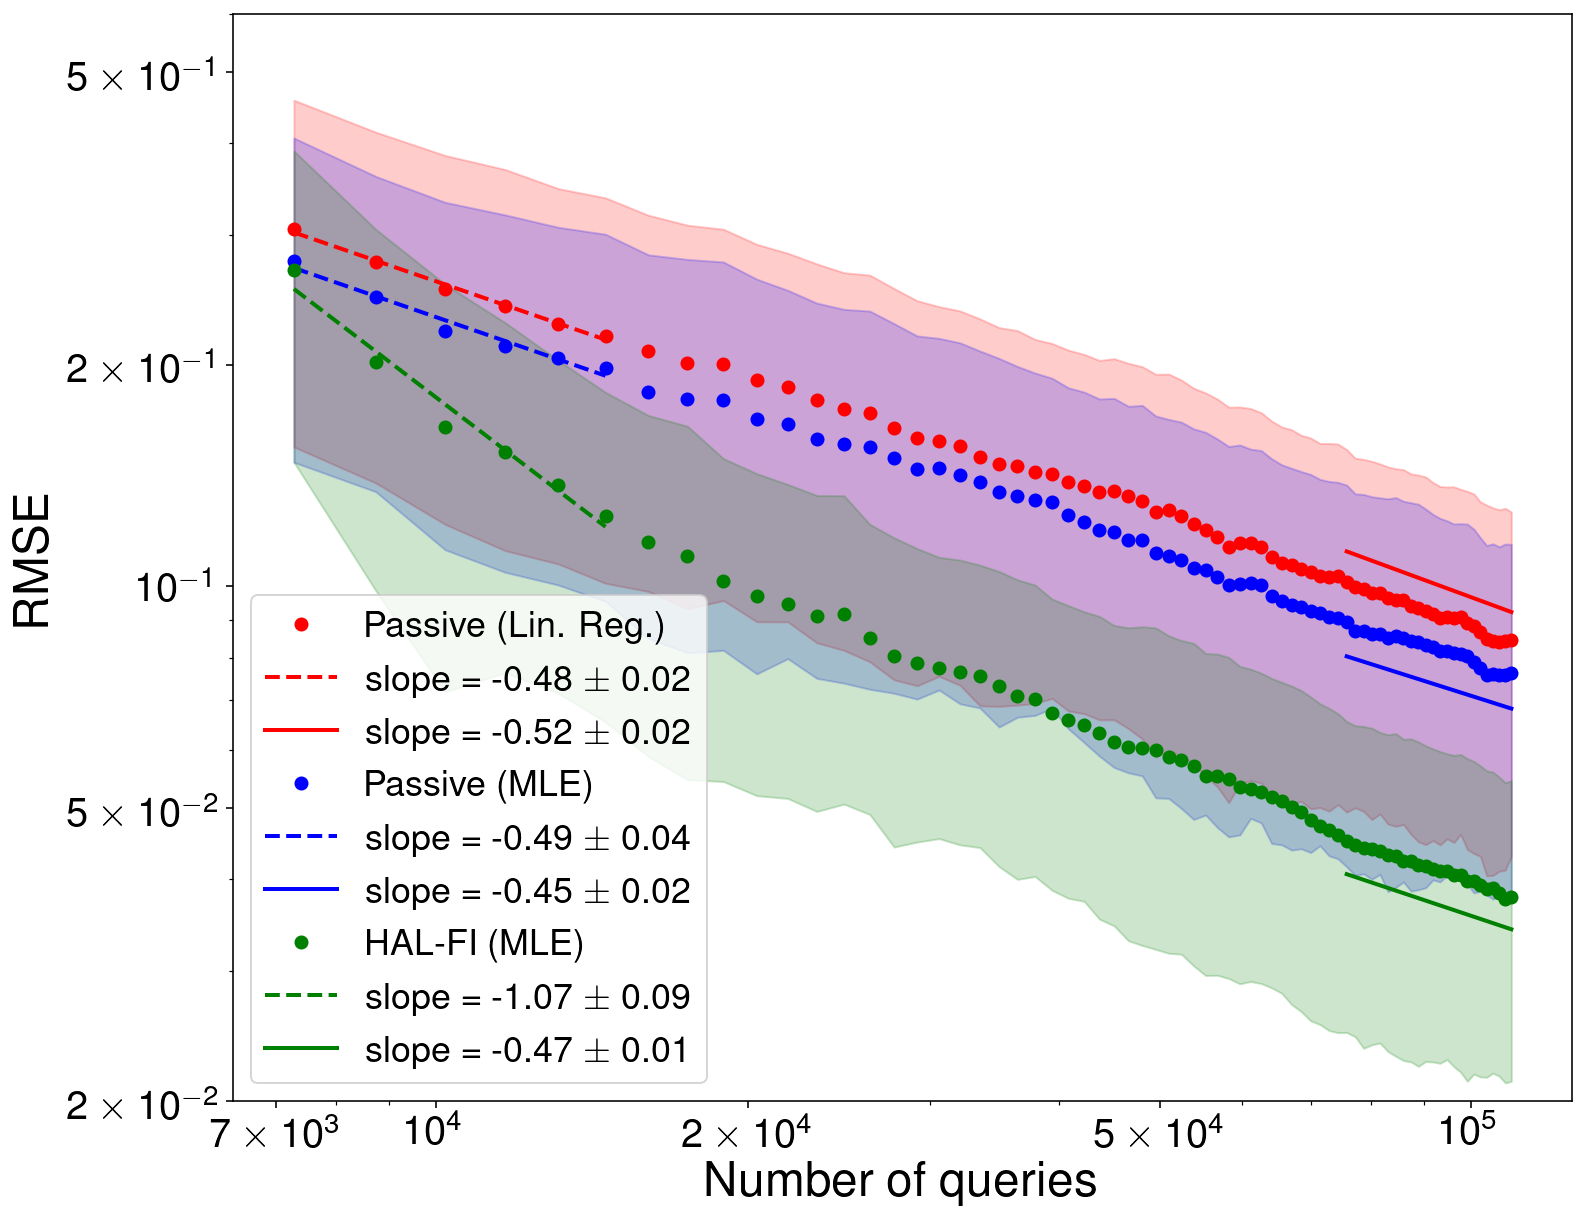

In [99]:
N_p = 5*243*6 + np.arange(71)*243*6

# Plotting
L2_error_plot = []
L2_error_plot.append(L2_error_baseline)
L2_error_plot.append(L2_error_PL)
L2_error_plot.append(L2_error_AL)

nqueries_plot = []
nqueries_plot.append(N_p)
nqueries_plot.append(N_p)
nqueries_plot.append(N_p)

errorbars_plot = []
errorbars_plot.append(errorbar_baseline)
errorbars_plot.append(errorbar_PL)
errorbars_plot.append(errorbar_AL)

labels_plot = []
labels_plot.append('Passive (Lin. Reg.)')
labels_plot.append('Passive (MLE)')
labels_plot.append('HAL-FI (MLE)')

# plotting options
plotting_options = {'label_learners': labels_plot, 
                    'save_filename': 'summary_ibmq_oracle_sim_long_000.pdf',
                    'skip_learner': 0,
                    'FLAG_legend_outside': False,
                    'slope_scales': np.array([1.1,0.9,0.9,0.9, 0.9, 0.9, 0.9]),
                    'FLAG_testing_error': False, 'FLAG_long_time_range': True}

job_processor.plot_trend(L2_error_plot, nqueries_plot, error_learners=errorbars_plot,
                         plotting_options=plotting_options)

### Summary (MLE + Bayesian)

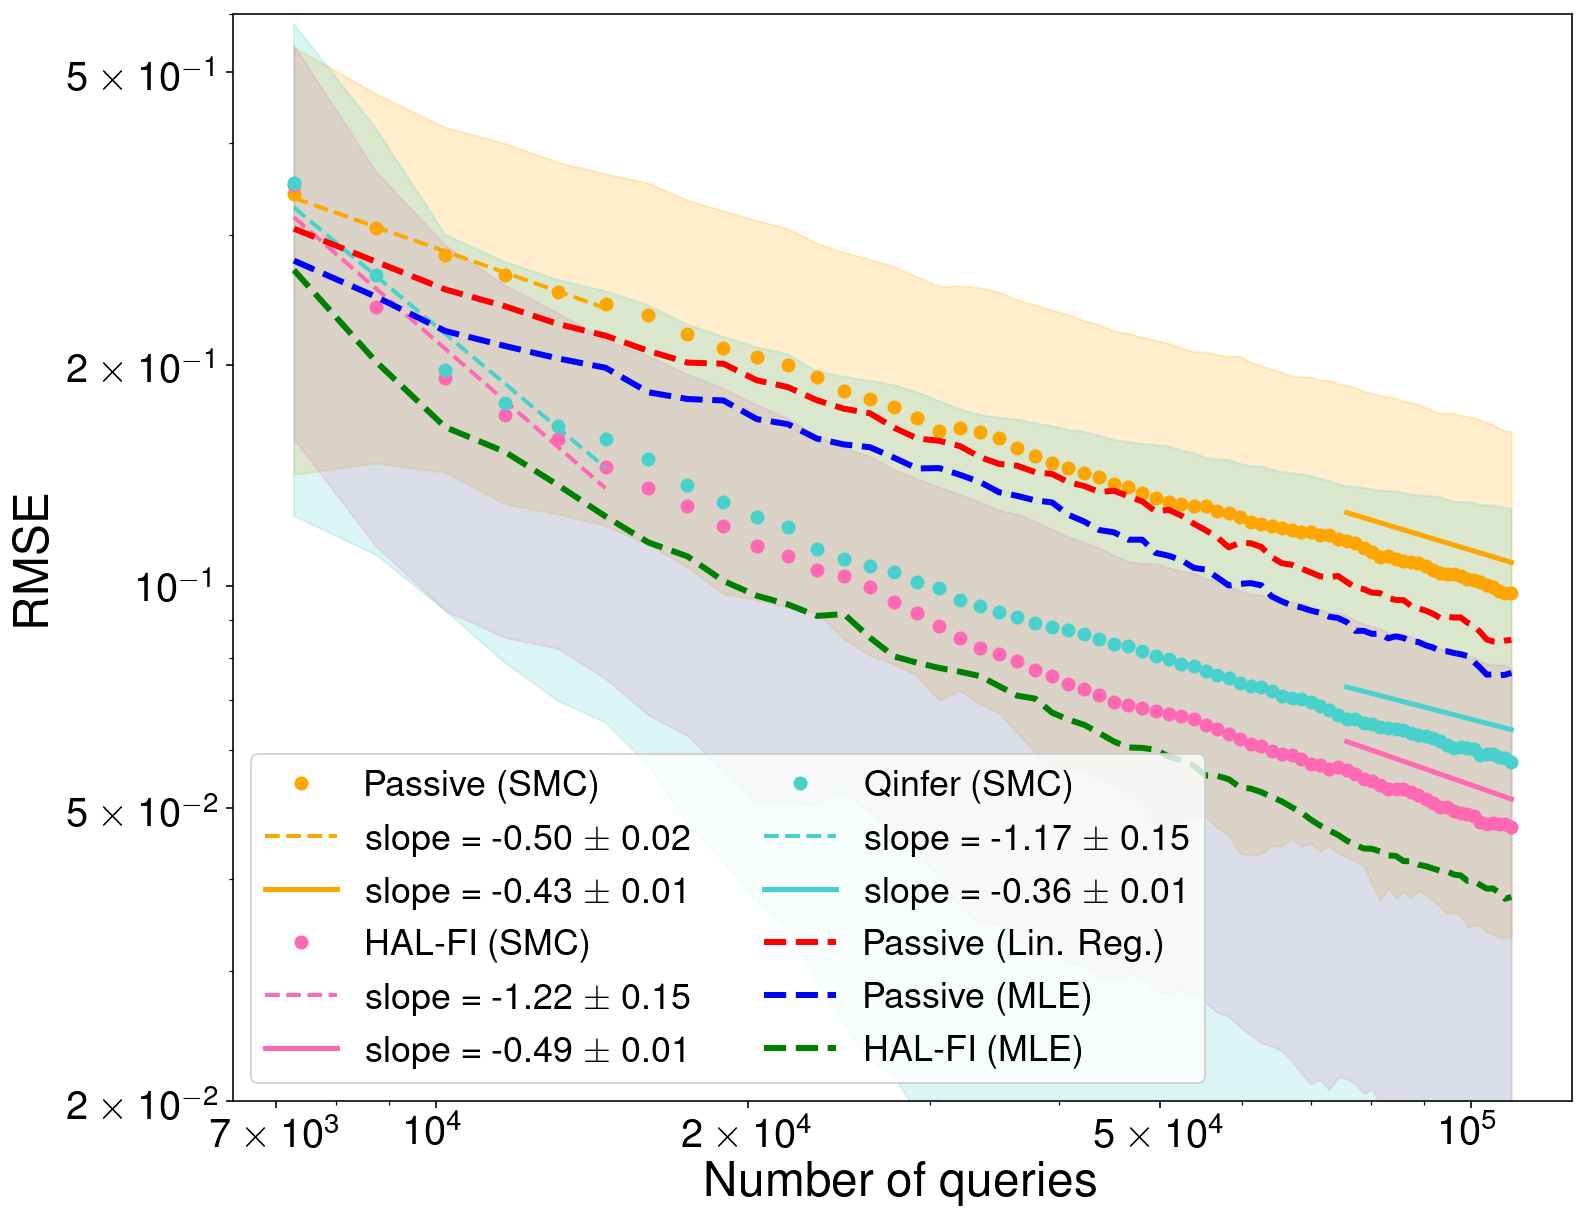

In [107]:
N_p = 5*243*6 + np.arange(71)*243*6

# Plotting
L2_error_plot = []
L2_error_plot.append(L2_error_qinfer2)
L2_error_plot.append(L2_error_FI_qinfer)
L2_error_plot.append(L2_error_BED_qinfer)

L2_error_plot.append(L2_error_baseline)
L2_error_plot.append(L2_error_PL)
L2_error_plot.append(L2_error_AL)


nqueries_plot = []
nqueries_plot.append(N_p)
nqueries_plot.append(N_p)
nqueries_plot.append(N_p)

nqueries_plot.append(N_p)
nqueries_plot.append(N_p)
nqueries_plot.append(N_p)

errorbars_plot = []
errorbars_plot.append(errorbar_qinfer2)
errorbars_plot.append(errorbar_FI_qinfer)
errorbars_plot.append(errorbar_BED_qinfer)

errorbars_plot.append(errorbar_baseline)
errorbars_plot.append(errorbar_PL)
errorbars_plot.append(errorbar_AL)

labels_plot = []
labels_plot.append('Passive (Bayesian)')
labels_plot.append('HAL-FI (Bayesian)') 
labels_plot.append('Qinfer (Bayesian)') 

labels_plot.append('Passive (Lin. Reg.)')
labels_plot.append('Passive (MLE)')
labels_plot.append('HAL-FI (MLE)')

# plotting options
FLAG_plot_error_learners = [True]*len(L2_error_plot)
FLAG_plot_error_learners[3:] = [False]*3

labels_plot = []
labels_plot.append('Passive (SMC)')
labels_plot.append('HAL-FI (SMC)')
labels_plot.append('Qinfer (SMC)')

labels_plot.append('Passive (Lin. Reg.)')
labels_plot.append('Passive (MLE)')
labels_plot.append('HAL-FI (MLE)')

plotting_options = {'label_learners': labels_plot,
                    'skip_learner': 0,
                    'save_filename': 'comparison_PL_AL_qinfer_sim_long.pdf',
                    'FLAG_legend_outside': False,
                    'slope_scales': [1.1, 1.1, 1.1, 0.9, 1.1, 0.9, 0.9, 0.9],
                    'FLAG_testing_error': False, 'FLAG_long_time_range': True}

job_processor.plot_trend_compare_mle_bayesian(L2_error_plot, nqueries_plot, error_learners=errorbars_plot, 
                                              FLAG_plot_error_learners=FLAG_plot_error_learners,
                                              plotting_options=plotting_options)

## Simulation -- Testing Error

Testing Dataset

In [108]:
# Define experimental conditions
ibm_data = job_helper.setup_oracle()

# Truth
J_truth = np.array([-4568258.88132824, -1465045.02848701,  -290468.97835928,
                    6499545.9801579,  1390900.08768167,   413722.74870734])

param_truth = quantum_device_models.transform_parameters(J_truth)

# Oracle properties
FLAG_simulator = True

# Noise Models
FLAG_readout_noise = False
FLAG_control_noise = True

# Control Noise
teff = quantum_device_models.data_driven_teff_noise_model(param_truth, FLAG_ibmq_boel=True)
expt_noise ={'readout': ibm_data['misclassif_error'], 'imperfect_pulse_shaping': teff}

# Create oracle
oracle_qs_sim = simulate_nature.Nature(J_truth, noise=expt_noise, expt_data=None,
                                       FLAG_simulator=FLAG_simulator,
                                       FLAG_readout_noise=FLAG_readout_noise,
                                       FLAG_control_noise=FLAG_control_noise)

# 2. Query space and ActionSpace setup
time_stamps = np.linspace(1.0e-7, 18e-7, 3*81)
query_space, A_cr = job_helper.setup_action_space(time_stamps, J_truth)


Simulator oracle setup


In [109]:
oracle_qs_sim.print_info()

Oracle: Simulator
Noise Sources:
Readout Noise: FLAG=False, Value=[0. 0.]
Control Noise: FLAG=True
Decoherence: FLAG=False


In [136]:
# Create testing data
np.random.seed(2021)
N_config = A_cr.N_actions
p_U = (1 / N_config) * np.ones(N_config)

N_queries = 100*N_config
X_test = A_cr.sample_action_space(oracle_qs_sim, p_U, N_queries, FLAG_query=True)

KeyboardInterrupt: 

In [22]:
A_cr.update_dict_action_space(X_test)

In [23]:
loss_J_test, J_truth_test = estimation_procedure.quick_mle_estimate(X_test, A_cr)

In [24]:
J_truth_test

array([-4575571.27919518, -1426829.54178816,  -324391.3771009 ,
        6505106.64364584,  1360658.28046653,   446169.88832885])

In [25]:
loss_J_test

0.4895029224139782

In [172]:
J_truth

array([-4568258.88132824, -1465045.02848701,  -290468.97835928,
        6499545.9801579 ,  1390900.08768167,   413722.74870734])

Baseline

In [110]:
reload_package(hamiltonianlearner)

In [111]:
SAVE_DIR_log = 'passive_baseline_sim/passive_baseline_sim_long_001/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = False
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True
FLAG_long_time_range = True

emp_est_PL_baseline_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

In [115]:
# Compute testing error over testing dataset
FLAG_recompute = False

if FLAG_recompute:
    emp_est_PL_baseline_sim.compute_loss(X_test)
else:
    emp_est_PL_baseline_sim.job_results['loss_test'] = loss_job_PL_baseline

Computing Ground log-likelihood ratio


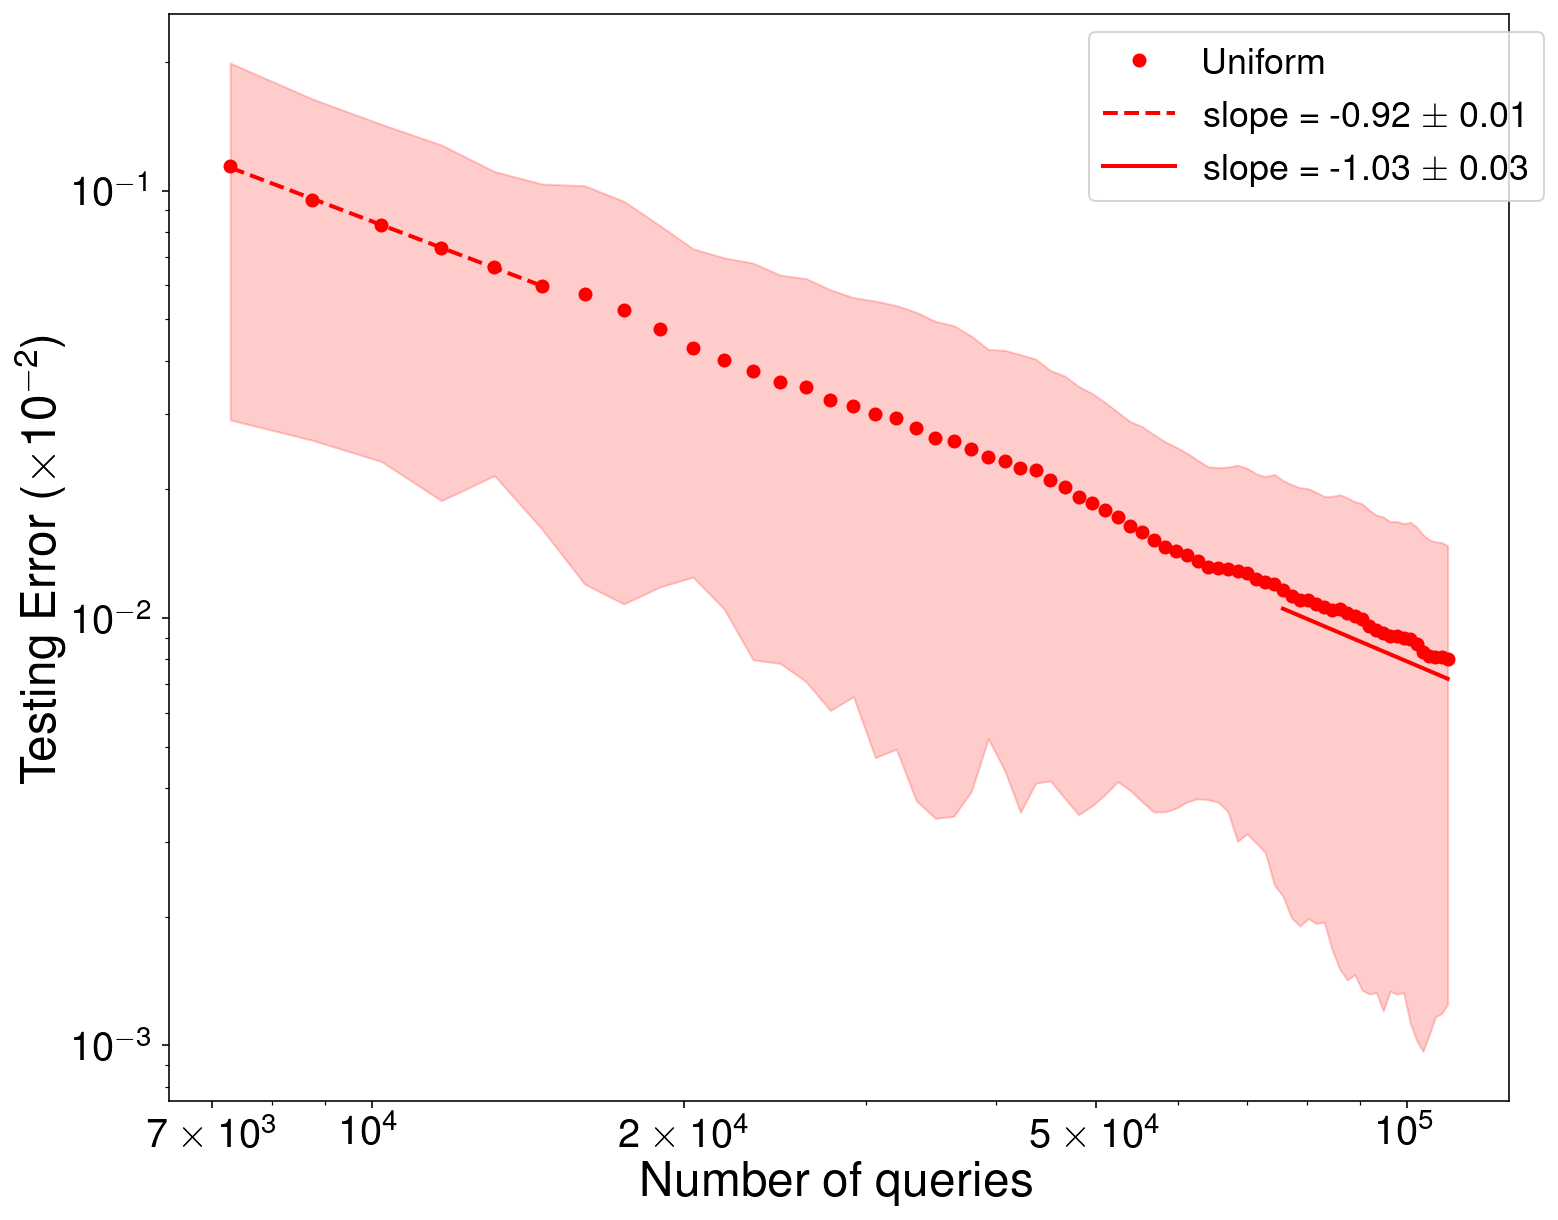

In [116]:
TE_mean_PL_baseline, TE_std_PL_baseline = emp_est_PL_baseline_sim.plot_testing_error(X_test, J_truth, 
                                                                                     FLAG_recompute=False,
                                                                                     FLAG_empirical=False,
                                                                                     FLAG_plot=True)

MLE

In [117]:
SAVE_DIR_log = 'passive_mle_sim/passive_mle_sim_long_000/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = True
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True

emp_est_PL_mle_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                      N_0=N_0, N_batch=N_batch,
                                                      FLAG_filter=FLAG_filter, 
                                                      FLAG_rmse_test=FLAG_rmse_test, 
                                                      FLAG_long_time_range=FLAG_long_time_range,
                                                      do_plot=False)

In [118]:
# Compute testing error over testing dataset
FLAG_recompute = False

if FLAG_recompute:
    emp_est_PL_mle_sim.compute_loss(X_test)
else:
    emp_est_PL_mle_sim.job_results['loss_test'] = loss_job_PL_mle

Computing Ground log-likelihood ratio


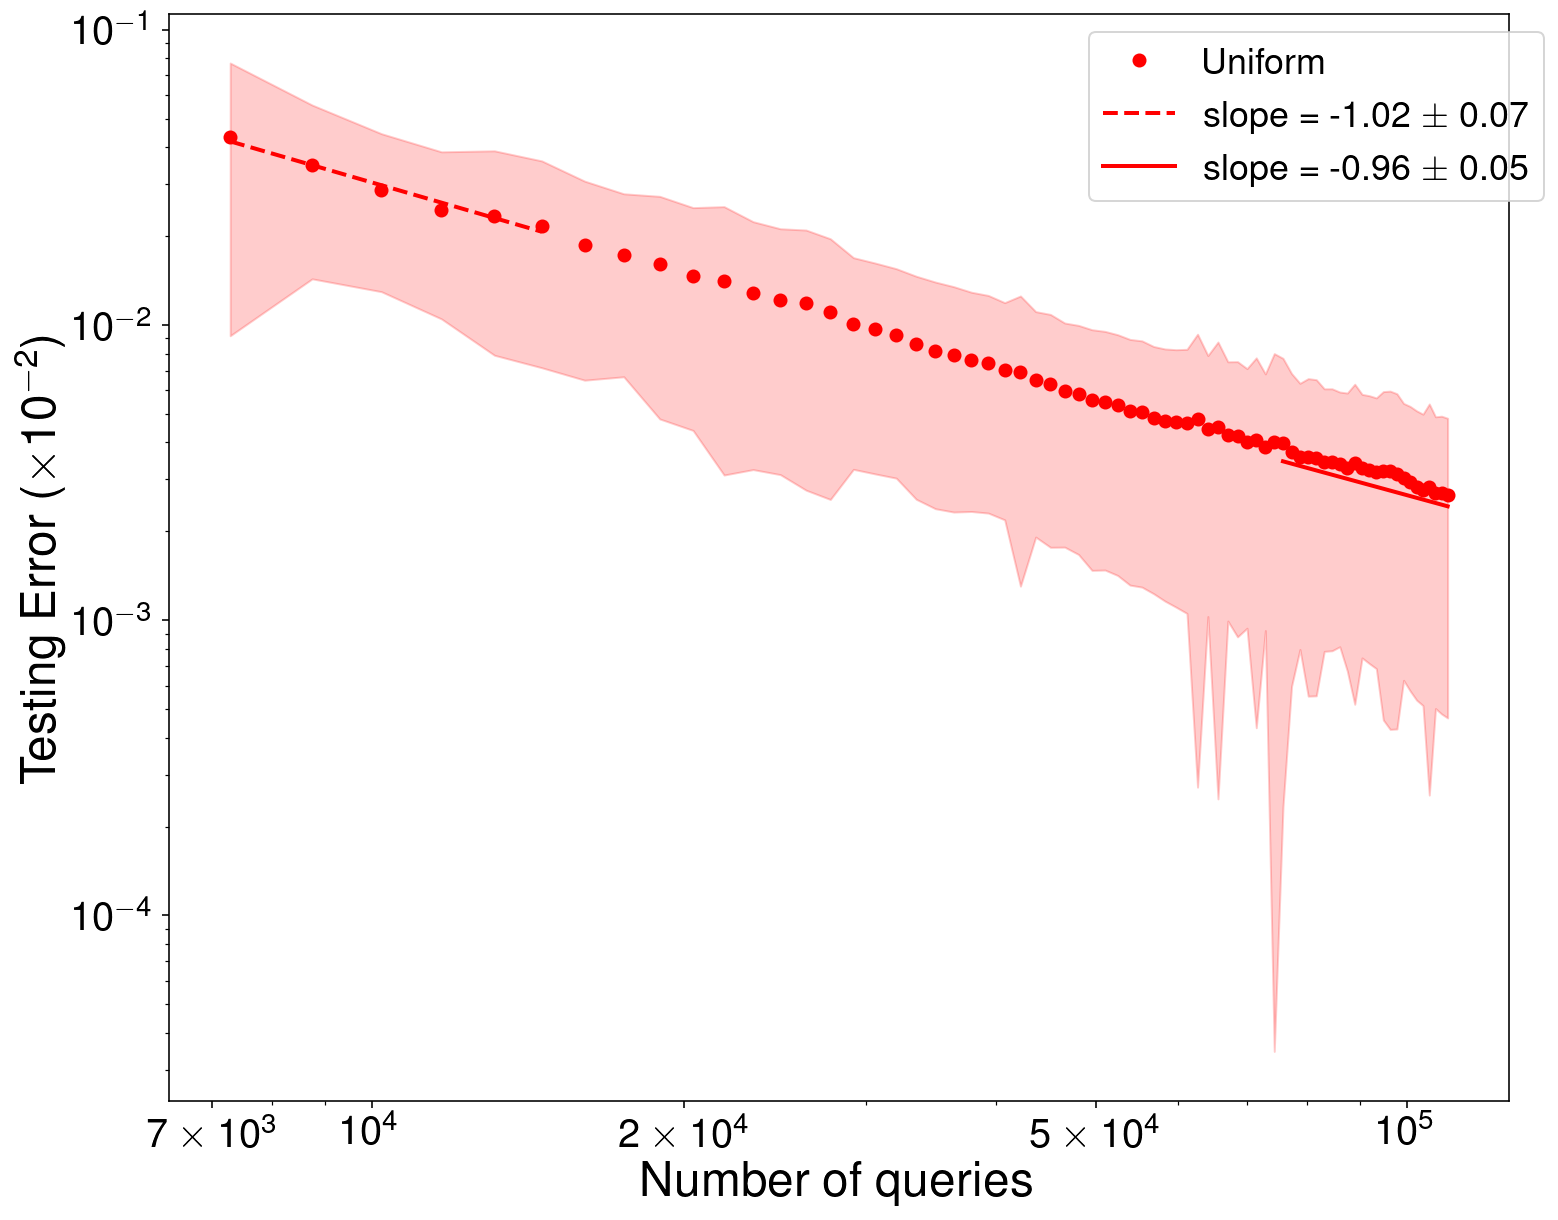

In [119]:
TE_mean_PL_sim, TE_std_PL_sim = emp_est_PL_mle_sim.plot_testing_error(X_test, J_truth, 
                                                                      ind_iter_filter=[],
                                                                      FLAG_recompute=False,
                                                                      FLAG_empirical=False,
                                                                      FLAG_plot=True)

HAL-FI

In [120]:
SAVE_DIR_log = 'FI_mle_sim/FI_mle_sim_long_000/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = False
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True

emp_est_HAL_FI_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                      N_0=N_0, N_batch=N_batch,
                                                      FLAG_filter=FLAG_filter, 
                                                      FLAG_rmse_test=FLAG_rmse_test, 
                                                      FLAG_long_time_range=FLAG_long_time_range,
                                                      do_plot=False)

In [121]:
# Compute testing error over testing dataset
FLAG_recompute = False

if FLAG_recompute:
    emp_est_HAL_FI_sim.compute_loss(X_test)
else:
    emp_est_HAL_FI_sim.job_results['loss_test'] = loss_job_HAL_FI

Computing Ground log-likelihood ratio


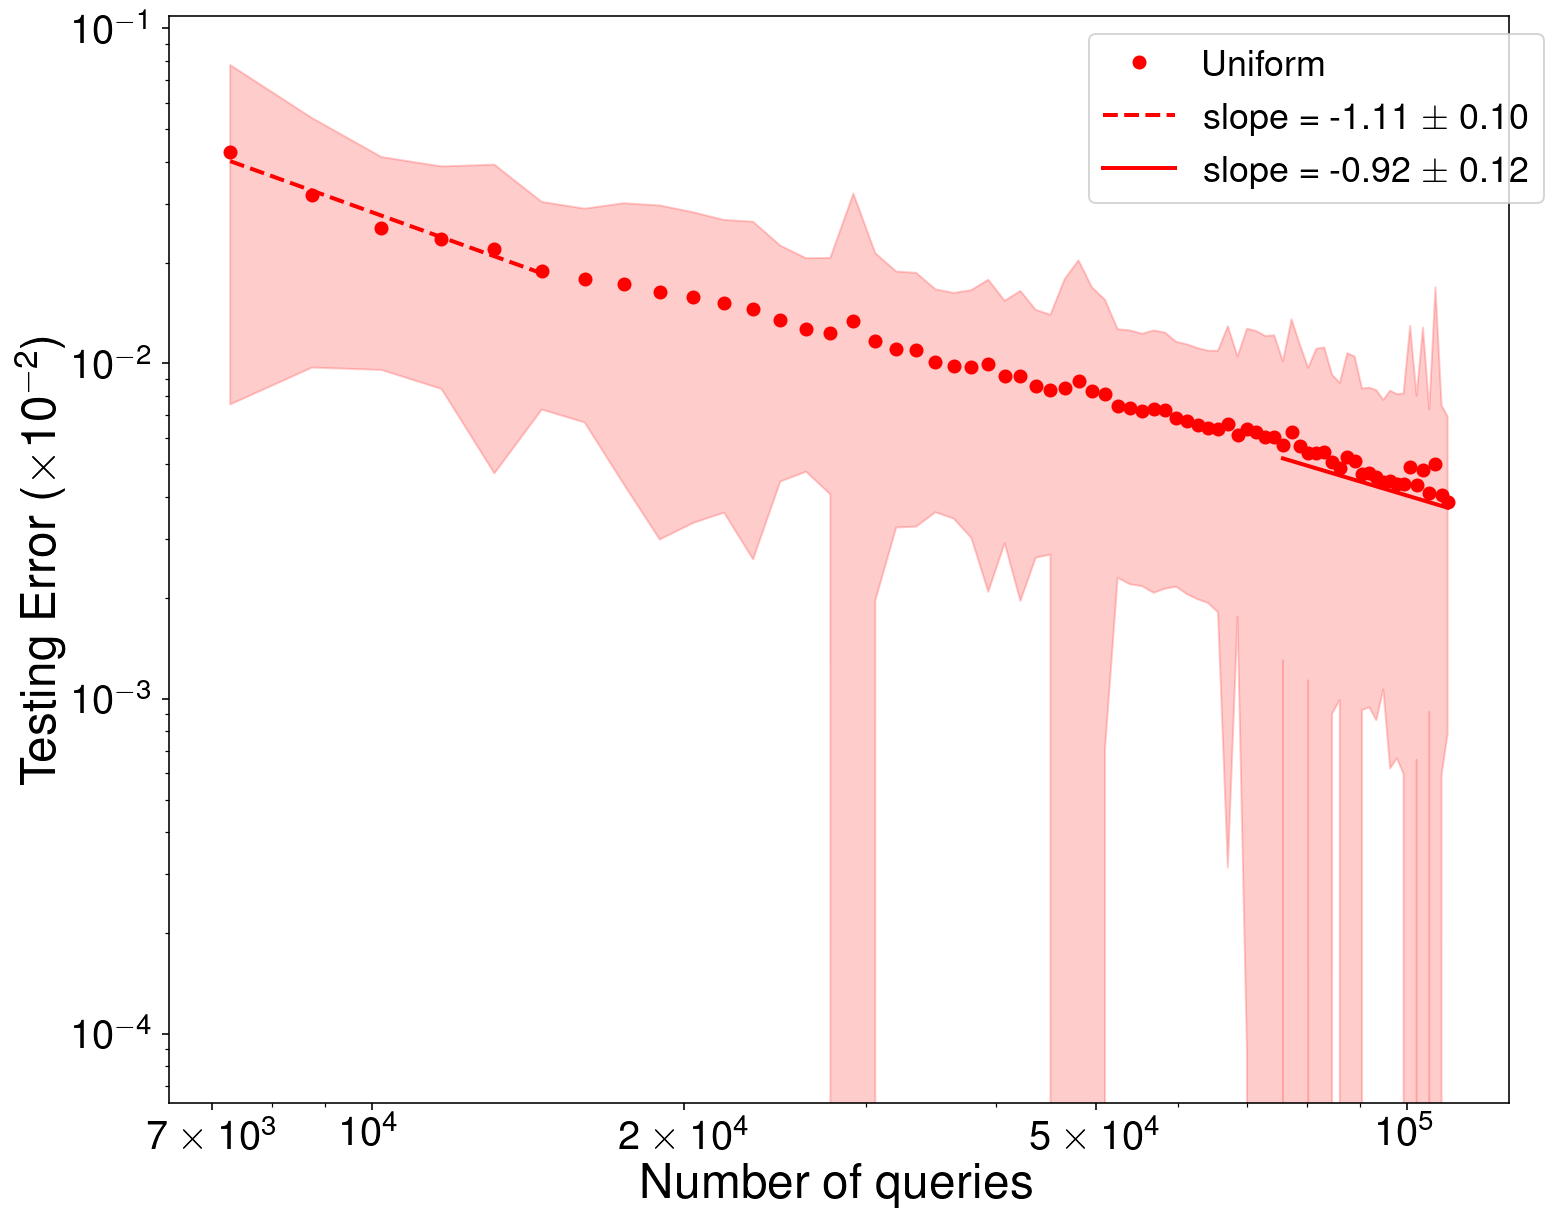

In [122]:
TE_mean_HAL_FI_mle_sim, TE_std_HAL_FI_mle_sim = emp_est_HAL_FI_sim.plot_testing_error(X_test, J_truth,
                                                                                      FLAG_recompute=False,
                                                                                      FLAG_empirical=False,
                                                                                      FLAG_plot=True)

HAL-FIR

In [123]:
SAVE_DIR_log = 'FIR_mle_sim/FIR_mle_sim_long_000/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = False
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True

emp_est_HAL_FIR_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                      N_0=N_0, N_batch=N_batch,
                                                      FLAG_filter=FLAG_filter, 
                                                      FLAG_rmse_test=FLAG_rmse_test, 
                                                       FLAG_long_time_range=FLAG_long_time_range,
                                                       do_plot=False)

In [124]:
# Compute testing error over testing dataset
FLAG_recompute = False

if FLAG_recompute:
    emp_est_HAL_FIR_sim.compute_loss(X_test)
else:
    emp_est_HAL_FIR_sim.job_results['loss_test'] = loss_job_HAL_FIR

Computing Empirical log-likelihood ratio


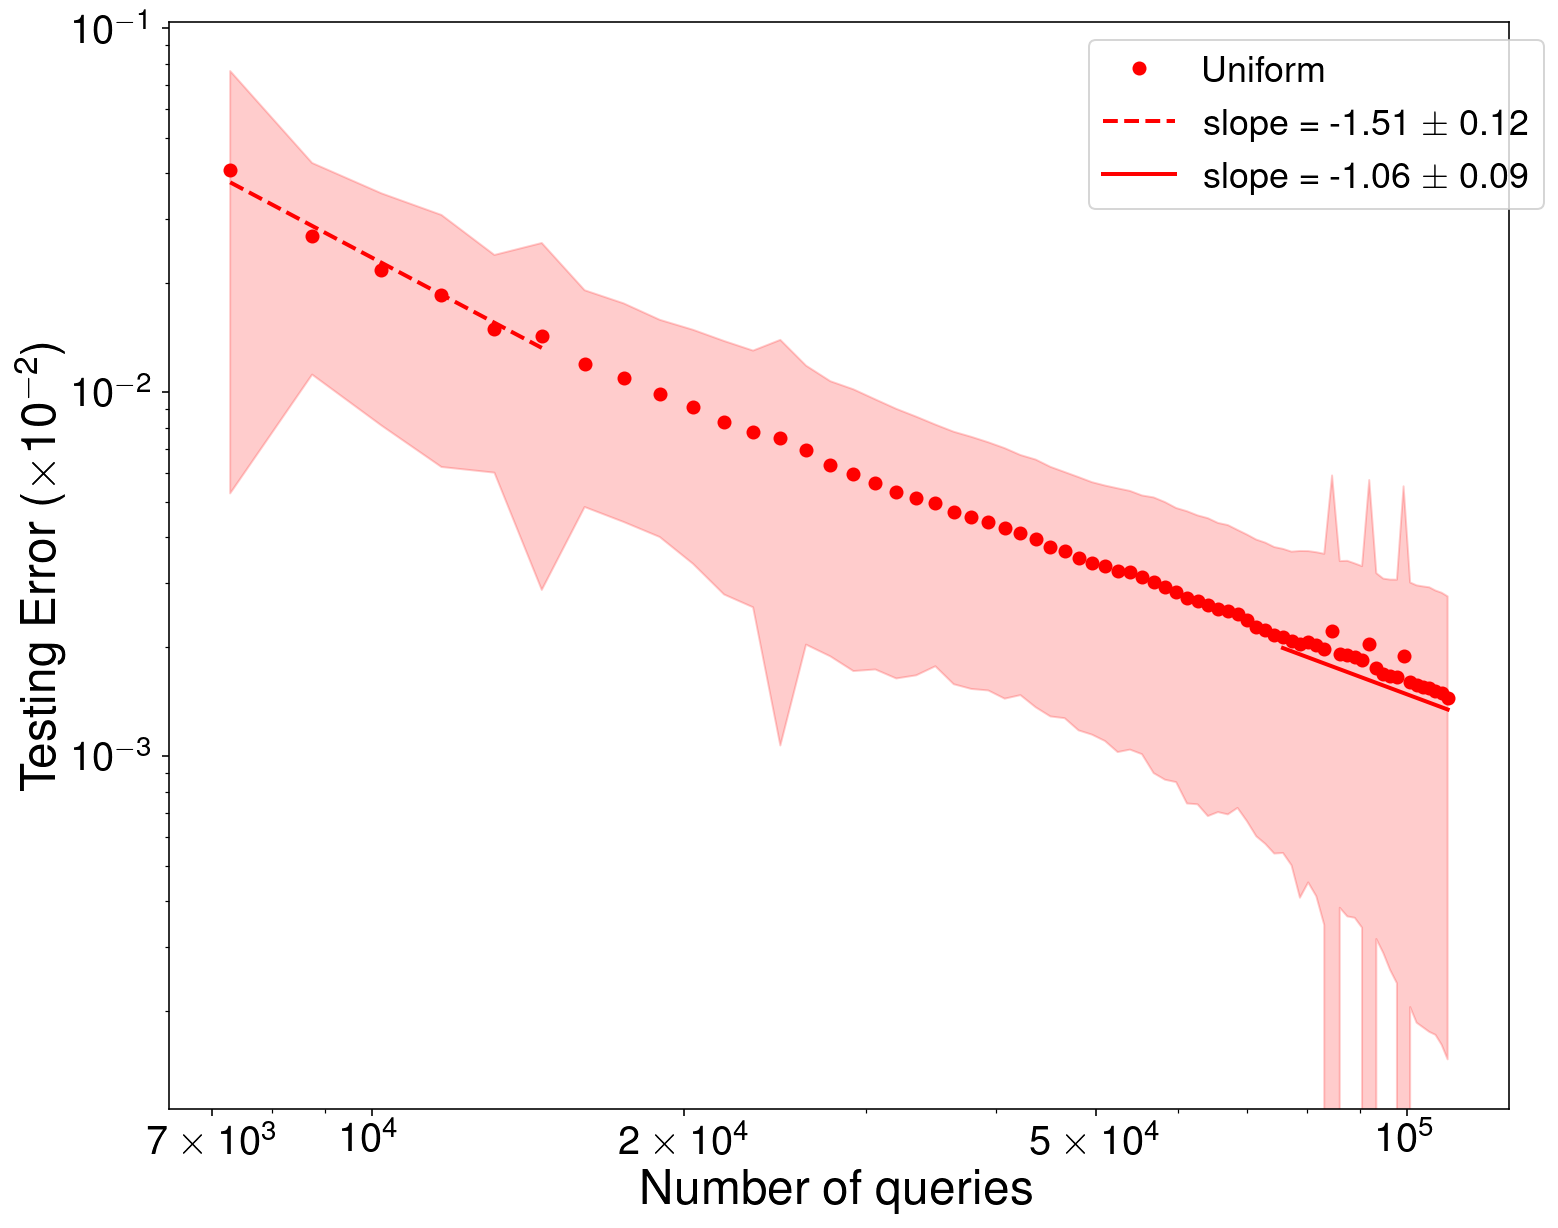

In [125]:
TE_mean_HAL_FIR_mle_sim, TE_std_HAL_FIR_mle_sim = emp_est_HAL_FIR_sim.plot_testing_error(X_test, J_truth,
                                                                                         ind_iter_filter=[0],
                                                                                         FLAG_recompute=False,
                                                                                         FLAG_empirical=True,
                                                                                         FLAG_plot=True)

Qinfer jobs -- SMC + Uniform distribution (1e4 particles)

In [126]:
# SMC + Passive Learner (Uniform distribution) -- 1e4 particles
SAVE_DIR_log = 'bayesian_estimator_jobs/passive_sim_long_qinfer_003/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6

FLAG_filter = True
factor_filter=1.9

FLAG_rmse_test = True
FLAG_long_time_range = True

emp_PL_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

In [130]:
# Compute testing error over testing dataset
FLAG_recompute = False

if FLAG_recompute:
    emp_PL_qinfer_sim.compute_loss(X_test)
else:
    emp_PL_qinfer_sim.job_results['loss_test'] = loss_job_PL_qinfer

Computing Ground log-likelihood ratio
Outliers (RUN IDS) in RMSE are:
[69, 159, 170, 177]
Outliers (RUN IDS) in RMSE are:
[6, 12, 14, 44, 108, 126, 133, 155, 176]
Outliers (RUN IDS) in RMSE are:
[0, 29, 31, 52, 67, 113, 155, 171, 179]


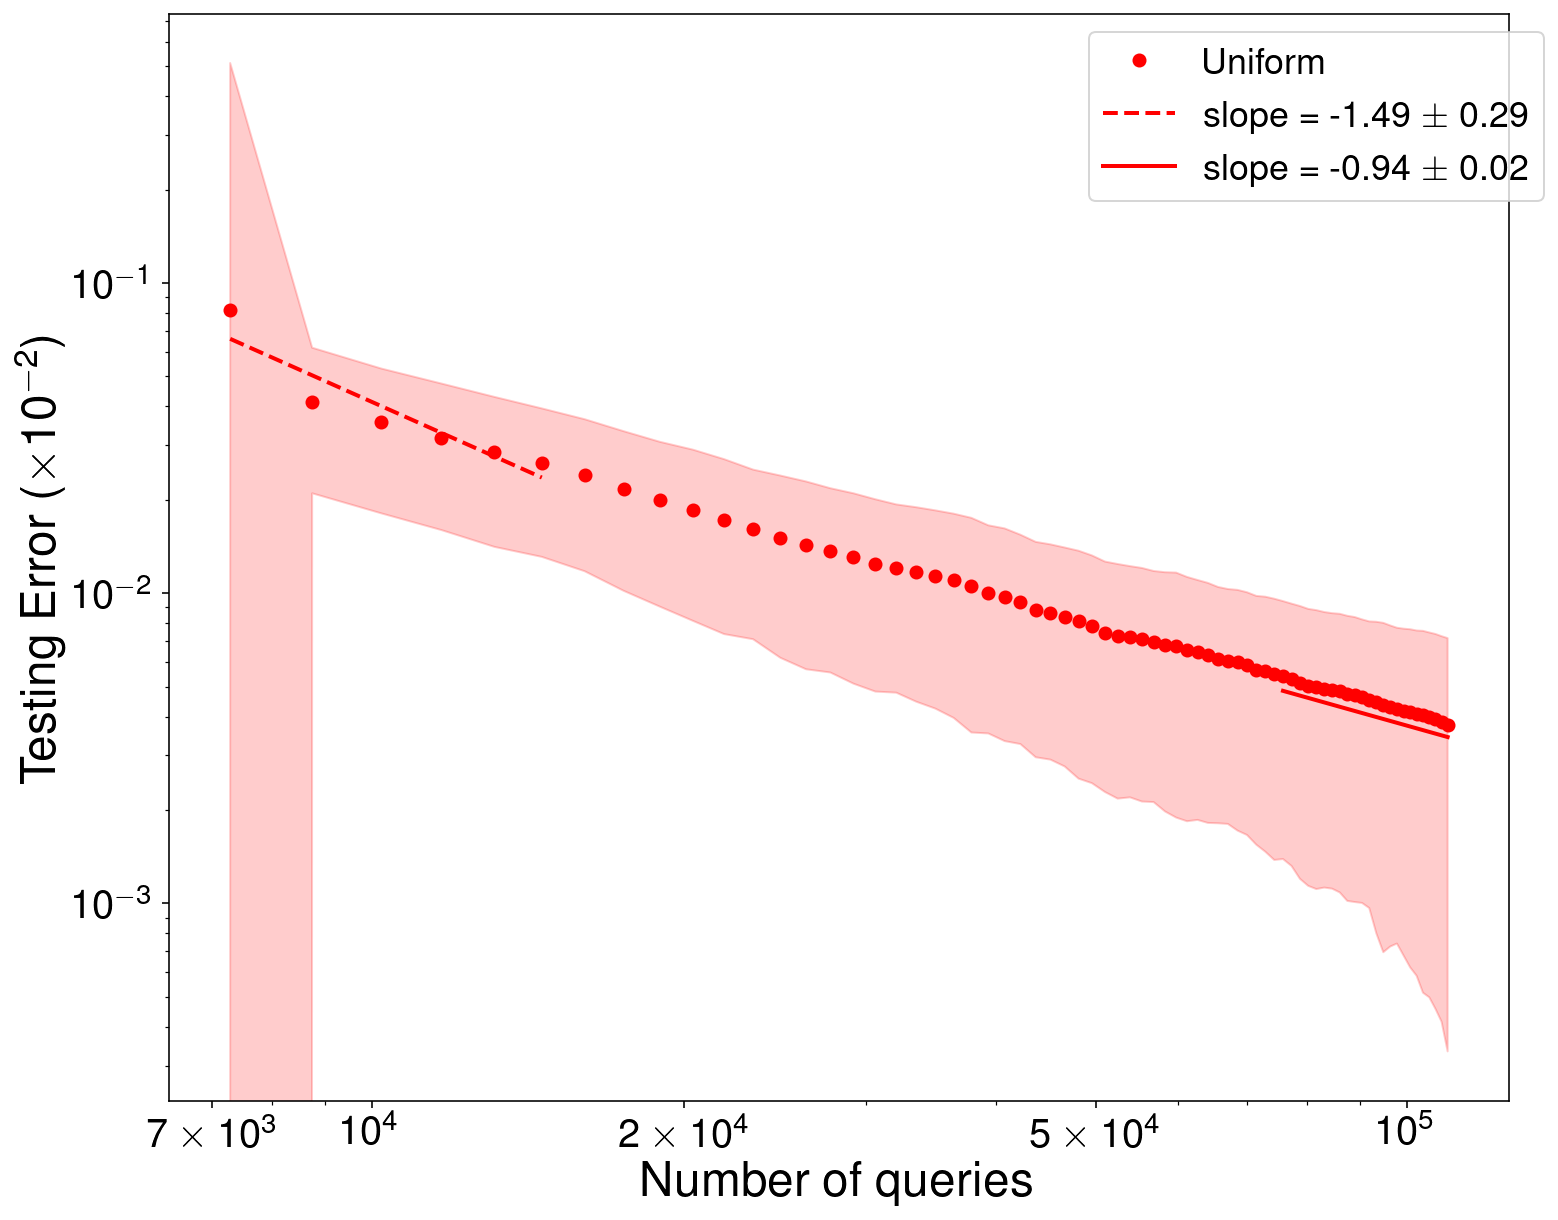

In [131]:
TE_mean_PL_qinfer_sim, TE_std_PL_qinfer_sim = emp_PL_qinfer_sim.plot_testing_error(X_test, J_truth,
                                                                                   ind_iter_filter=[0,1,2],
                                                                                   factor_filter=1.9,
                                                                                   FLAG_recompute=False,
                                                                                   FLAG_empirical=False,
                                                                                   FLAG_plot=True)

In [132]:
emp_PL_qinfer_sim.job_results['loss_test'].shape

(200, 71)

In [133]:
from hamiltonianlearner.estimators.mle_estimators import MLE_Estimator

mle_est = MLE_Estimator(X_test, emp_PL_qinfer_sim.xi_J)

# Use truth
loss_truth = mle_est.np_loss(J_truth, type_param='J')

# Compute testing error of first data point
first_point = emp_PL_qinfer_sim.job_results['loss_test'][:,0]
loss_first = first_point - loss_truth

In [134]:
len(loss_first)

200

(array([193.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   2.]),
 array([4.39752291e-05, 3.49187225e-02, 6.97934698e-02, 1.04668217e-01,
        1.39542964e-01, 1.74417712e-01, 2.09292459e-01, 2.44167206e-01,
        2.79041954e-01, 3.13916701e-01, 3.48791448e-01]),
 <BarContainer object of 10 artists>)

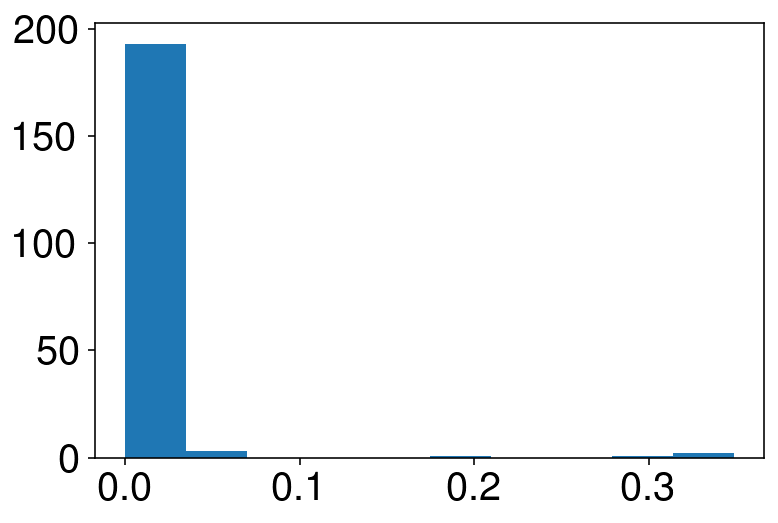

In [135]:
plt.hist(loss_first)

In [136]:
np.amax(loss_first)

0.34879144819487445

In [137]:
np.amin(loss_first)

4.397522912646945e-05

In [138]:
np.mean(loss_first)

0.007393019165723245

In [139]:
np.std(loss_first)

0.04271479247981779

In [140]:
TE_mean_PL_qinfer_sim[0]

0.000817991309517473

In [141]:
TE_std_PL_qinfer_sim[0]

0.004304532294633605

SMC + Uniform distribution (2e4 particles)

In [142]:
# Qinfer -- MSC + Passive Learner (Uniform distribution) -- 1e4 particles
SAVE_DIR_log = 'qinfer_jobs/passive_sim_long_qinfer_002/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6

FLAG_filter = False
factor_filter=1.9

FLAG_rmse_test = True
FLAG_long_time_range = True

emp_PL_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                           N_0=N_0, N_batch=N_batch,
                                                           FLAG_filter=FLAG_filter, 
                                                           FLAG_rmse_test=FLAG_rmse_test, 
                                                           FLAG_long_time_range=FLAG_long_time_range,
                                                           do_plot=False)

In [143]:
# Compute testing error over testing dataset
FLAG_recompute = False

if FLAG_recompute:
    emp_PL_qinfer_sim.compute_loss(X_test)
else:
    emp_PL_qinfer_sim.job_results['loss_test'] = loss_job_PL_qinfer2

NameError: name 'loss_job_PL_qinfer2' is not defined

Computing Ground log-likelihood ratio


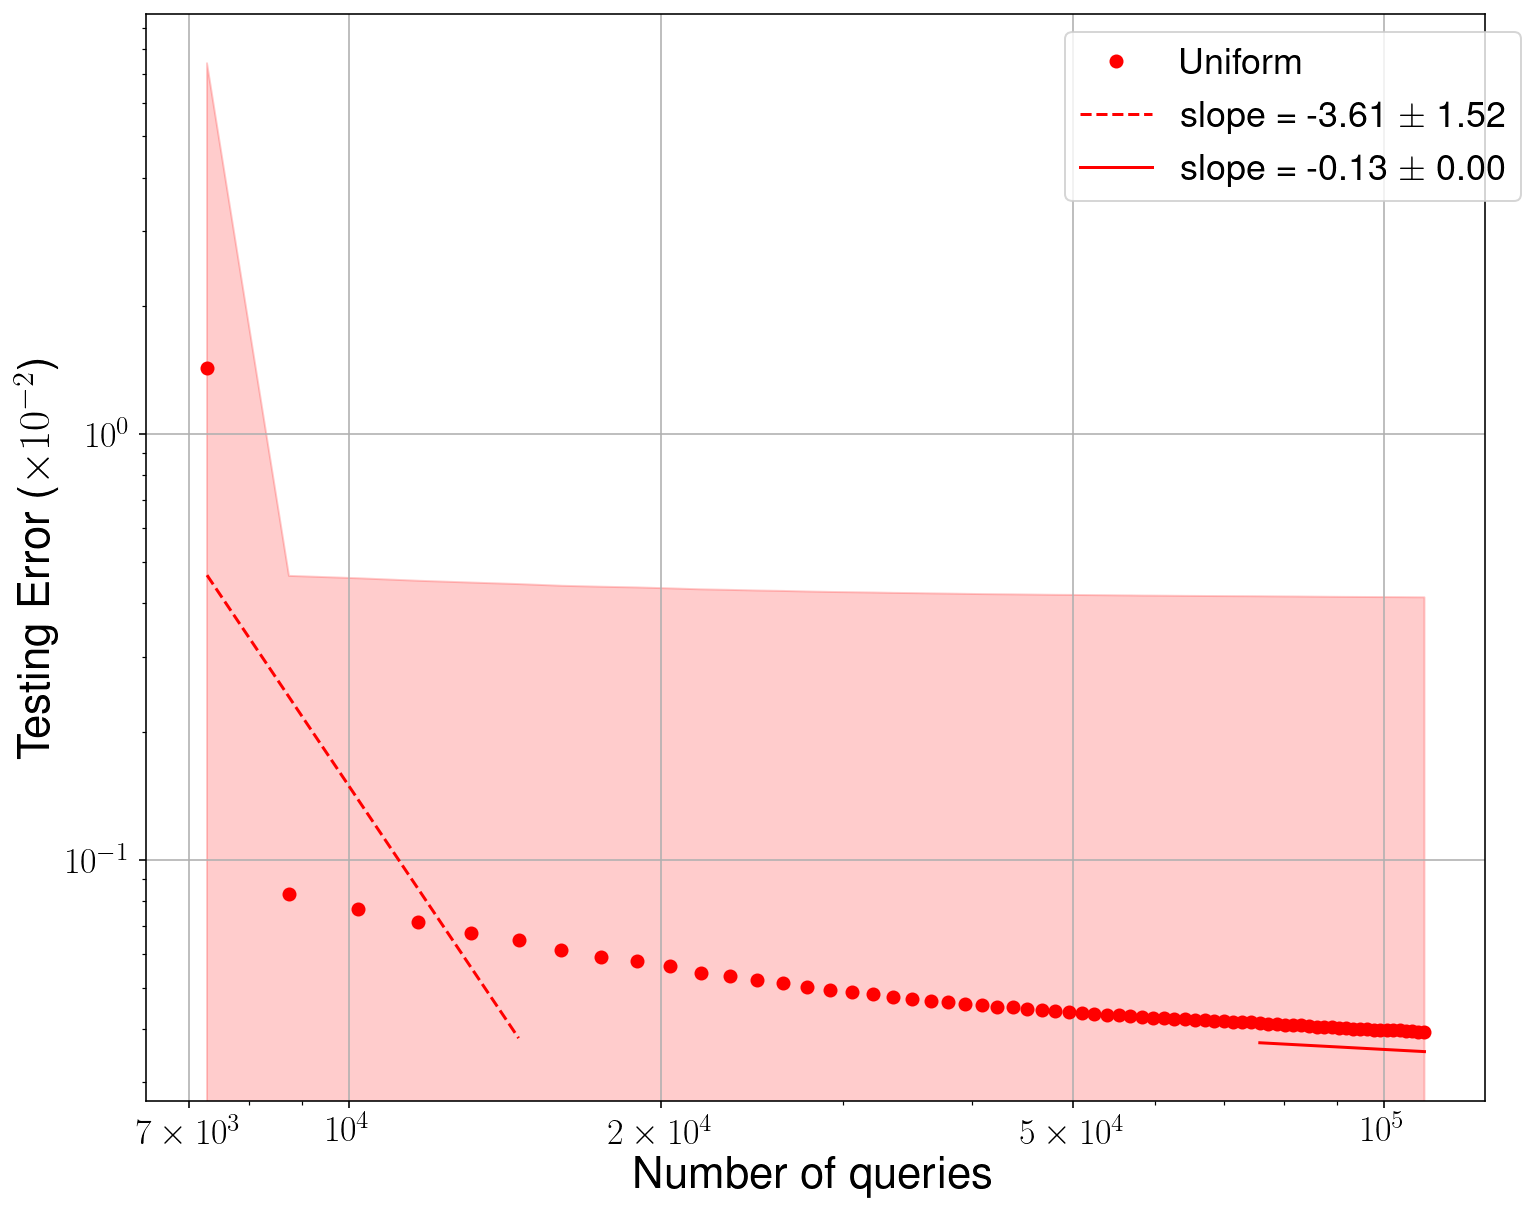

In [162]:
TE_mean_PL_qinfer_sim2, TE_std_PL_qinfer_sim2 = emp_PL_qinfer_sim.plot_testing_error(X_test, J_truth,
                                                                                   ind_iter_filter=[1,0],
                                                                                   factor_filter=1,
                                                                                   FLAG_recompute=False,
                                                                                   FLAG_empirical=False,
                                                                                   FLAG_plot=True)

SMC + HAL-FIR distribution (1e4 particles)

In [163]:
SAVE_DIR_log = 'qinfer_jobs/FIR_sim_long_qinfer_001/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = True
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True

emp_HAL_FIR_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                      N_0=N_0, N_batch=N_batch,
                                                      FLAG_filter=FLAG_filter, 
                                                      FLAG_rmse_test=FLAG_rmse_test, 
                                                          FLAG_long_time_range=FLAG_long_time_range,
                                                          do_plot=False)

In [164]:
# Compute testing error over testing dataset
FLAG_recompute = True

if FLAG_recompute:
    emp_HAL_FIR_qinfer_sim.compute_loss(X_test)
else:
    emp_HAL_FIR_qinfer_sim.job_results['loss_test'] = loss_job_HAL_FIR_qinfer

Done with run 0
Done with run 5
Done with run 10
Done with run 15
Done with run 20
Done with run 25
Done with run 30
Done with run 35
Done with run 40
Done with run 45
Done with run 50
Done with run 55
Done with run 60
Done with run 65
Done with run 70
Done with run 75
Done with run 80
Done with run 85
Done with run 90
Done with run 95
Done with run 100
Done with run 105
Done with run 110
Done with run 115
Done with run 120
Done with run 125
Done with run 130
Done with run 135
Done with run 140
Done with run 145
Done with run 150
Done with run 155
Done with run 160
Done with run 165
Done with run 170
Done with run 175
Done with run 180
Done with run 185
Done with run 190
Done with run 195


Computing Ground log-likelihood ratio
Outliers (RUN IDS) in RMSE are:
[2, 80, 99, 104, 136, 155, 161, 164, 184]
Outliers (RUN IDS) in RMSE are:
[2, 11, 35, 49, 54, 100, 108, 110, 136, 137, 148, 150, 163, 179, 184]


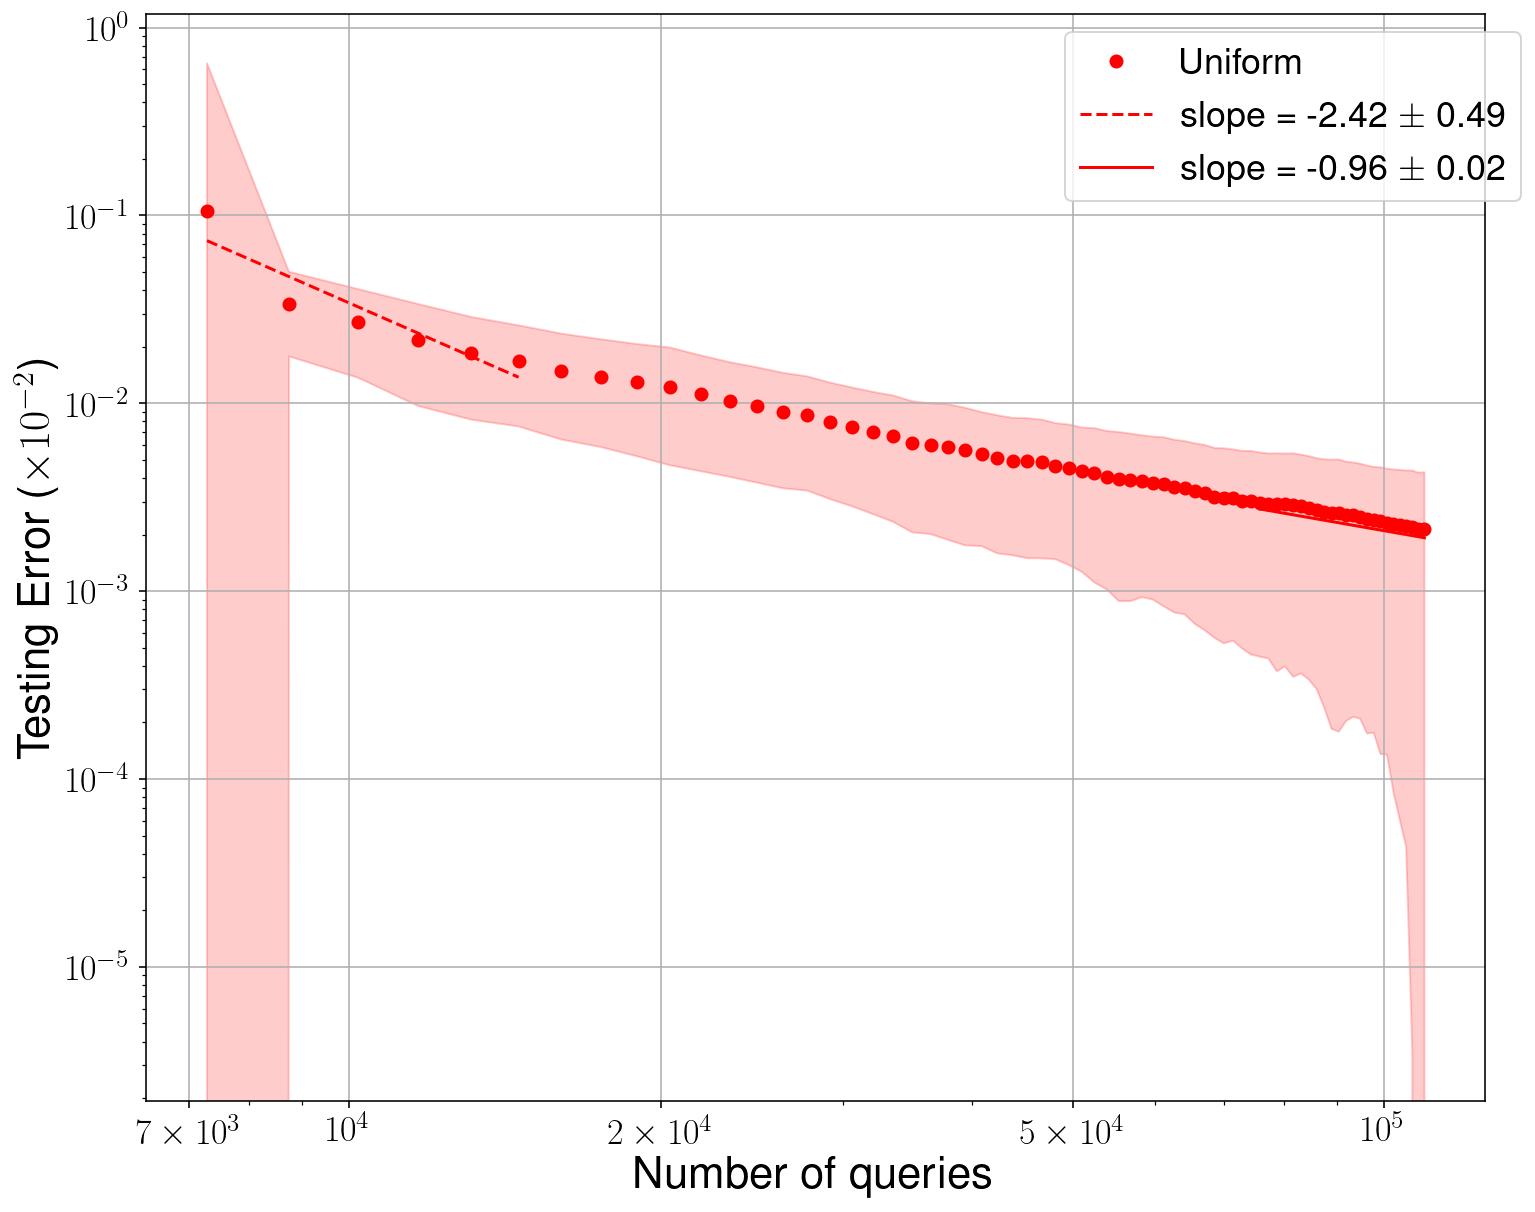

In [166]:
TE_mean_HAL_FIR_qinfer_sim, TE_std_HAL_FIR_qinfer_sim = emp_HAL_FIR_qinfer_sim.plot_testing_error(X_test, J_truth,
                                                                                         ind_iter_filter=[0,1],
                                                                                         factor_filter=1.5,
                                                                                         FLAG_recompute=False,
                                                                                         FLAG_empirical=False,
                                                                                         FLAG_plot=True)

SMC + HAL-FIR + 2e4 particles

In [144]:
SAVE_DIR_log = 'qinfer_jobs/FIR_sim_long_qinfer_002/log_runs'

max_iters = 71
max_runs = 200
N_0 = 5*243*6
N_batch = 243*6
FLAG_filter = True
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True

emp_HAL_FIR_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                      N_0=N_0, N_batch=N_batch,
                                                      FLAG_filter=FLAG_filter, 
                                                      FLAG_rmse_test=FLAG_rmse_test, 
                                                          FLAG_long_time_range=FLAG_long_time_range,
                                                          do_plot=False)

In [145]:
# Compute testing error over testing dataset
FLAG_recompute = False

if FLAG_recompute:
    emp_HAL_FIR_qinfer_sim.compute_loss(X_test)
else:
    emp_HAL_FIR_qinfer_sim.job_results['loss_test'] = loss_job_HAL_FIR_qinfer2

Computing Ground log-likelihood ratio
Outliers (RUN IDS) in RMSE are:
[41, 96, 145]


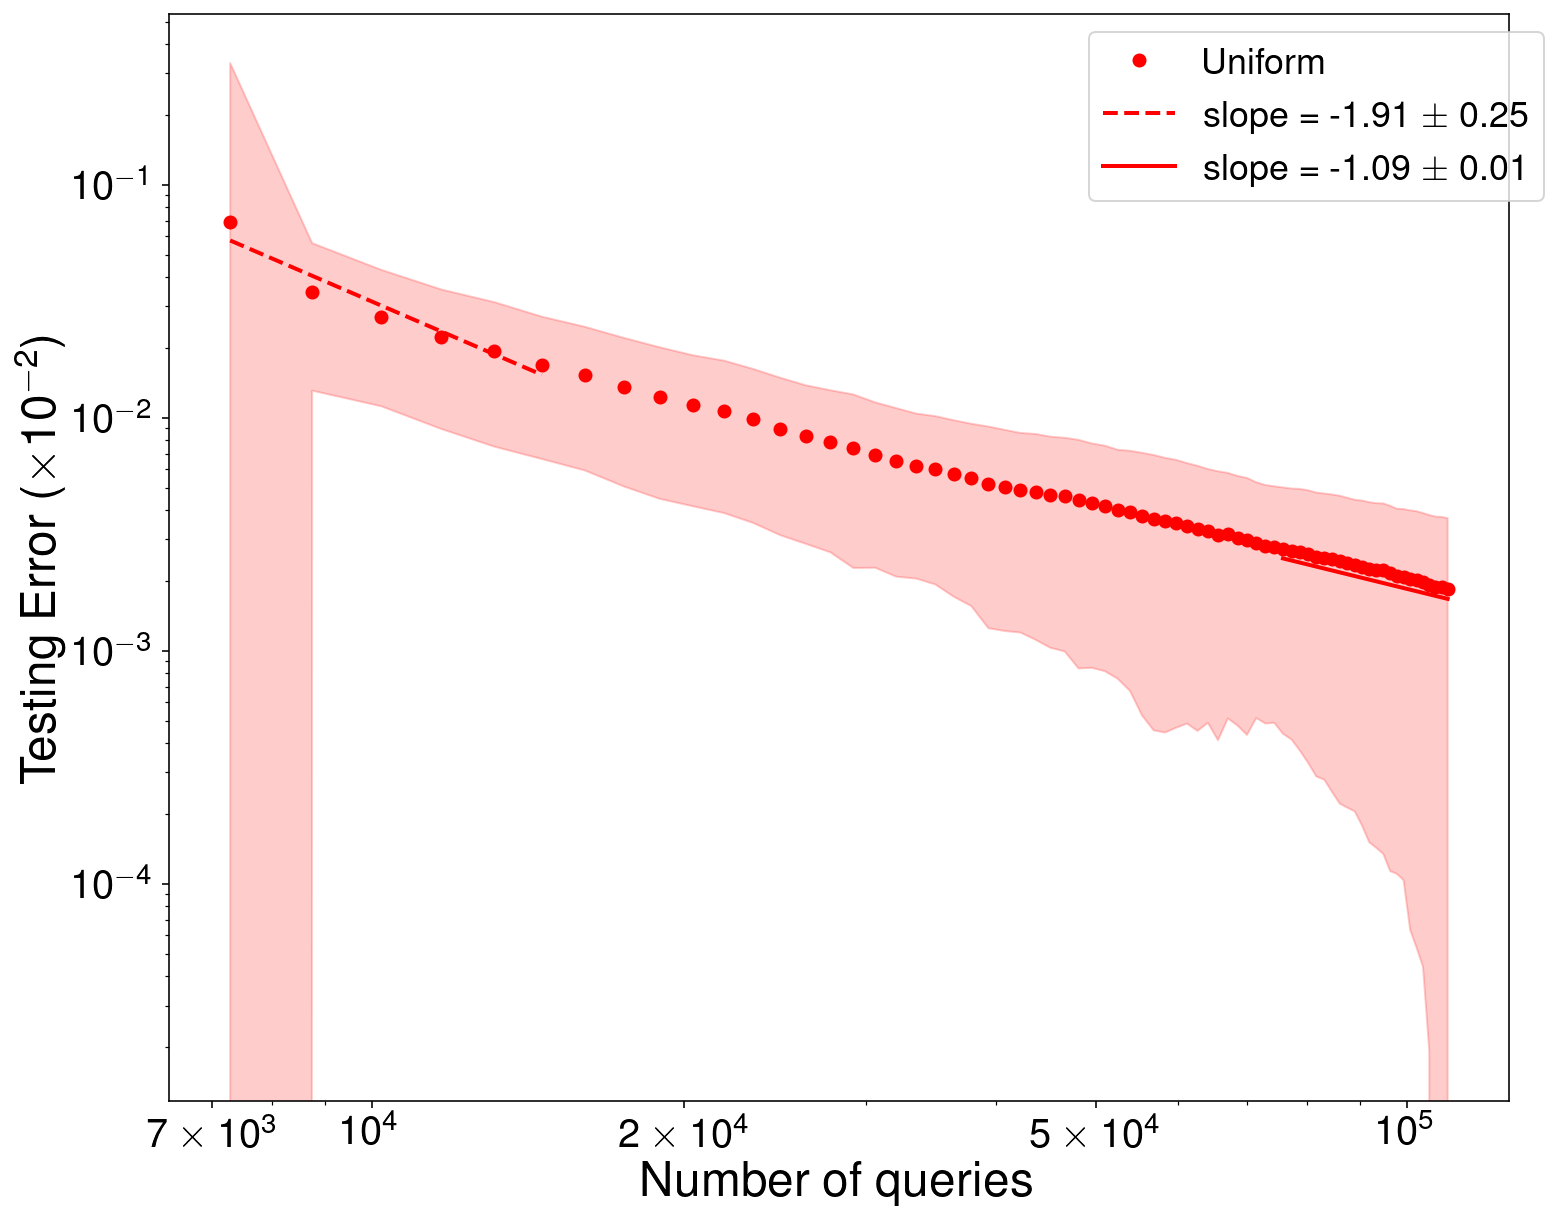

In [146]:
TE_mean_HAL_FIR_qinfer_sim2, TE_std_HAL_FIR_qinfer_sim2 = emp_HAL_FIR_qinfer_sim.plot_testing_error(X_test, J_truth,
                                                                                         ind_iter_filter=[0],
                                                                                         factor_filter=1.9,
                                                                                         FLAG_recompute=False,
                                                                                         FLAG_empirical=False,
                                                                                         FLAG_plot=True)

In [147]:
# Set TE_mean and TE_std_HAL_FIR_qinfer_sim2 to what you get if you ind_iter_filter=[0,1]
#TE_mean_HAL_FIR_qinfer_sim2[0] = 0.0004797111985759174
TE_std_HAL_FIR_qinfer_sim2[0] = 0.0004559352601088392

In [148]:
print(TE_mean_HAL_FIR_qinfer_sim2[0])

0.000694345857666088


### Qinfer saves

In [255]:
# PL + SMC -- 1e4 particles
loss_job_PL_qinfer = emp_PL_qinfer_sim.job_results['loss_test']

In [256]:
# HAL-FIR + SMC -- 2e4 particles
loss_job_HAL_FIR_qinfer2 = emp_HAL_FIR_qinfer_sim.job_results['loss_test']

In [257]:
# A lot of these computations are expensieve -- let's save the testing data set and the losses we computed
testing_data_sim_long = {'loss_job_PL_baseline': loss_job_PL_baseline,
                         'loss_job_PL_mle': loss_job_PL_mle,
                         'loss_job_HAL_FI': loss_job_HAL_FI,
                         'loss_job_HAL_FIR': loss_job_HAL_FIR,
                         'loss_job_HAL_FIR_qinfer2': loss_job_HAL_FIR_qinfer2,
                         'loss_job_PL_qinfer': loss_job_PL_qinfer,
                         'X_test': X_test}

# Save to pickle file
pickle_filename = 'Testing_Data/sim_long_001.pickle'
with open(pickle_filename, 'wb') as f:
    pickle.dump(testing_data_sim_long, f)

### Other (older) Saves

In [46]:
# A lot of these computations are expensieve -- let's save the testing data set and the losses we computed
loss_job_PL_baseline = emp_est_PL_baseline_sim.job_results['loss_test']
loss_job_PL_mle = emp_est_PL_mle_sim.job_results['loss_test']
loss_job_HAL_FI = emp_est_HAL_FI_sim.job_results['loss_test']
loss_job_HAL_FIR = emp_est_HAL_FIR_sim.job_results['loss_test']

testing_data_sim_long = {'loss_job_PL_baseline': loss_job_PL_baseline,
                         'loss_job_PL_mle': loss_job_PL_mle,
                         'loss_job_HAL_FI': loss_job_HAL_FI,
                         'loss_job_HAL_FIR': loss_job_HAL_FIR,
                         'X_test': X_test}

# Save to pickle file
pickle_filename = 'Testing_Data/sim_long_000.pickle'
with open(pickle_filename, 'wb') as f:
    pickle.dump(testing_data_sim_long, f)

### Reads

In [113]:
pickle_filename = 'Testing_Data/sim_long_000.pickle'
with open(pickle_filename, 'rb') as fp:
     testing_data_sim_long_dict = pickle.load(fp)

In [114]:
loss_job_PL_baseline = testing_data_sim_long_dict['loss_job_PL_baseline']
loss_job_PL_mle = testing_data_sim_long_dict['loss_job_PL_mle']
loss_job_HAL_FI = testing_data_sim_long_dict['loss_job_HAL_FI']
loss_job_HAL_FIR = testing_data_sim_long_dict['loss_job_HAL_FIR']
X_test = testing_data_sim_long_dict['X_test']

In [128]:
pickle_filename = 'Testing_Data/sim_long_001.pickle'
with open(pickle_filename, 'rb') as fp:
     testing_data_sim_long_dict = pickle.load(fp)

In [129]:
loss_job_PL_baseline = testing_data_sim_long_dict['loss_job_PL_baseline']
loss_job_PL_mle = testing_data_sim_long_dict['loss_job_PL_mle']
loss_job_HAL_FI = testing_data_sim_long_dict['loss_job_HAL_FI']
loss_job_HAL_FIR = testing_data_sim_long_dict['loss_job_HAL_FIR']
loss_job_PL_qinfer = testing_data_sim_long_dict['loss_job_PL_qinfer']
loss_job_HAL_FIR_qinfer2 = testing_data_sim_long_dict['loss_job_HAL_FIR_qinfer2']

X_test = testing_data_sim_long_dict['X_test']

### Summary

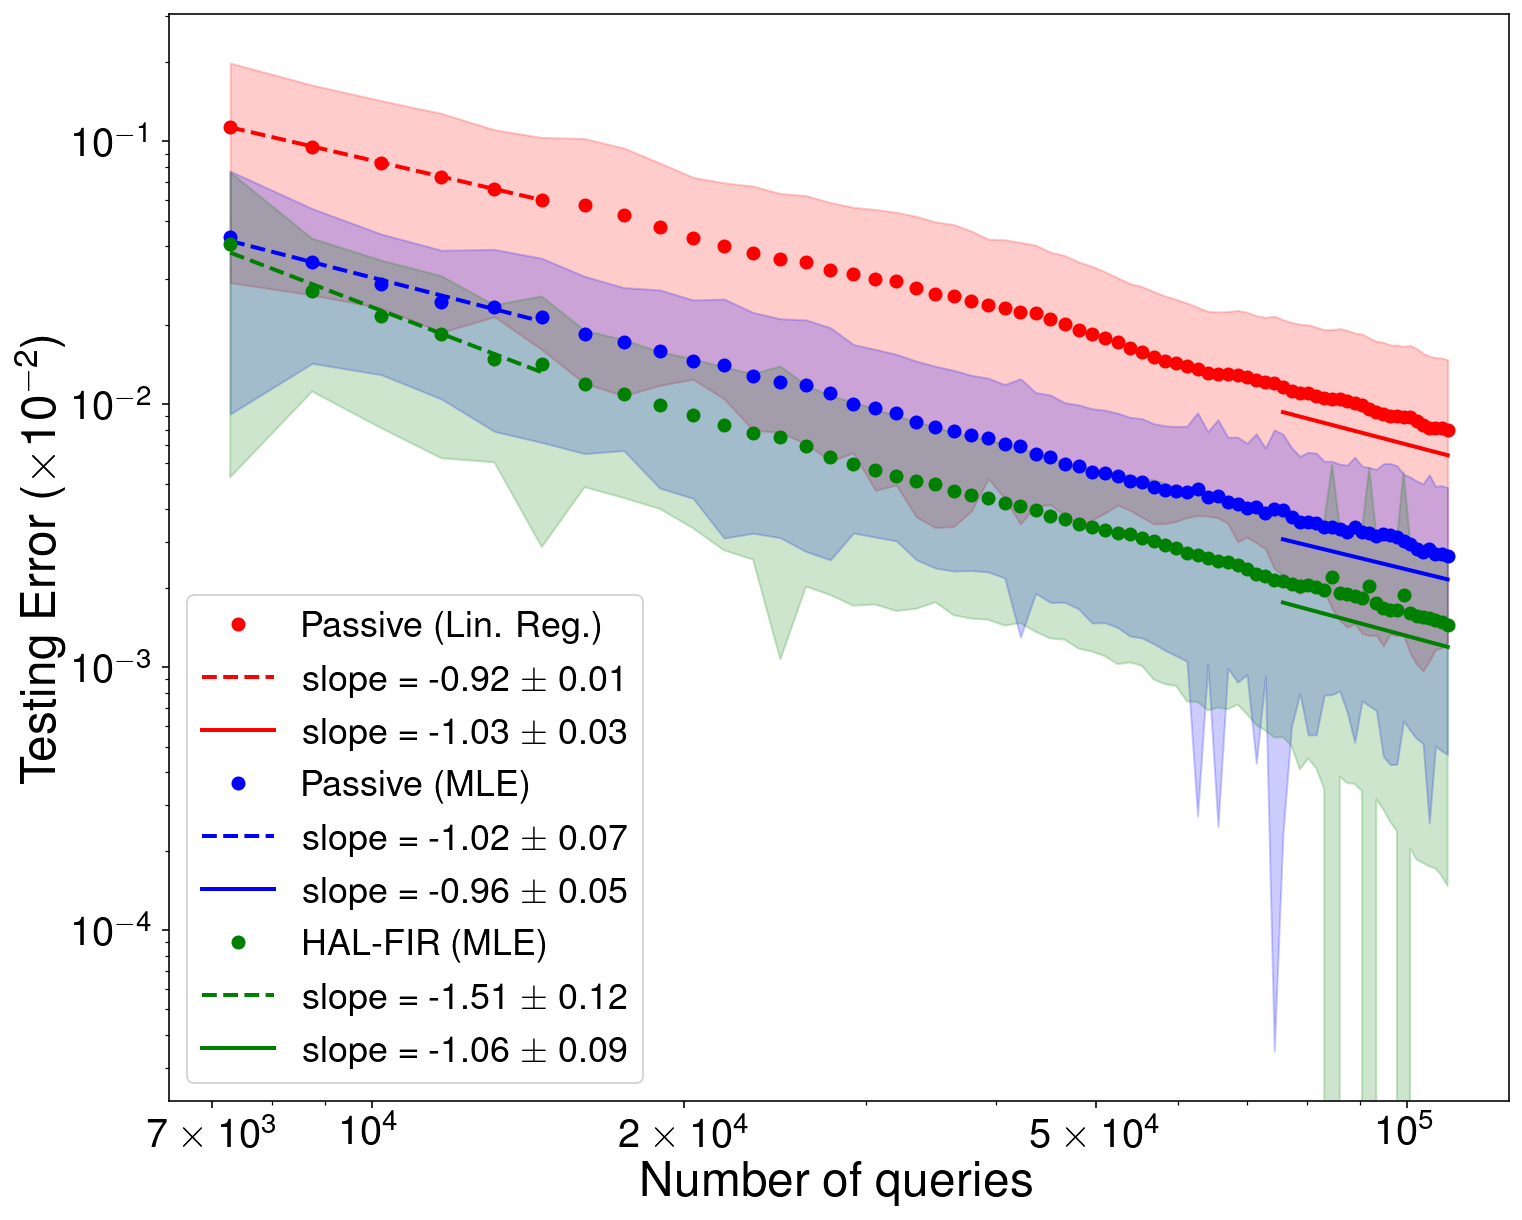

In [149]:
N_p = 5*243*6 + np.arange(71)*243*6

# Plotting
L2_error_plot = []
L2_error_plot.append(TE_mean_PL_baseline)
L2_error_plot.append(TE_mean_PL_sim)
#L2_error_plot.append(TE_mean_HAL_FI_mle_sim)
L2_error_plot.append(TE_mean_HAL_FIR_mle_sim)

#L2_error_plot.append(TE_mean_PL_qinfer_sim)
#L2_error_plot.append(TE_mean_HAL_FIR_qinfer_sim2)

nqueries_plot = []
nqueries_plot.append(N_p)
nqueries_plot.append(N_p)
#nqueries_plot.append(N_p)
nqueries_plot.append(N_p)

#nqueries_plot.append(N_p)
#nqueries_plot.append(N_p)

errorbars_plot = []
errorbars_plot.append(TE_std_PL_baseline)
errorbars_plot.append(TE_std_PL_sim)
#errorbars_plot.append(TE_std_HAL_FI_mle_sim)
errorbars_plot.append(TE_std_HAL_FIR_mle_sim)

#errorbars_plot.append(TE_std_PL_qinfer_sim)
#errorbars_plot.append(TE_std_HAL_FIR_qinfer_sim2)

labels_plot = []
labels_plot.append('Passive (Lin. Reg.)')
labels_plot.append('Passive (MLE)')
#labels_plot.append('HAL-FI')
labels_plot.append('HAL-FIR (MLE)')

#labels_plot.append('Passive (Bayesian)')
#labels_plot.append('HAL-FIR (Bayesian)')

# plotting options
plotting_options = {'label_learners': labels_plot, 
                    #'save_filename': 'summary_ibmq_oracle_sim_long_testing_000.png',
                    'save_filename': 'summary_ibmq_oracle_sim_long_testing_001.pdf',
                    'skip_learner': 0,
                    'slope_scales': np.array([0.8,0.8,0.8,0.9,1.1,1.1]),
                    'FLAG_testing_error': True, 'FLAG_long_time_range': True,
                    'FLAG_legend_outside': False}

job_processor.plot_trend(L2_error_plot, nqueries_plot, error_learners=errorbars_plot,
                         plotting_options=plotting_options)

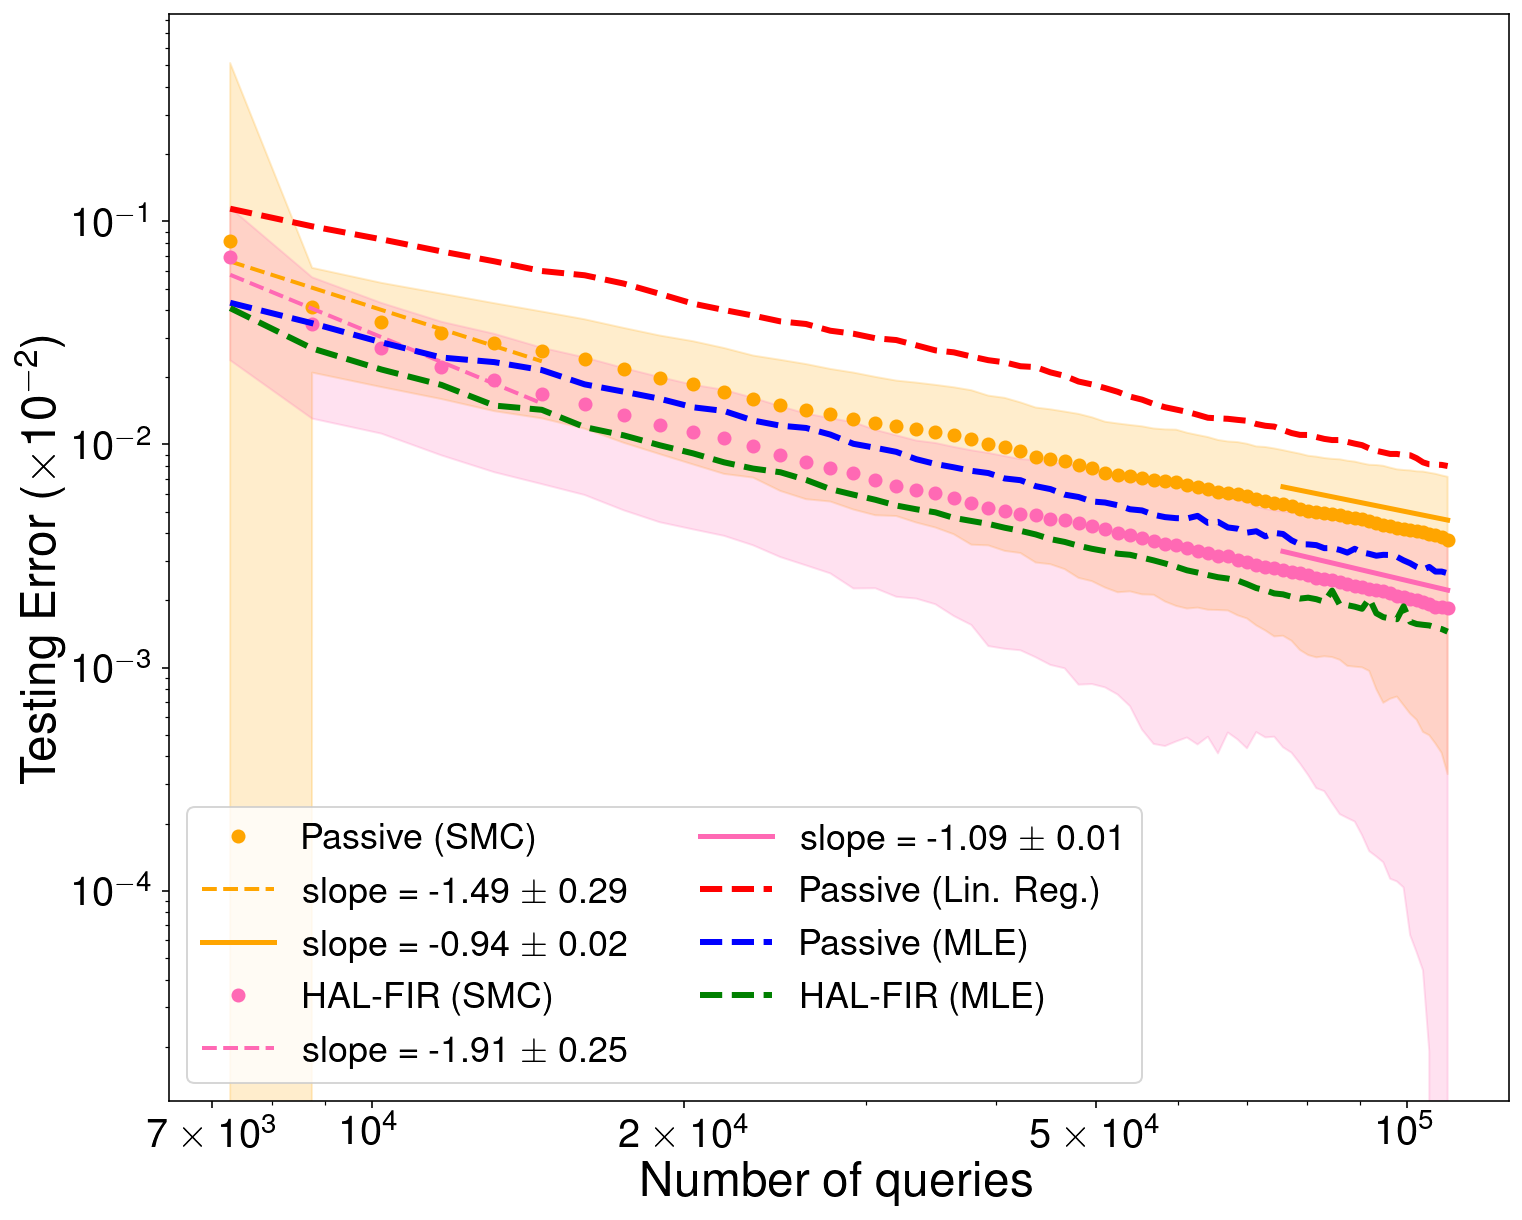

In [151]:
N_p = 5*243*6 + np.arange(71)*243*6

# Plotting
L2_error_plot = []
L2_error_plot.append(TE_mean_PL_qinfer_sim)
L2_error_plot.append(TE_mean_HAL_FIR_qinfer_sim2)
#L2_error_plot.append(L2_error_BED_qinfer)

L2_error_plot.append(TE_mean_PL_baseline)
L2_error_plot.append(TE_mean_PL_sim)
L2_error_plot.append(TE_mean_HAL_FIR_mle_sim)


nqueries_plot = []
nqueries_plot.append(N_p)
nqueries_plot.append(N_p)
#nqueries_plot.append(N_p)

nqueries_plot.append(N_p)
nqueries_plot.append(N_p)
nqueries_plot.append(N_p)

errorbars_plot = []
errorbars_plot.append(TE_std_PL_qinfer_sim)
errorbars_plot.append(TE_std_HAL_FIR_qinfer_sim2)
#errorbars_plot.append(errorbar_BED_qinfer)

errorbars_plot.append(TE_std_PL_baseline)
errorbars_plot.append(TE_std_PL_sim)
errorbars_plot.append(TE_std_HAL_FIR_mle_sim)
 
# plotting options
FLAG_plot_error_learners = [True]*len(L2_error_plot)
FLAG_plot_error_learners[2:] = [False]*3

labels_plot = []
labels_plot.append('Passive (SMC)')
labels_plot.append('HAL-FIR (SMC)')
#labels_plot.append('Qinfer (SMC)')

labels_plot.append('Passive (Lin. Reg.)')
labels_plot.append('Passive (MLE)')
labels_plot.append('HAL-FIR (MLE)')

plotting_options = {'label_learners': labels_plot,
                    'skip_learner': 0,
                    'save_filename': 'comparison_PL_AL_qinfer_sim_long_testing.pdf',
                    'FLAG_legend_outside': False,
                    'slope_scales': [1.2, 1.2, 1.1, 0.9, 1.1, 0.9, 0.9, 0.9],
                    'FLAG_testing_error': True, 'FLAG_long_time_range': True}

job_processor.plot_trend_compare_mle_bayesian(L2_error_plot, nqueries_plot, error_learners=errorbars_plot, 
                                              FLAG_plot_error_learners=FLAG_plot_error_learners,
                                              plotting_options=plotting_options)

In [189]:
reload_package(hamiltonianlearner)

# Simulator: Short time interval -- MFC criterion isn't satisfied

## RMSE

### Baseline (Passive Learner with estimator of regression)

0
40/200 runs failed
250.0
-0.21737996040498317


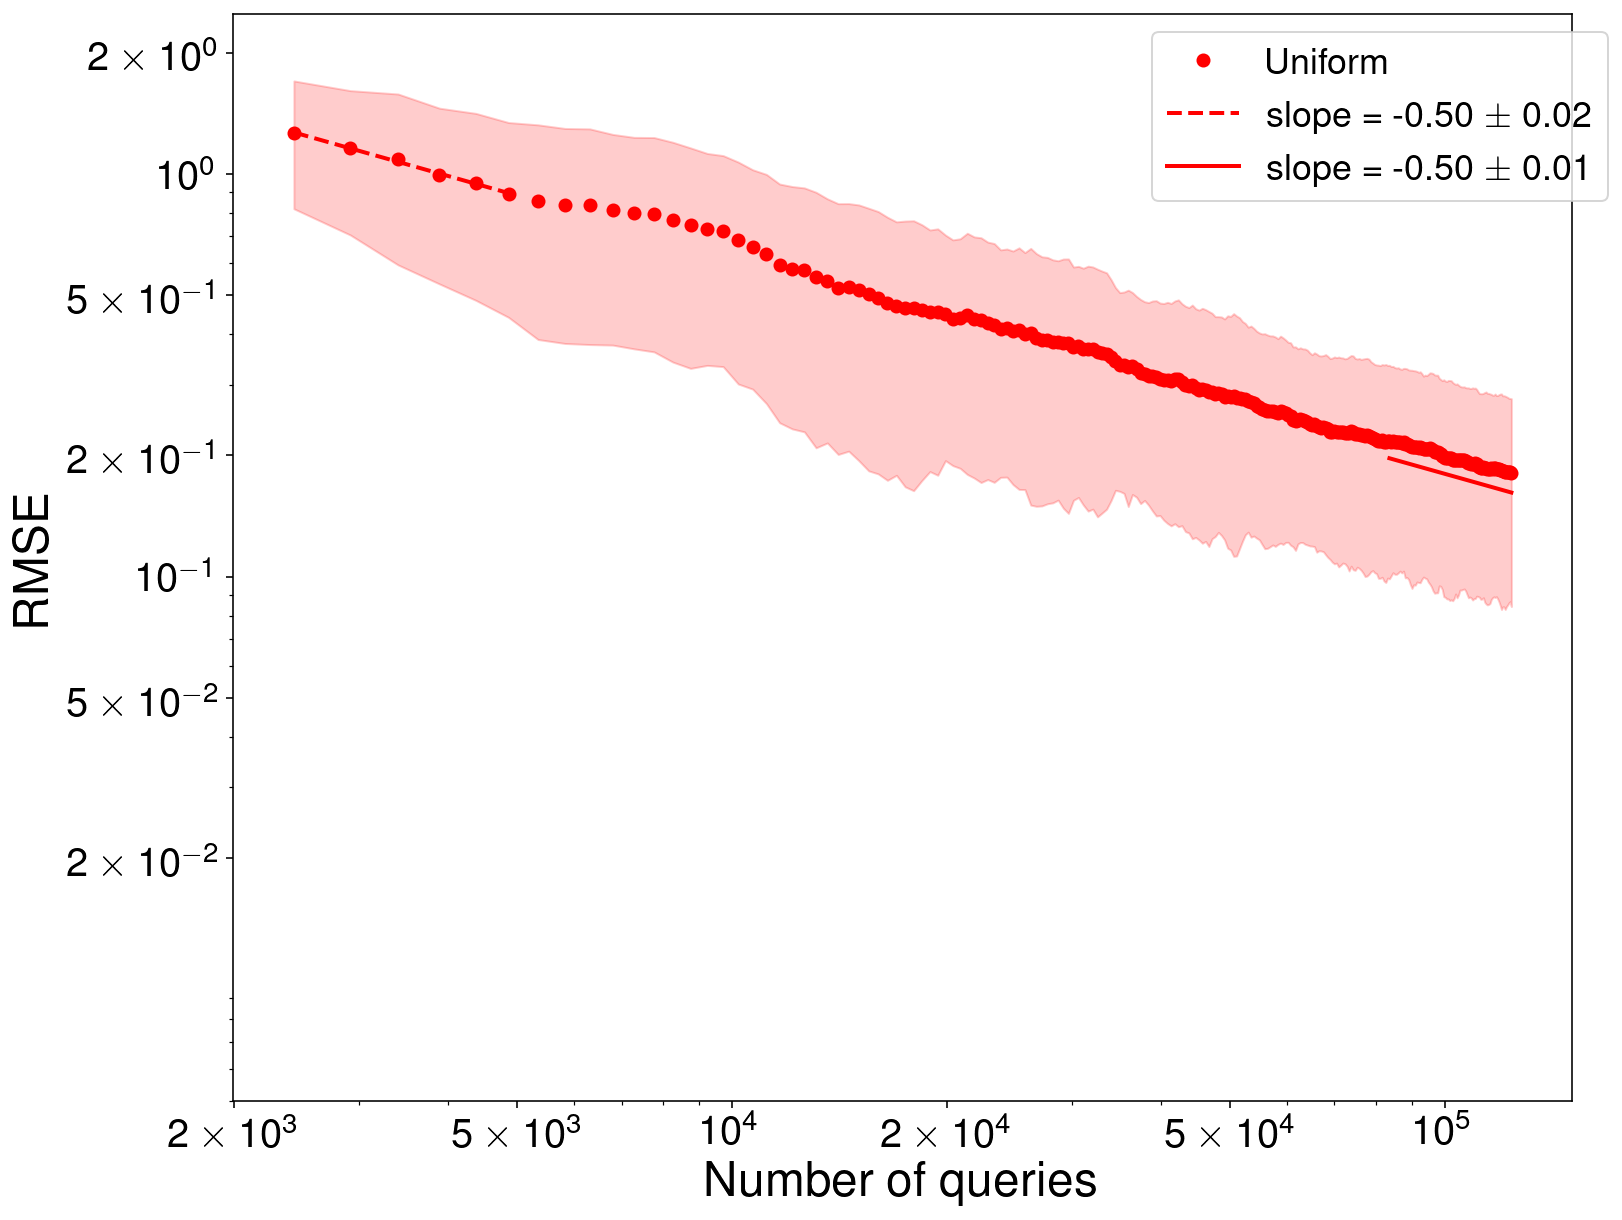

In [152]:
SAVE_DIR = 'passive_baseline_sim/passive_baseline_sim_001'
log_file = SAVE_DIR + '/log_job_1.txt'

contents_log = np.loadtxt(log_file,skiprows=1)
max_iters = 251
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6
FLAG_filter = False
factor_filter=1.9

results_job_baseline_sim = job_processor.extract_results_log(contents_log, max_iters, max_runs, 
                                                       FLAG_log_mod=False, N_0=N_0, N_batch=N_batch, 
                                                       FLAG_filter=FLAG_filter, 
                                                       ind_iter_filter=[0],
                                                       factor_filter=factor_filter, do_plot=True)

In [153]:
SAVE_DIR_log = 'passive_baseline_sim/passive_baseline_sim_001/log_runs'

max_iters = 251
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True
FLAG_filter = True
FLAG_rmse_test = True

emp_est_baseline_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                        N_0=N_0, N_batch=N_batch,
                                                        FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                        do_plot=False)

Outliers (RUN IDS) in RMSE are:
[42, 53, 59, 65, 86, 101, 102, 104, 117, 124, 128]


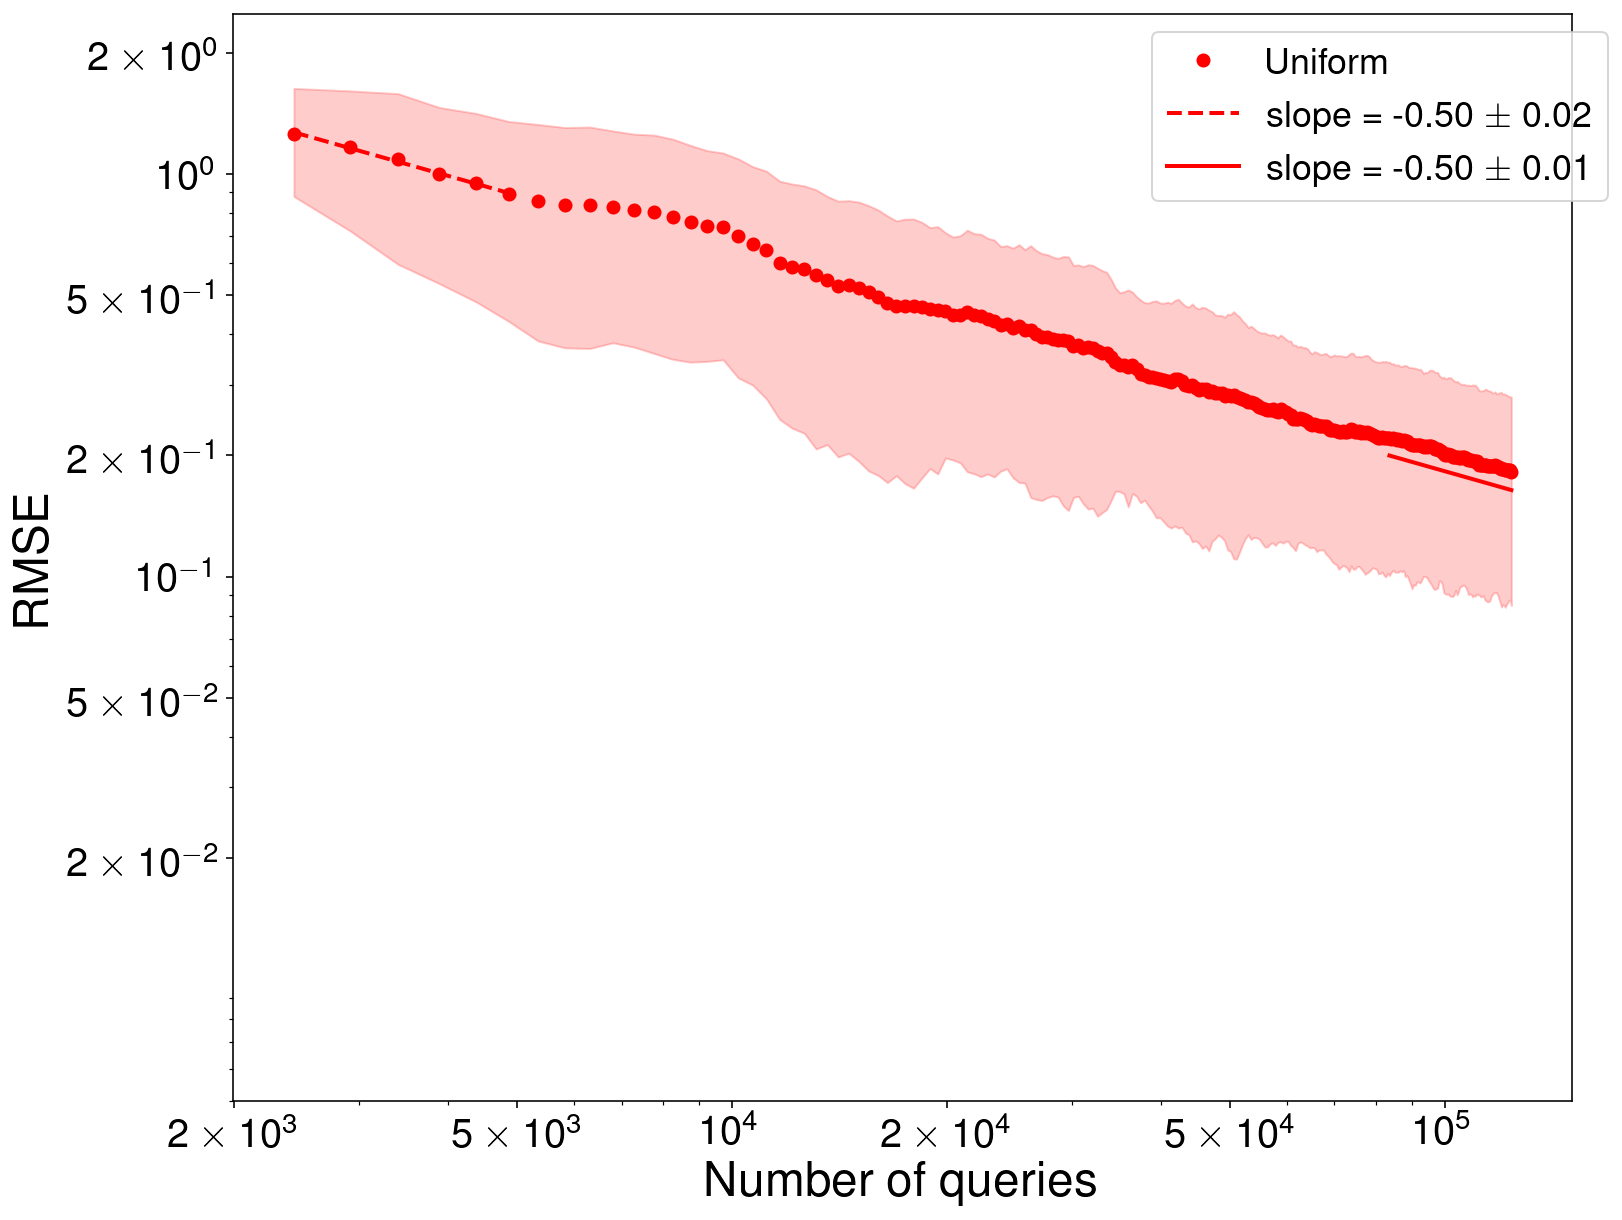

In [154]:
rmse_mean_baseline, rmse_std_baseline  = emp_est_baseline_sim.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

### Passive Learner with estimator of MLE

In [155]:
import copy

In [156]:
SAVE_DIR = 'passive_mle_sim/passive_mle_sim_000'
log_file = SAVE_DIR + '/log_job_0.txt'

contents_log = np.loadtxt(log_file,skiprows=1)
max_iters = 251
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6
FLAG_filter = False
factor_filter=1.9

results_job_PL_sim = job_processor.extract_results_log(contents_log, max_iters, max_runs, 
                                                       FLAG_log_mod=False, N_0=N_0, N_batch=N_batch, 
                                                       FLAG_filter=FLAG_filter, 
                                                       ind_iter_filter=[],
                                                       factor_filter=factor_filter, do_plot=False)

0
5/200 runs failed
250.0
-1.2517895343683985


In [157]:
rmse_PL_sim = results_job_PL_sim['rmse_mean']

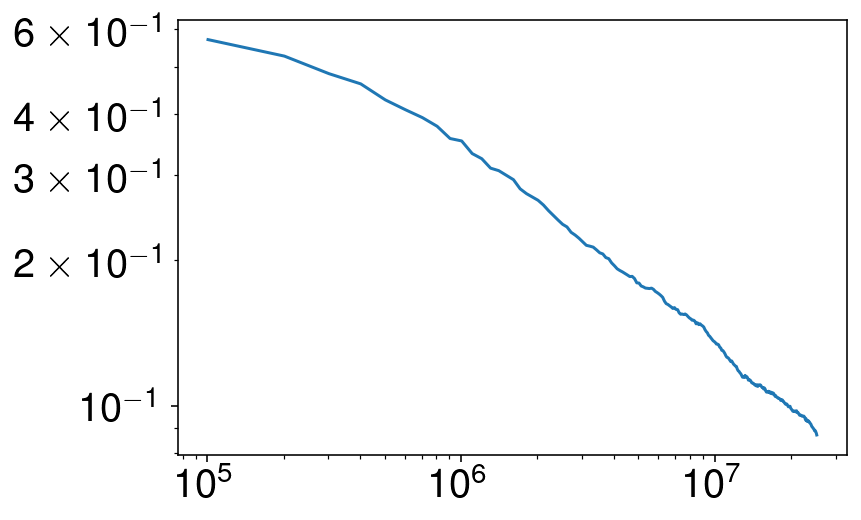

In [158]:
# Sneak peak look into the computational cost plot
max_iters = 251
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

n_queries = 81*6
max_iters_est = 207

cost = []
cost_temp = 0
for ind in range(max_iters):
    cost_temp += n_queries*max_iters_est
    cost.append(cost_temp)

# plot
cost_PL = copy.deepcopy(cost)
plt.plot(cost_PL, rmse_PL_sim)
plt.xscale('log')
plt.yscale('log')

### HAL-FI -- fixed qs

In [23]:
SAVE_DIR = 'FI_mle_sim/FI_mle_sim_000'
log_file = SAVE_DIR + '/log_job_0.txt'

contents_log = np.loadtxt(log_file,skiprows=1)
max_iters = 251
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6
FLAG_filter = False
factor_filter=1.9

results_job_AL_sim = job_processor.extract_results_log(contents_log, max_iters, max_runs, 
                                                       FLAG_log_mod=False, N_0=N_0, N_batch=N_batch, 
                                                       FLAG_filter=FLAG_filter, 
                                                       ind_iter_filter=[],
                                                       factor_filter=factor_filter, do_plot=False)

0
0/200 runs failed
250.0
0.1061095742501002


In [160]:
rmse_mean_AL_sim = results_job_AL_sim['rmse_mean']

In [28]:
SAVE_DIR_log = 'FI_mle_sim/FI_mle_sim_000/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True
FLAG_filter = False
FLAG_rmse_test = True

emp_est_AL_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                 N_0=N_0, N_batch=N_batch,
                                                 FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                 do_plot=False)

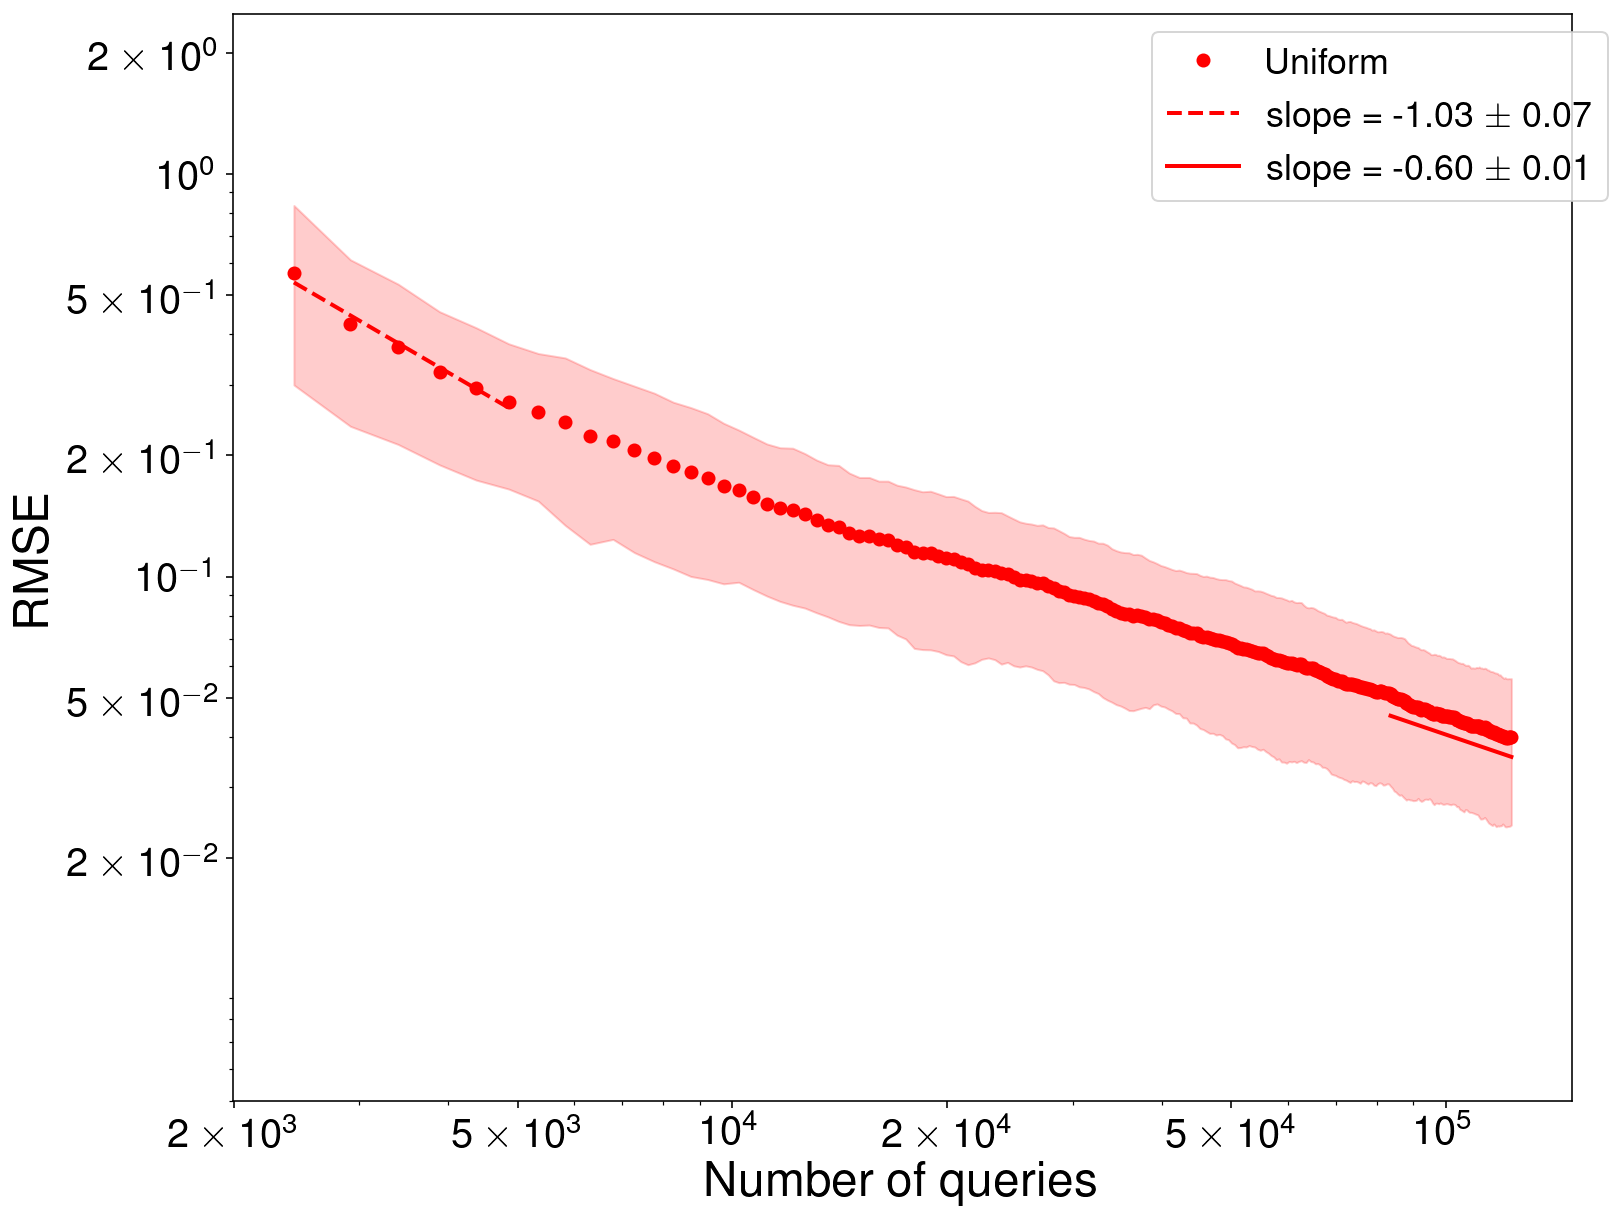

In [29]:
rmse_mean_AL_sim2, rmse_std_AL_sim2  = emp_est_AL_sim.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

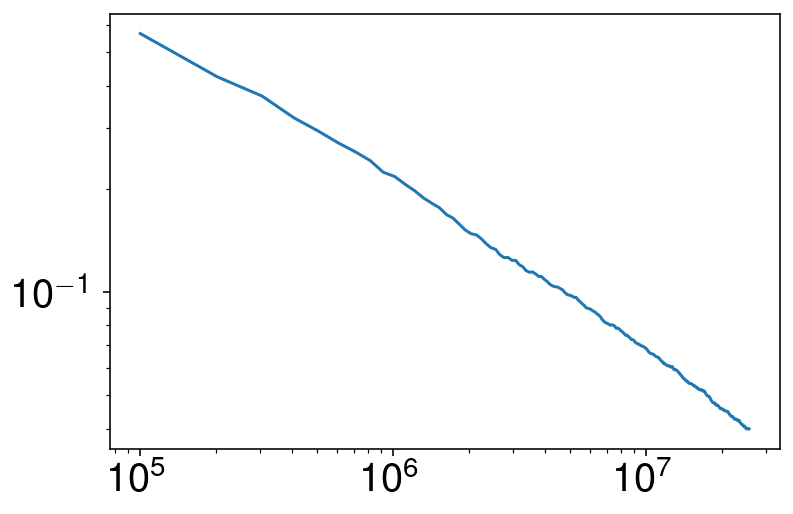

In [161]:
# Sneak peak look into the computational cost plot
max_iters = 251
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

n_queries = 81*6
max_iters_est = 207

# cost of SDP
n_Q = 486
L = 10
m = 6

cost = []
cost_temp = 0
for ind in range(max_iters):
    if ind == 0:
        # likelihood computation for estimation
        # for the first datapoint = this is just n_queries
        cost_temp += n_queries*max_iters_est
    elif ind > 0:
        # Calculation of Fisher information matrices (2-jacobian, 1-likelihood)
        cost_temp += 3*n_queries
        
#         # SDP solve
#         cost_temp += L*(n_Q)**2
        
        # likelihood computation for estimation
        cost_temp += n_queries*max_iters_est
    
    cost.append(cost_temp)
    
# plot
cost_AL = copy.deepcopy(cost)
plt.plot(cost_AL, rmse_mean_AL_sim)
plt.xscale('log')
plt.yscale('log')

In [162]:
(n_Q**2)*(m**3)

51018336

### HAL-FI -- linearly growing qs

In [22]:
SAVE_DIR_log = 'FI_mle_sim/FI_mle_sim_linear_qs_001/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6
FLAG_mod = True
factor_filter=1.9
FLAG_rmse_test = True
FLAG_filter = False
FLAG_rmse_test = True

emp_est_AL_sim_lin_qs = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                         N_0=N_0, N_batch=N_batch,
                                                         FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                         do_plot=False)

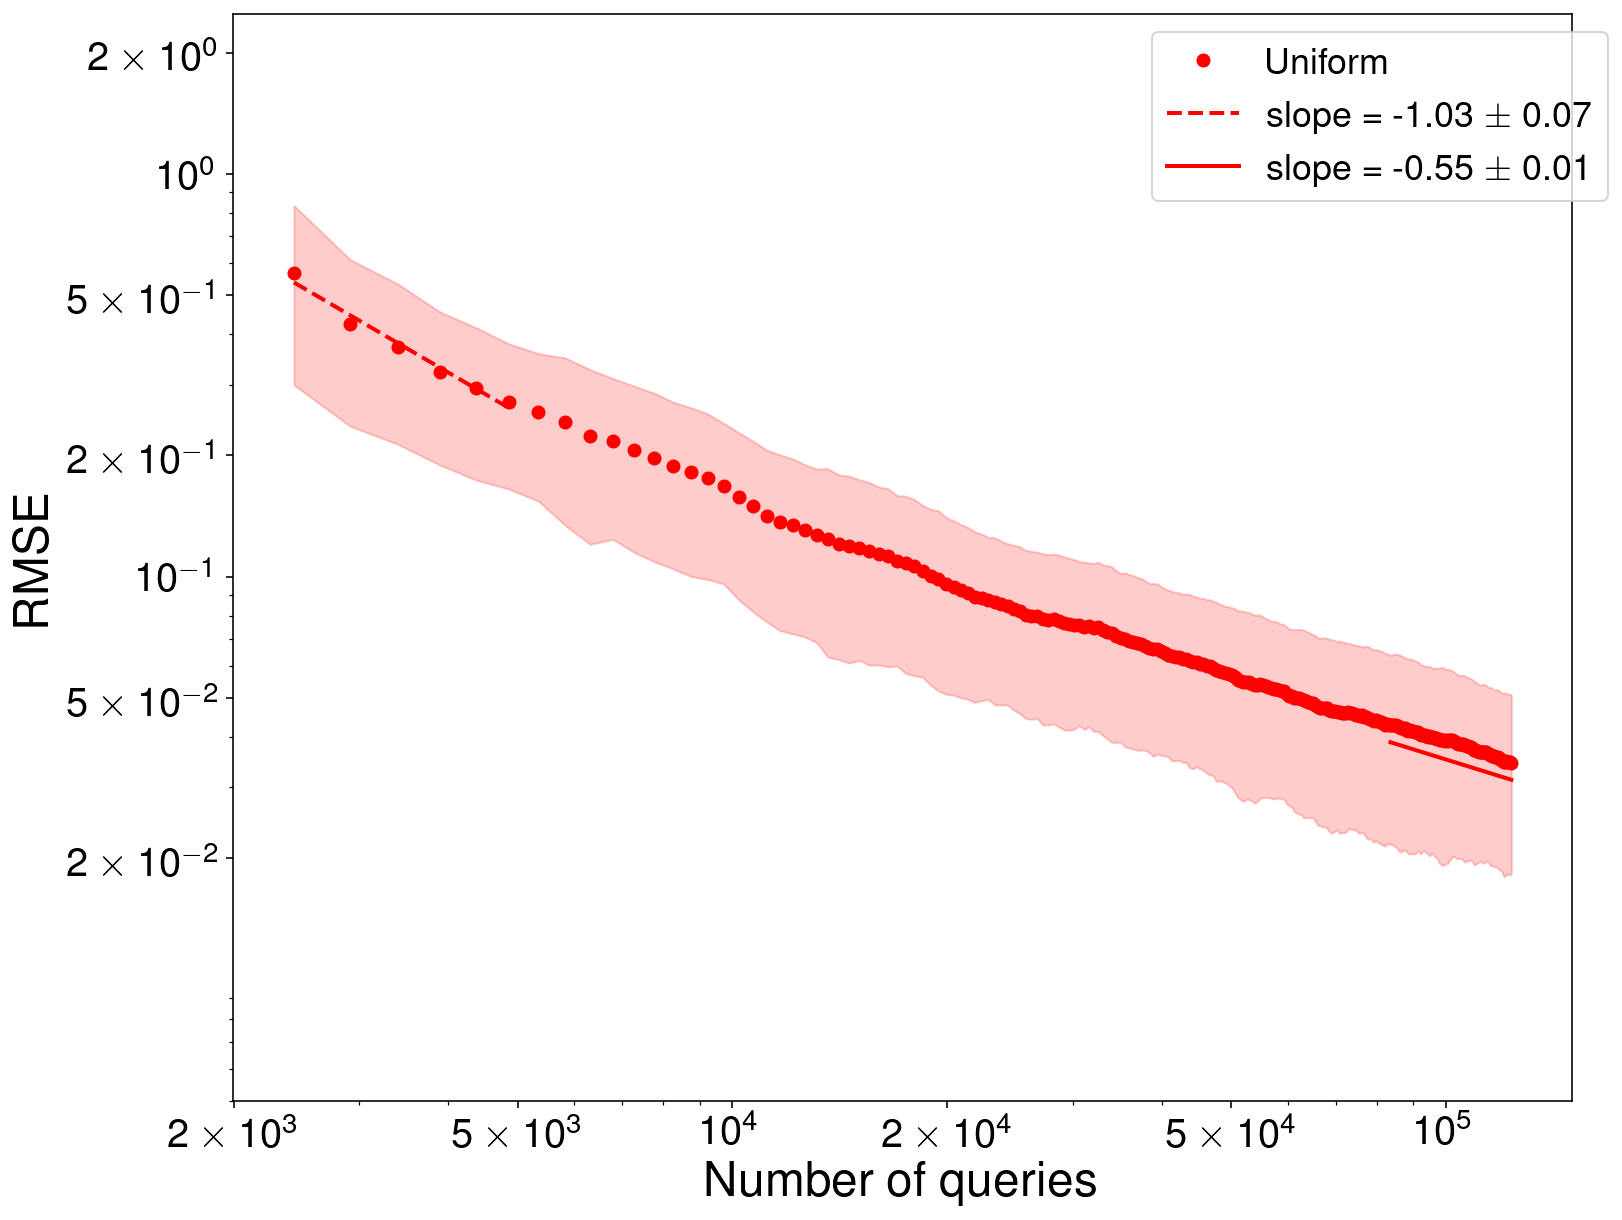

In [164]:
rmse_mean_AL_sim_lin_qs, rmse_std_AL_sim_lin_qs  = emp_est_AL_sim_lin_qs.plot_rmse(ind_iter_filter=[0], 
                                                                                   FLAG_plot=True)

## Bayesian estimator jobs

### Passive learner + SMC

In [165]:
# SMC + Uniform distribution + 5e3 particles
SAVE_DIR_log = 'qinfer_jobs/passive_sim_qinfer_003/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

FLAG_mod = True
factor_filter=1.9
FLAG_filter = True

FLAG_rmse_test = True

emp_est_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                        N_0=N_0, N_batch=N_batch,
                                                        FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                        do_plot=False)

Outliers (RUN IDS) in RMSE are:
[73, 129, 169]


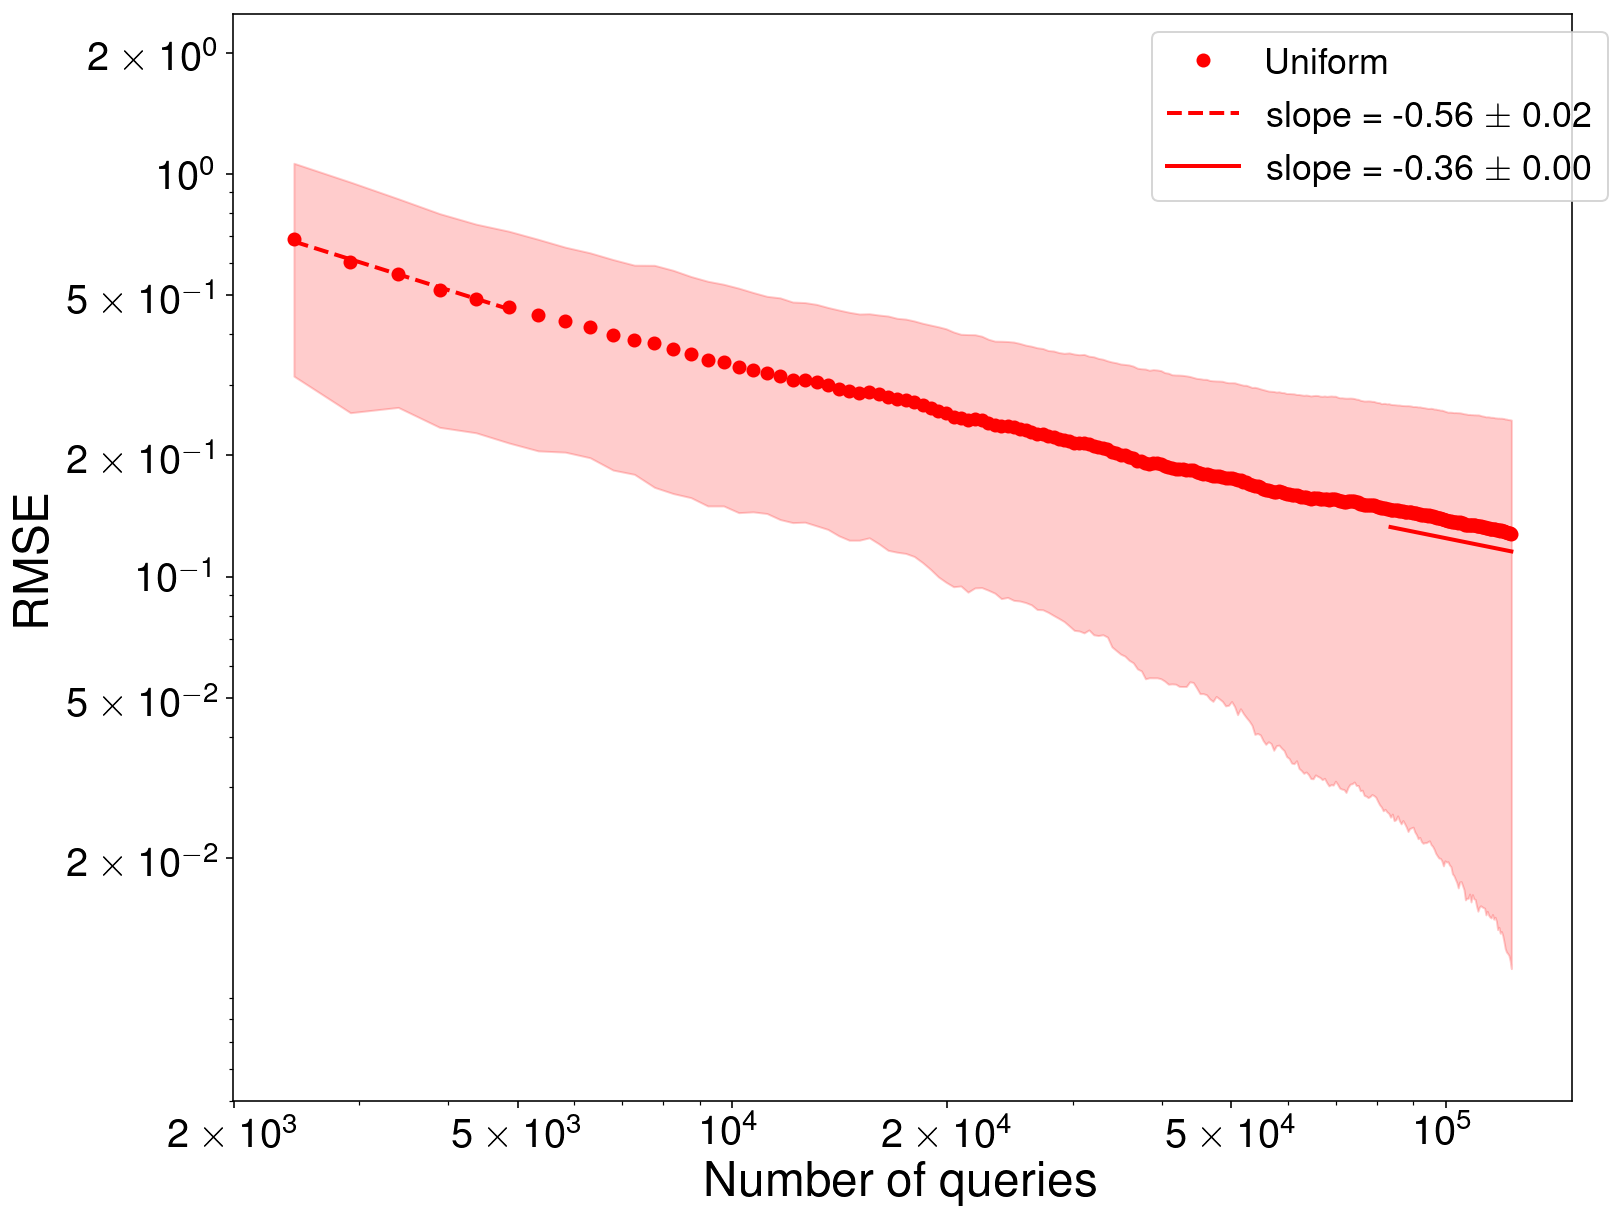

In [166]:
rmse_mean_qinfer, rmse_std_qinfer  = emp_est_qinfer_sim.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

In [167]:
# SMC + Uniform distribution + 2e4 particles
SAVE_DIR_log = 'qinfer_jobs/passive_sim_qinfer_004/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

FLAG_mod = True
factor_filter=1.9
FLAG_filter = True

FLAG_rmse_test = True

emp_est_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                        N_0=N_0, N_batch=N_batch,
                                                        FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                        do_plot=False)

Outliers (RUN IDS) in RMSE are:
[68, 96, 103, 132]


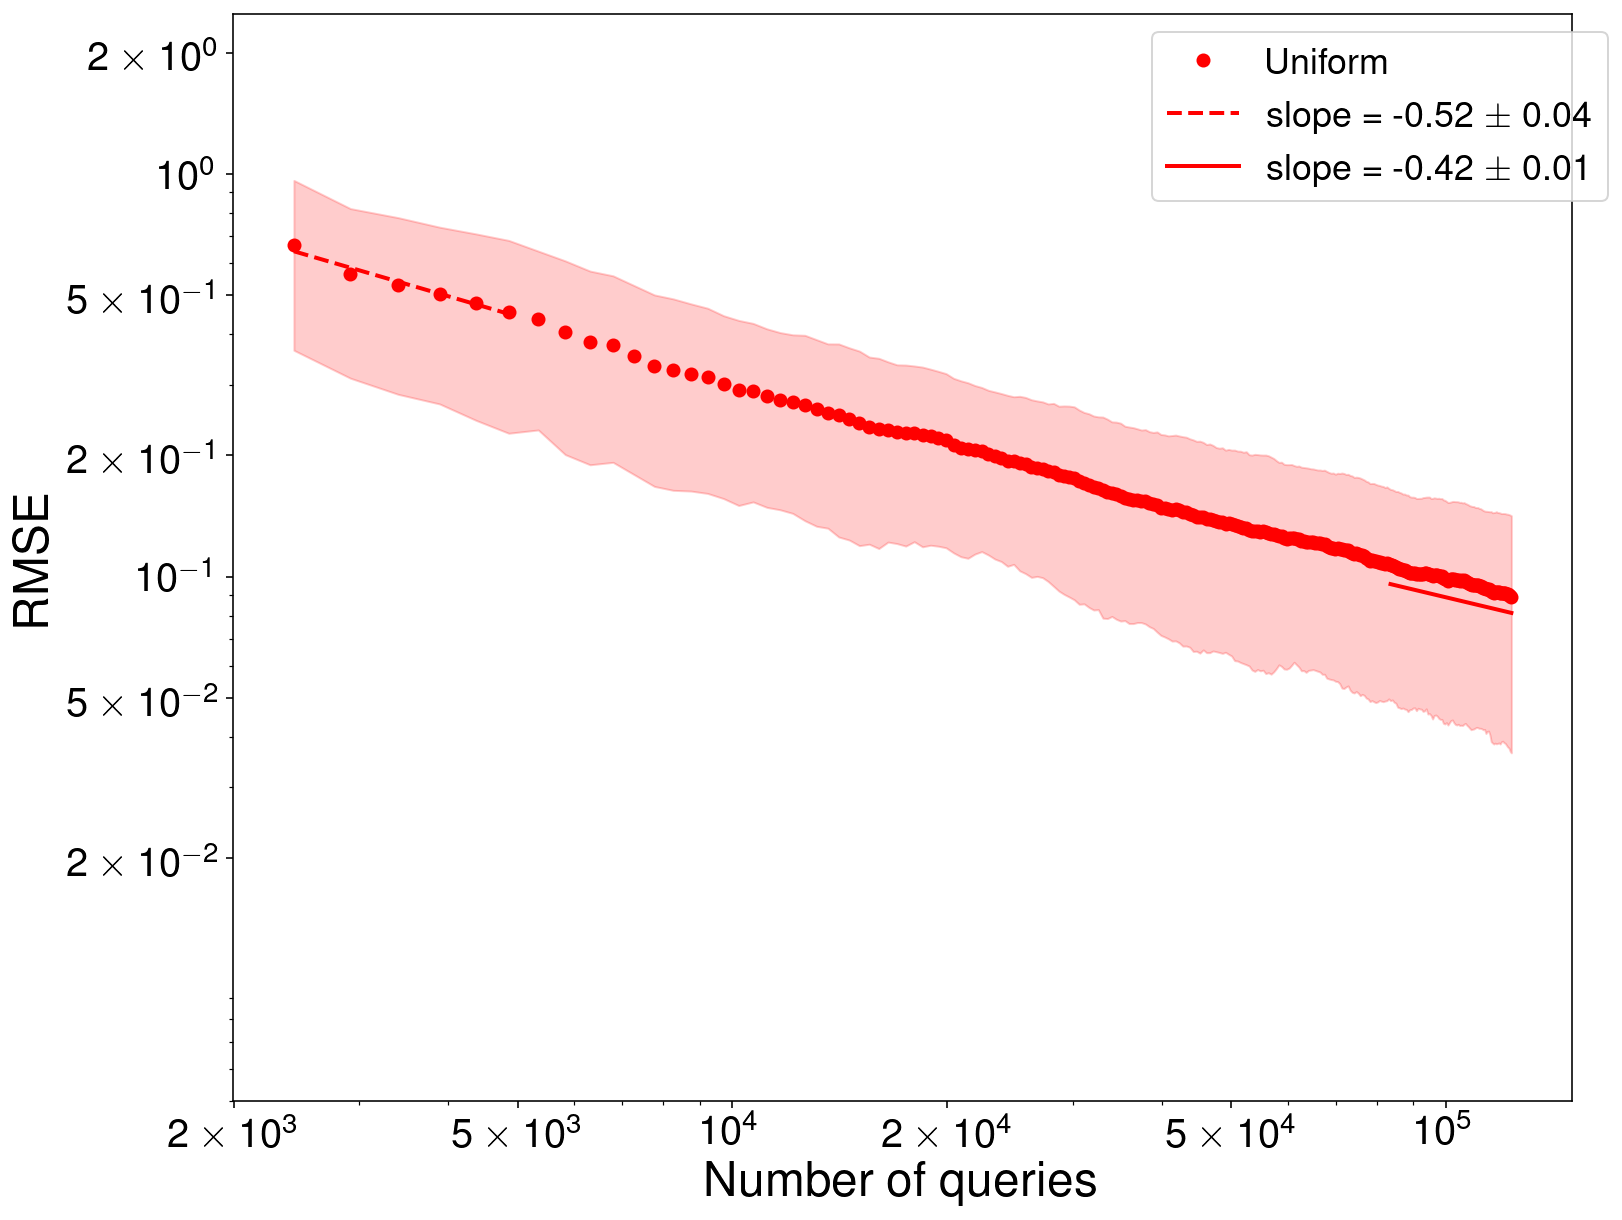

In [168]:
rmse_mean_qinfer2, rmse_std_qinfer2  = emp_est_qinfer_sim.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

In [169]:
# SMC + Uniform distribution + 1e4 particles
SAVE_DIR_log = 'qinfer_jobs/passive_sim_qinfer_005/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

FLAG_mod = True
factor_filter=1.9
FLAG_filter = True

FLAG_rmse_test = True

emp_est_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                        N_0=N_0, N_batch=N_batch,
                                                        FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                        do_plot=False)

Outliers (RUN IDS) in RMSE are:
[0, 26, 43, 75, 89, 104, 116, 120, 158, 176, 182]


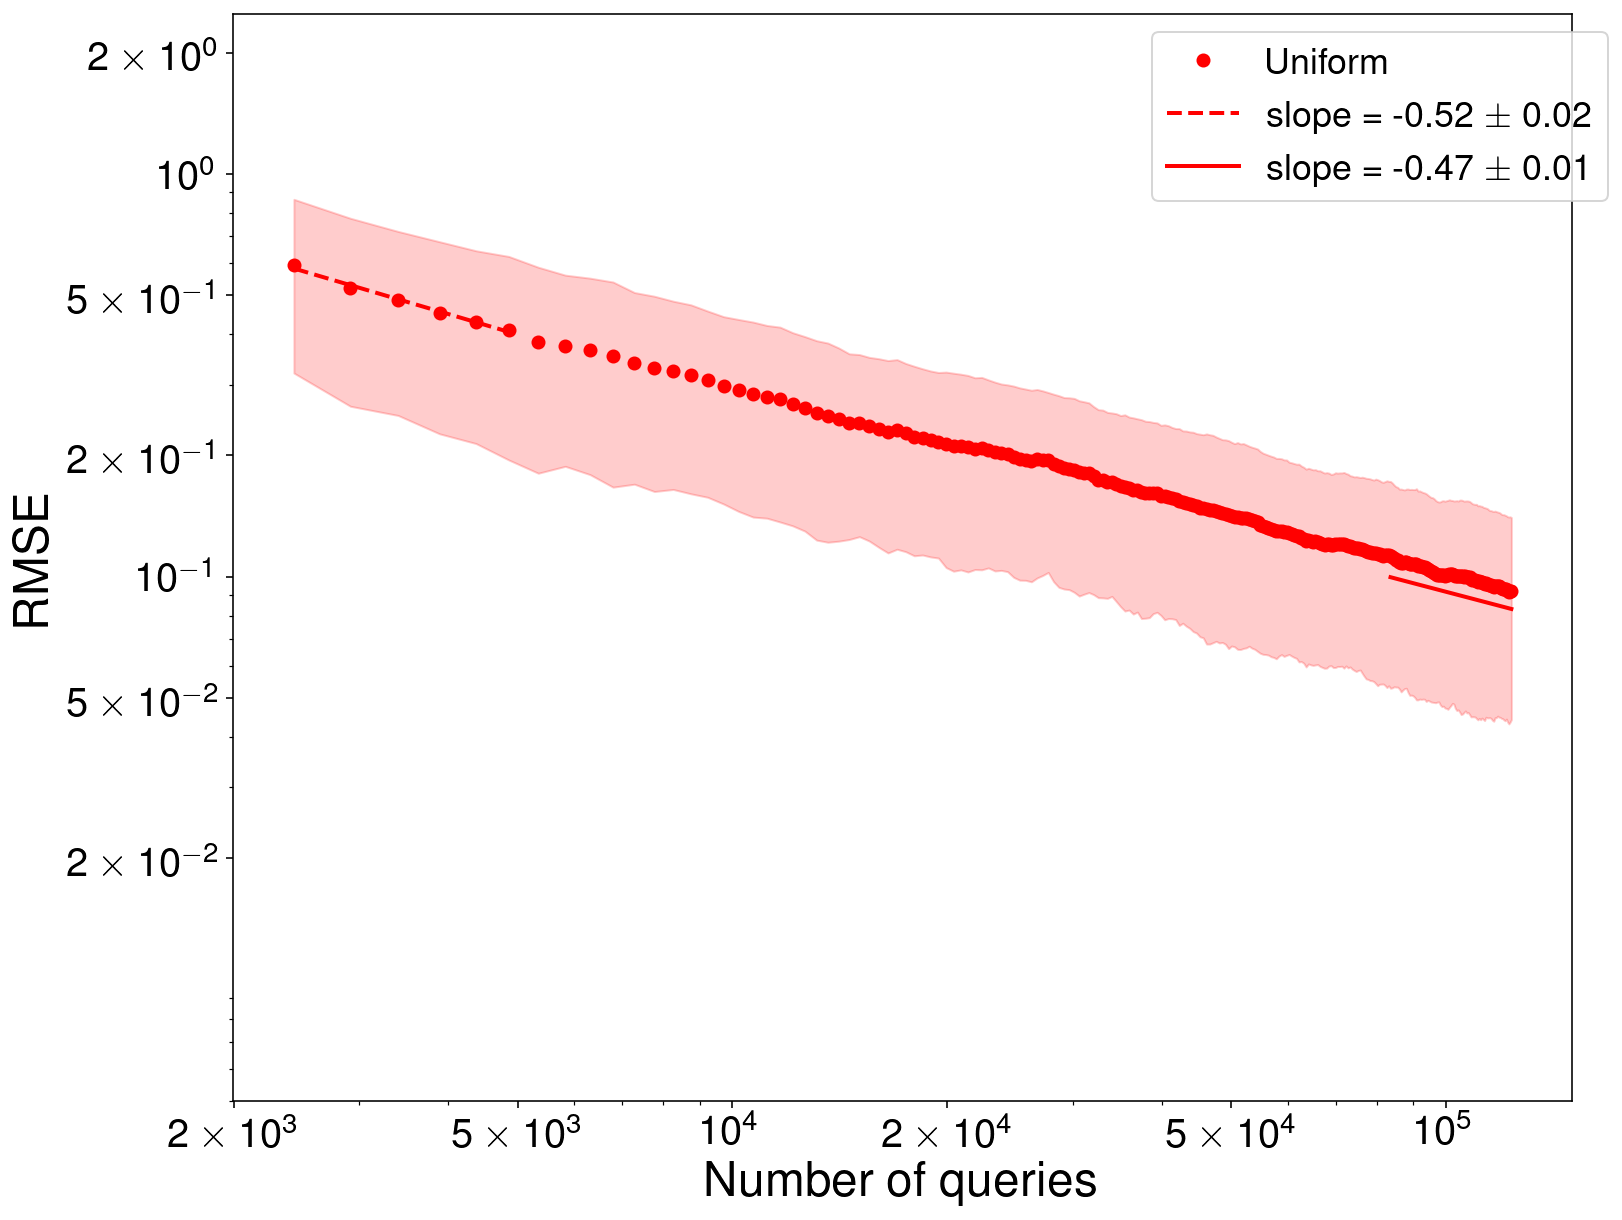

In [170]:
rmse_mean_qinfer3, rmse_std_qinfer3  = emp_est_qinfer_sim.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

In [171]:
import copy

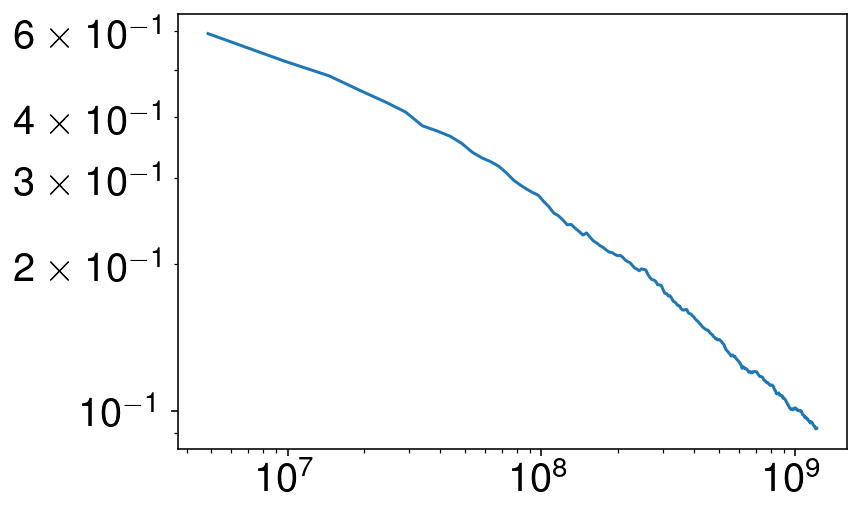

In [172]:
# Sneak peak look into the computational cost plot
max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6
n_particles = 1e4

n_queries = 81*6

cost = []
cost_temp = 0
for ind in range(max_iters):
    cost_temp += n_queries*n_particles
    cost.append(cost_temp)

# plot
cost_qinfer3 = copy.deepcopy(cost)
plt.plot(cost_qinfer3, rmse_mean_qinfer3)
plt.xscale('log')
plt.yscale('log')

### SMC + HAL-FI

In [173]:
# SMC + HAL-FI + 1e4 particles
SAVE_DIR_log = 'qinfer_jobs/FI_sim_qinfer_001/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

FLAG_mod = True
factor_filter=1.9
FLAG_filter = True

FLAG_rmse_test = True

emp_est_FI_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                        N_0=N_0, N_batch=N_batch,
                                                        FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                        do_plot=False)

Outliers (RUN IDS) in RMSE are:
[5, 34, 38, 119, 132, 177, 190]


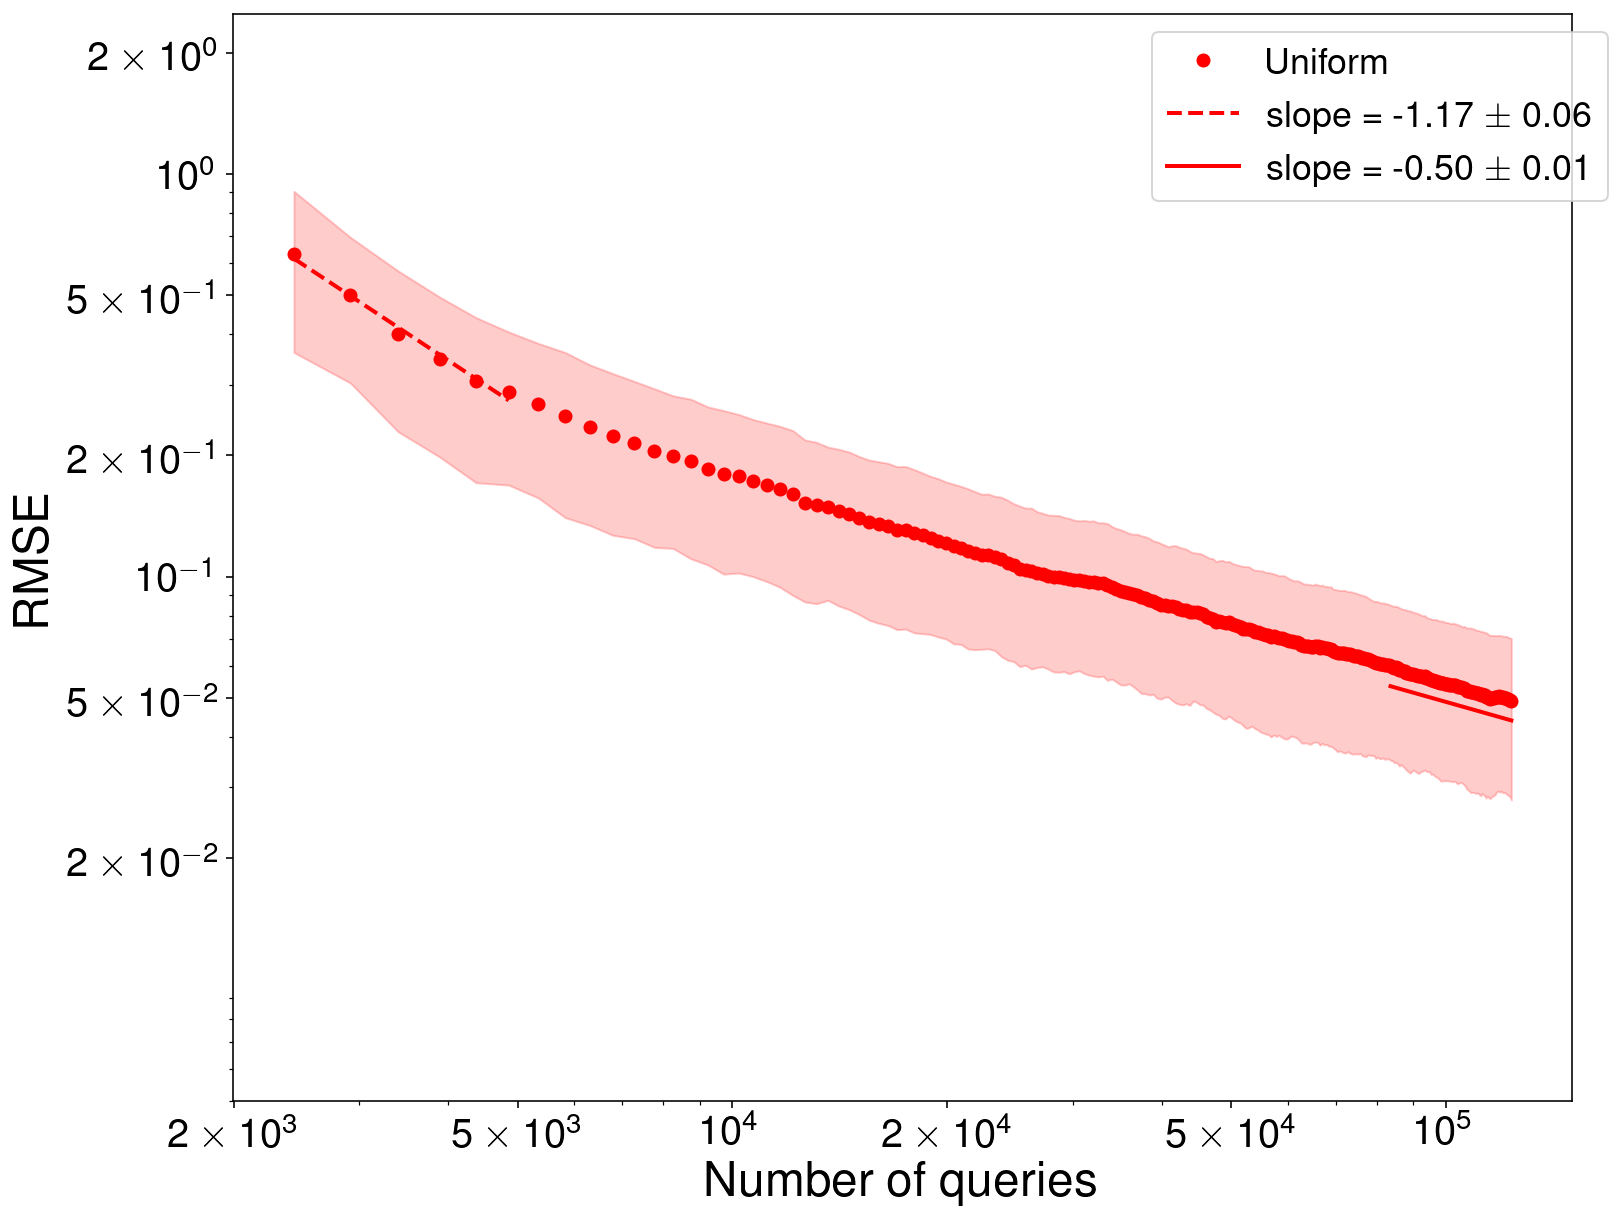

In [174]:
rmse_mean_FI_qinfer, rmse_std_FI_qinfer  = emp_est_FI_qinfer_sim.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

In [175]:
# SMC + HAL-FI + 2e4 particles
SAVE_DIR_log = 'qinfer_jobs/FI_sim_qinfer_002/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

FLAG_mod = True
factor_filter=1.9
FLAG_filter = True

FLAG_rmse_test = True

emp_est_FI_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                        N_0=N_0, N_batch=N_batch,
                                                        FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                        do_plot=False)

Outliers (RUN IDS) in RMSE are:
[5, 7, 76, 95, 100, 163, 174, 196]


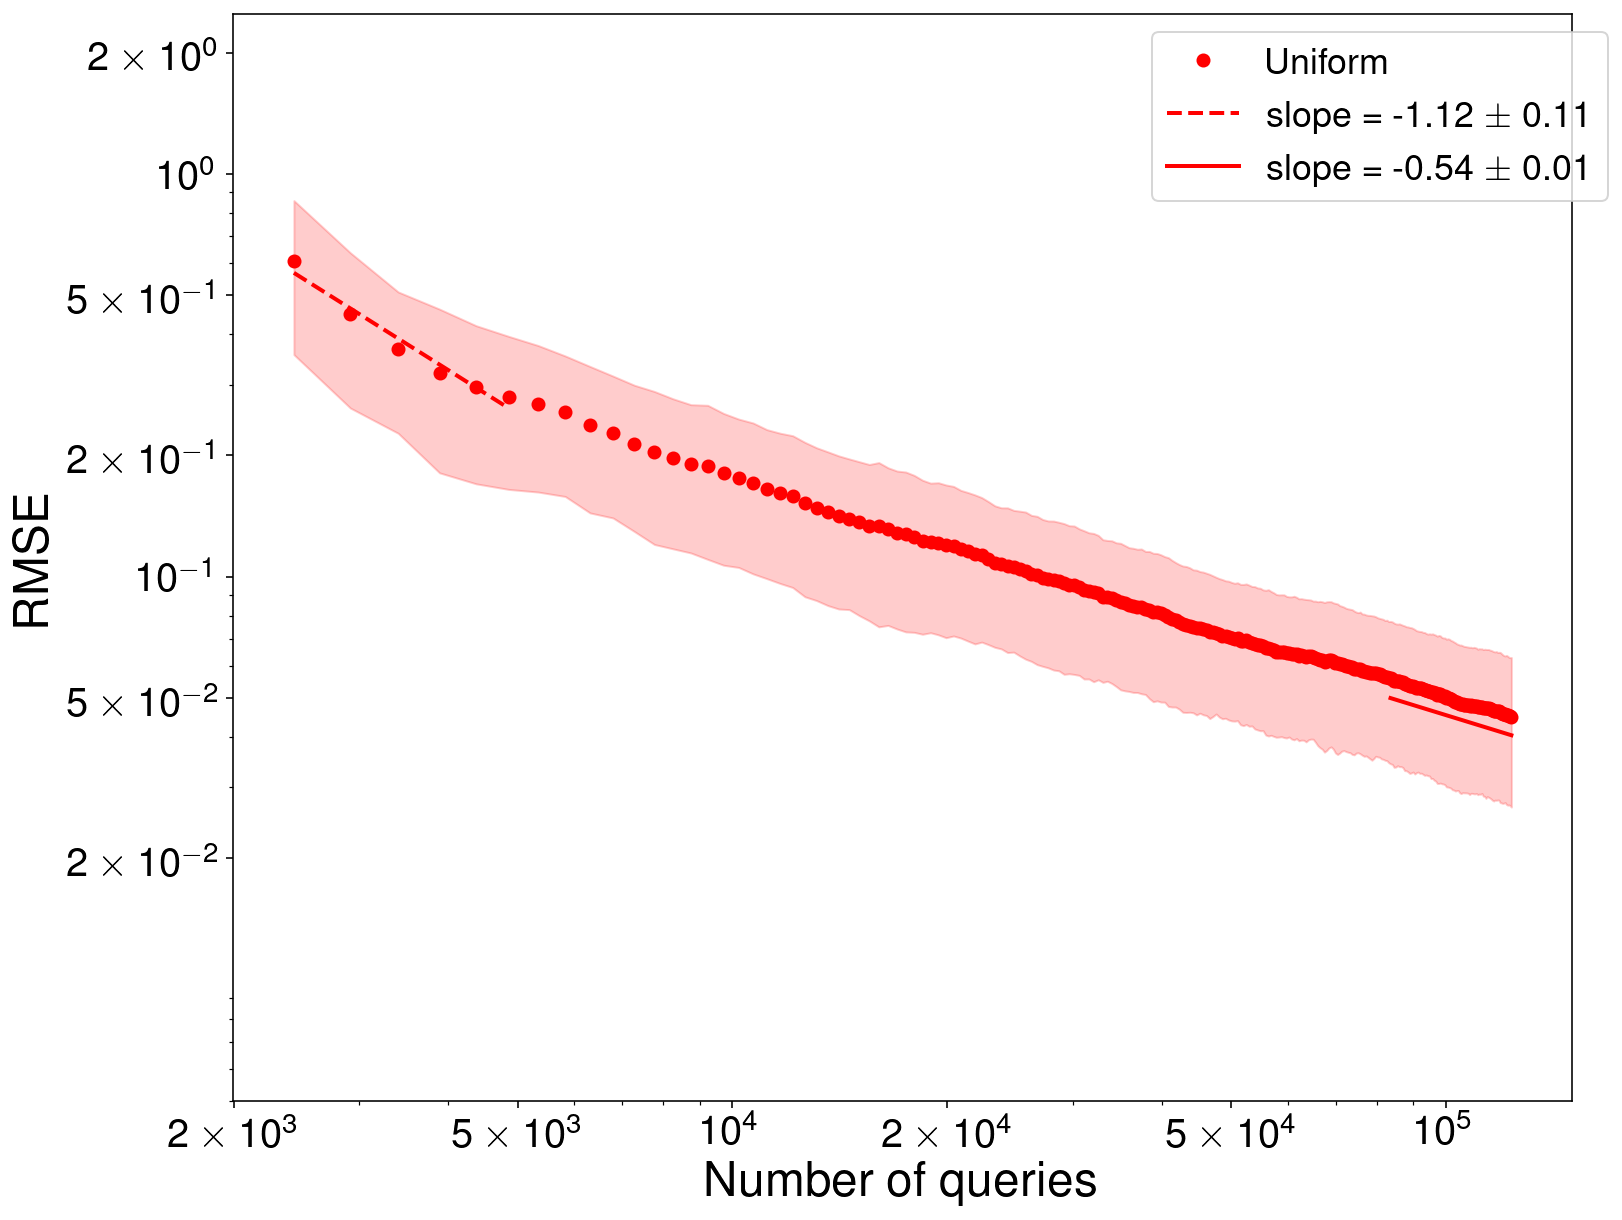

In [176]:
rmse_mean_FI_qinfer2, rmse_std_FI_qinfer2  = emp_est_FI_qinfer_sim.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

### Qinfer (SMC + Bayes Risk)

#### 1e4 particles

In [177]:
# SMC + BED + 1e4 particles
SAVE_DIR_log = 'qinfer_jobs/qinfer_bed_sim_001/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

FLAG_mod = True
factor_filter=1.9
FLAG_filter = True

FLAG_rmse_test = True

emp_est_BED_qinfer_sim = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                        N_0=N_0, N_batch=N_batch,
                                                        FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                        do_plot=False)

Outliers (RUN IDS) in RMSE are:
[7, 53, 86, 101, 108, 133, 139, 159, 174]


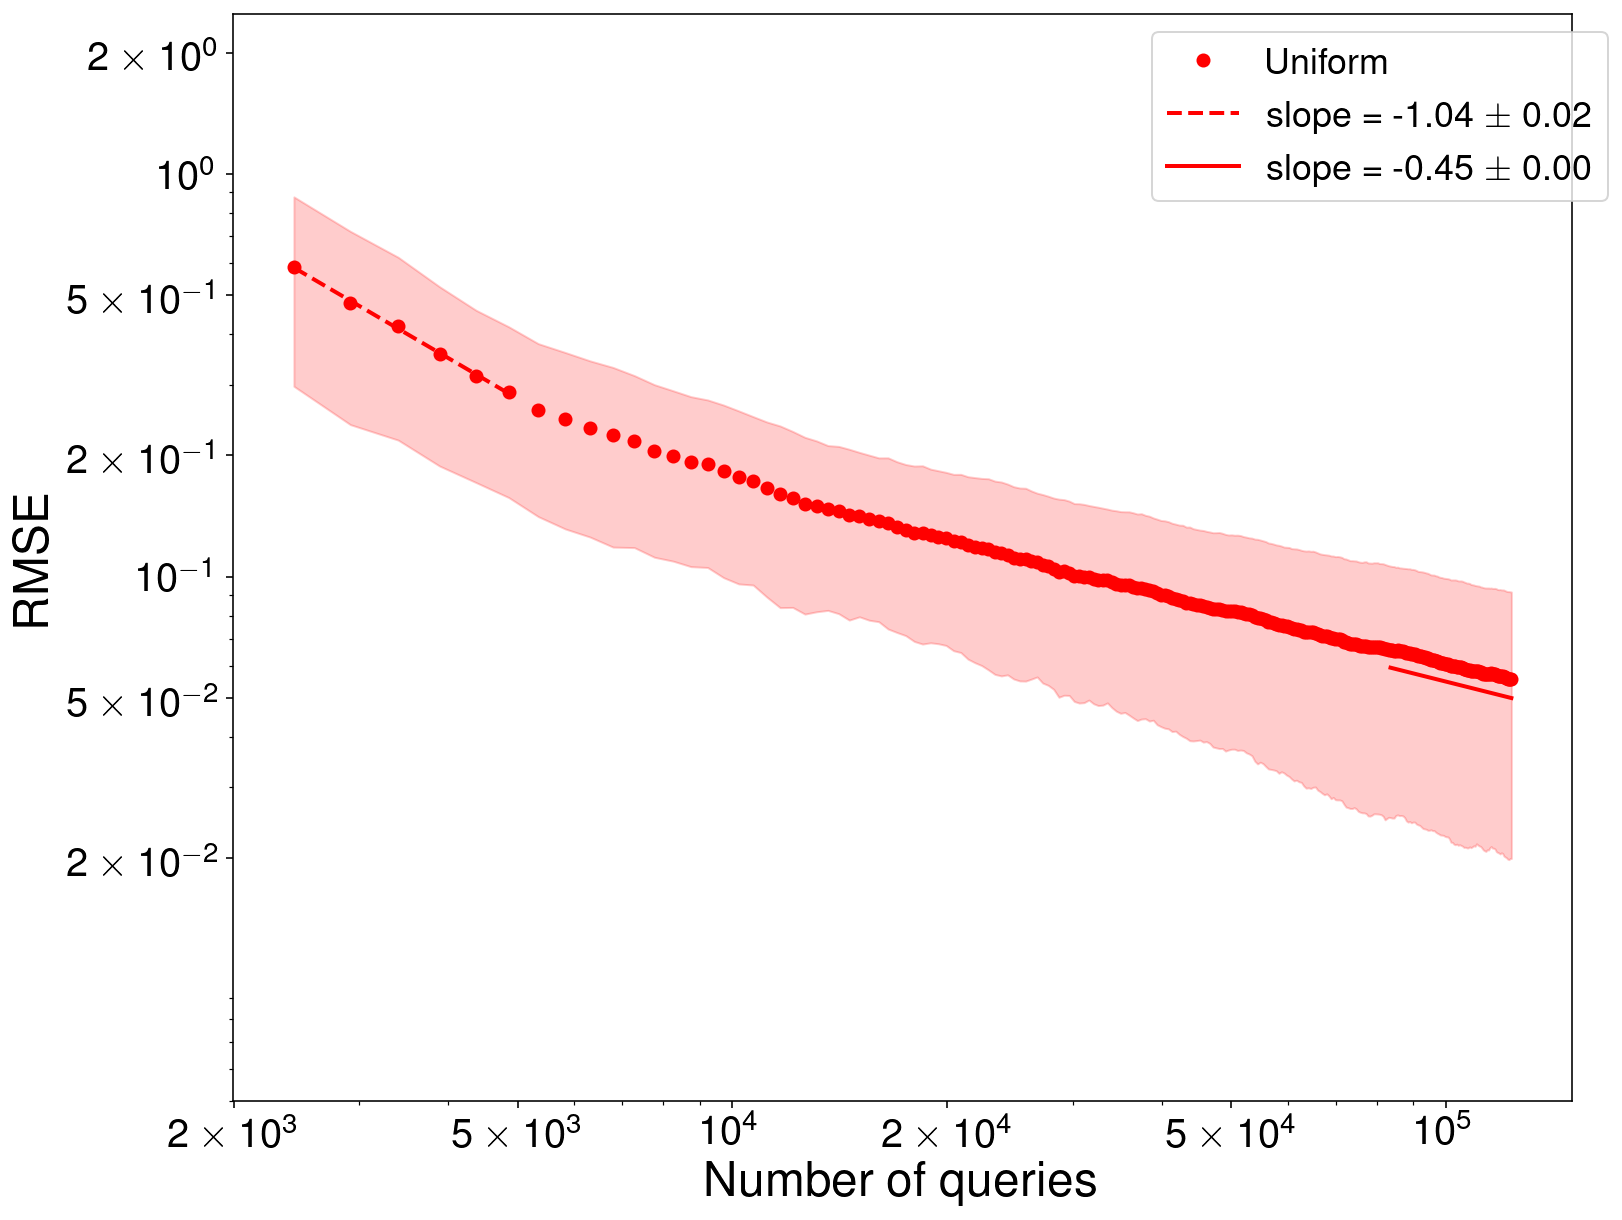

In [178]:
rmse_mean_BED_qinfer, rmse_std_BED_qinfer  = emp_est_BED_qinfer_sim.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

In [639]:
np.savetxt('results_qinfer_bed_sim.txt', rmse_mean_BED_qinfer, delimiter=' ')

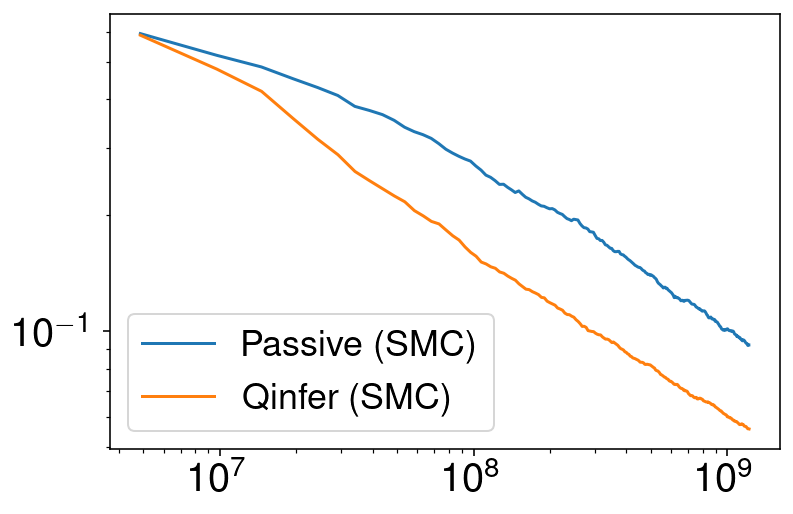

In [179]:
# Computational cost and small comparison against the PL case
max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6
n_particles = 1e4

n_queries = 81*6

cost = []
cost_temp = 0
for ind in range(max_iters):
    if ind == 0:
        # likelihood computation for estimation
        # for the first datapoint = this is just n_queries
        cost_temp += n_queries*n_particles
    elif ind > 0:
        # likelihood computation for risk computation
        cost_temp += n_queries*n_particles
        
        # likelihood computation for estimation -- just one query
        cost_temp += n_particles
    
    cost.append(cost_temp)

# plot
cost_BED_qinfer = copy.deepcopy(cost)
plt.plot(cost_qinfer3, rmse_mean_qinfer3, label='Passive (SMC)')
plt.plot(cost_BED_qinfer, rmse_mean_BED_qinfer, label='Qinfer (SMC)')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [180]:
print(cost_BED_qinfer[-1])
print(cost_qinfer3[-1])

1217490000.0
1215000000.0


#### 2e4 particles

In [181]:
# SMC + BED + 2e4 particles
SAVE_DIR_log = 'bayesian_estimator_jobs/qinfer_bed_sim_002/log_runs'

max_iters = 250
max_runs = 200
N_0 = 5*81*6
N_batch = 81*6

FLAG_mod = True
factor_filter=1.9
FLAG_filter = True

FLAG_rmse_test = True

emp_est_BED_qinfer_sim2 = job_processor.EmpiricalEstimator(SAVE_DIR_log, max_iters=max_iters, 
                                                        N_0=N_0, N_batch=N_batch,
                                                        FLAG_filter=FLAG_filter, FLAG_rmse_test=FLAG_rmse_test, 
                                                        do_plot=False)

Outliers (RUN IDS) in RMSE are:
[3, 45, 51, 168, 187]


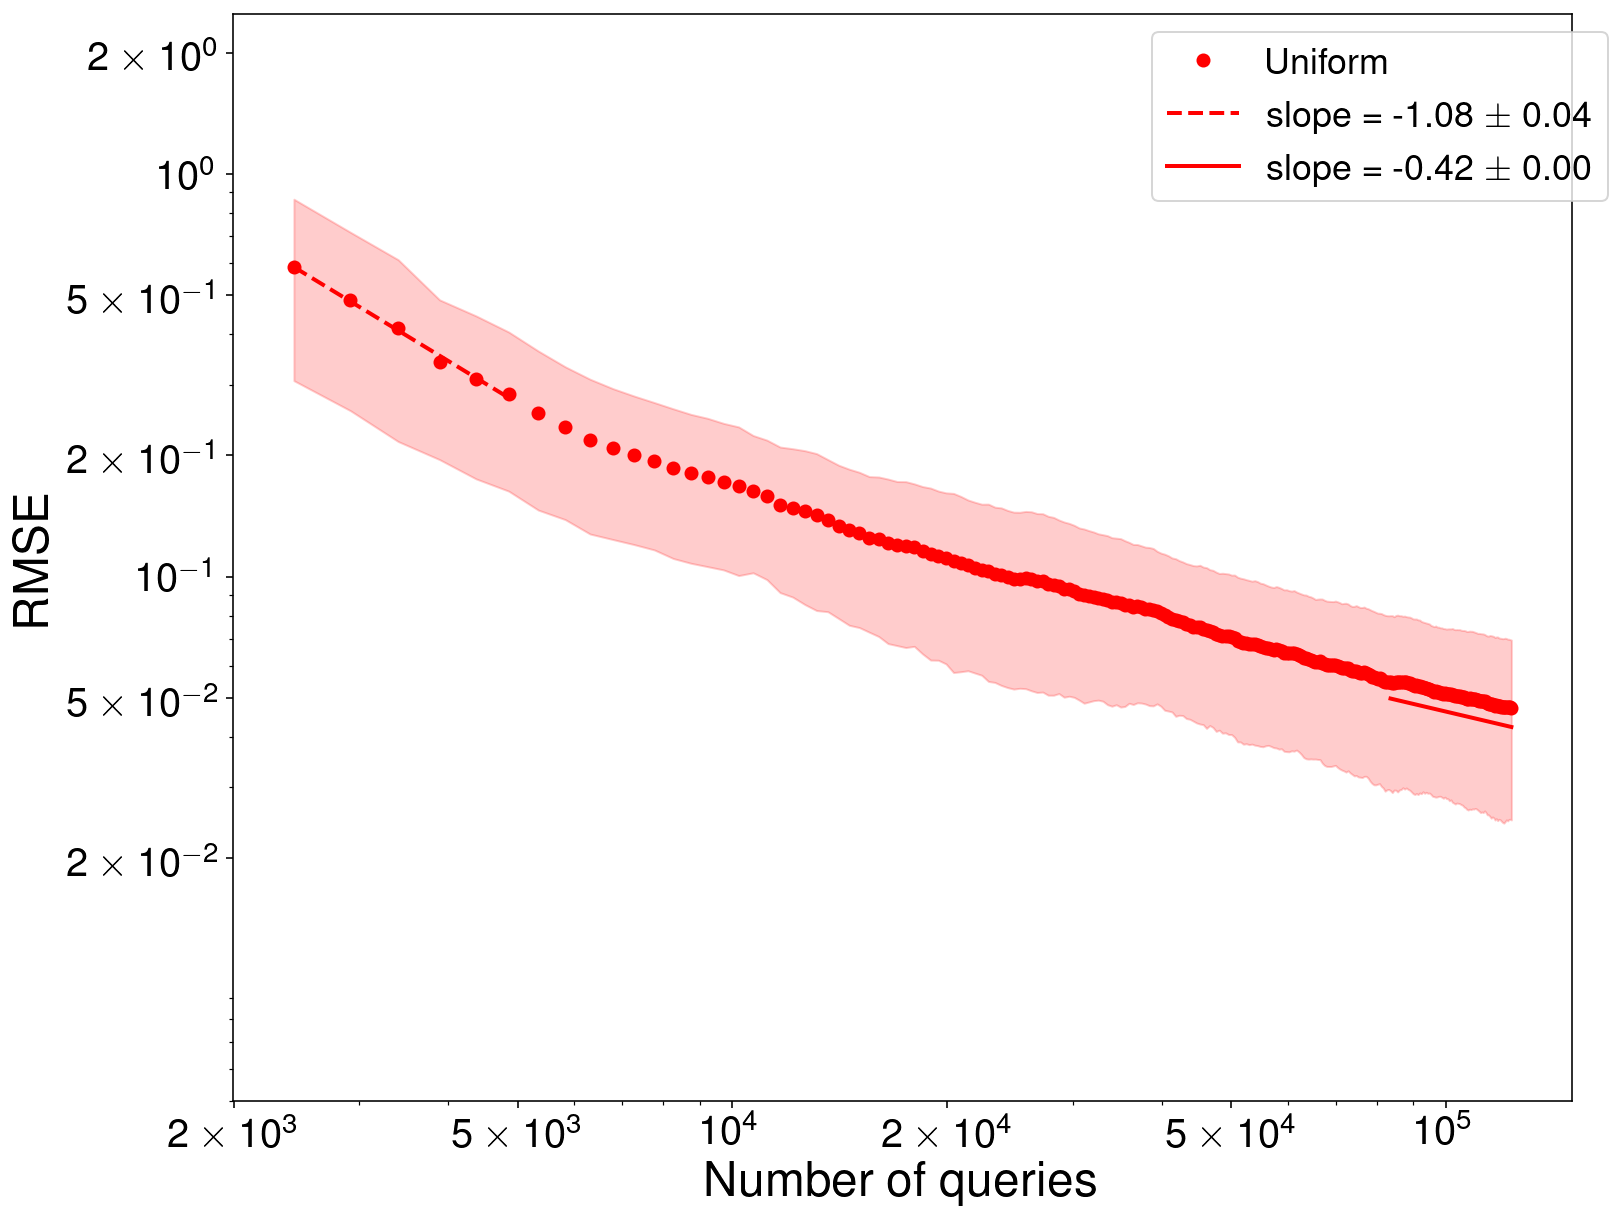

In [182]:
rmse_mean_BED_qinfer2, rmse_std_BED_qinfer2  = emp_est_BED_qinfer_sim2.plot_rmse(ind_iter_filter=[0], FLAG_plot=True)

## Summary

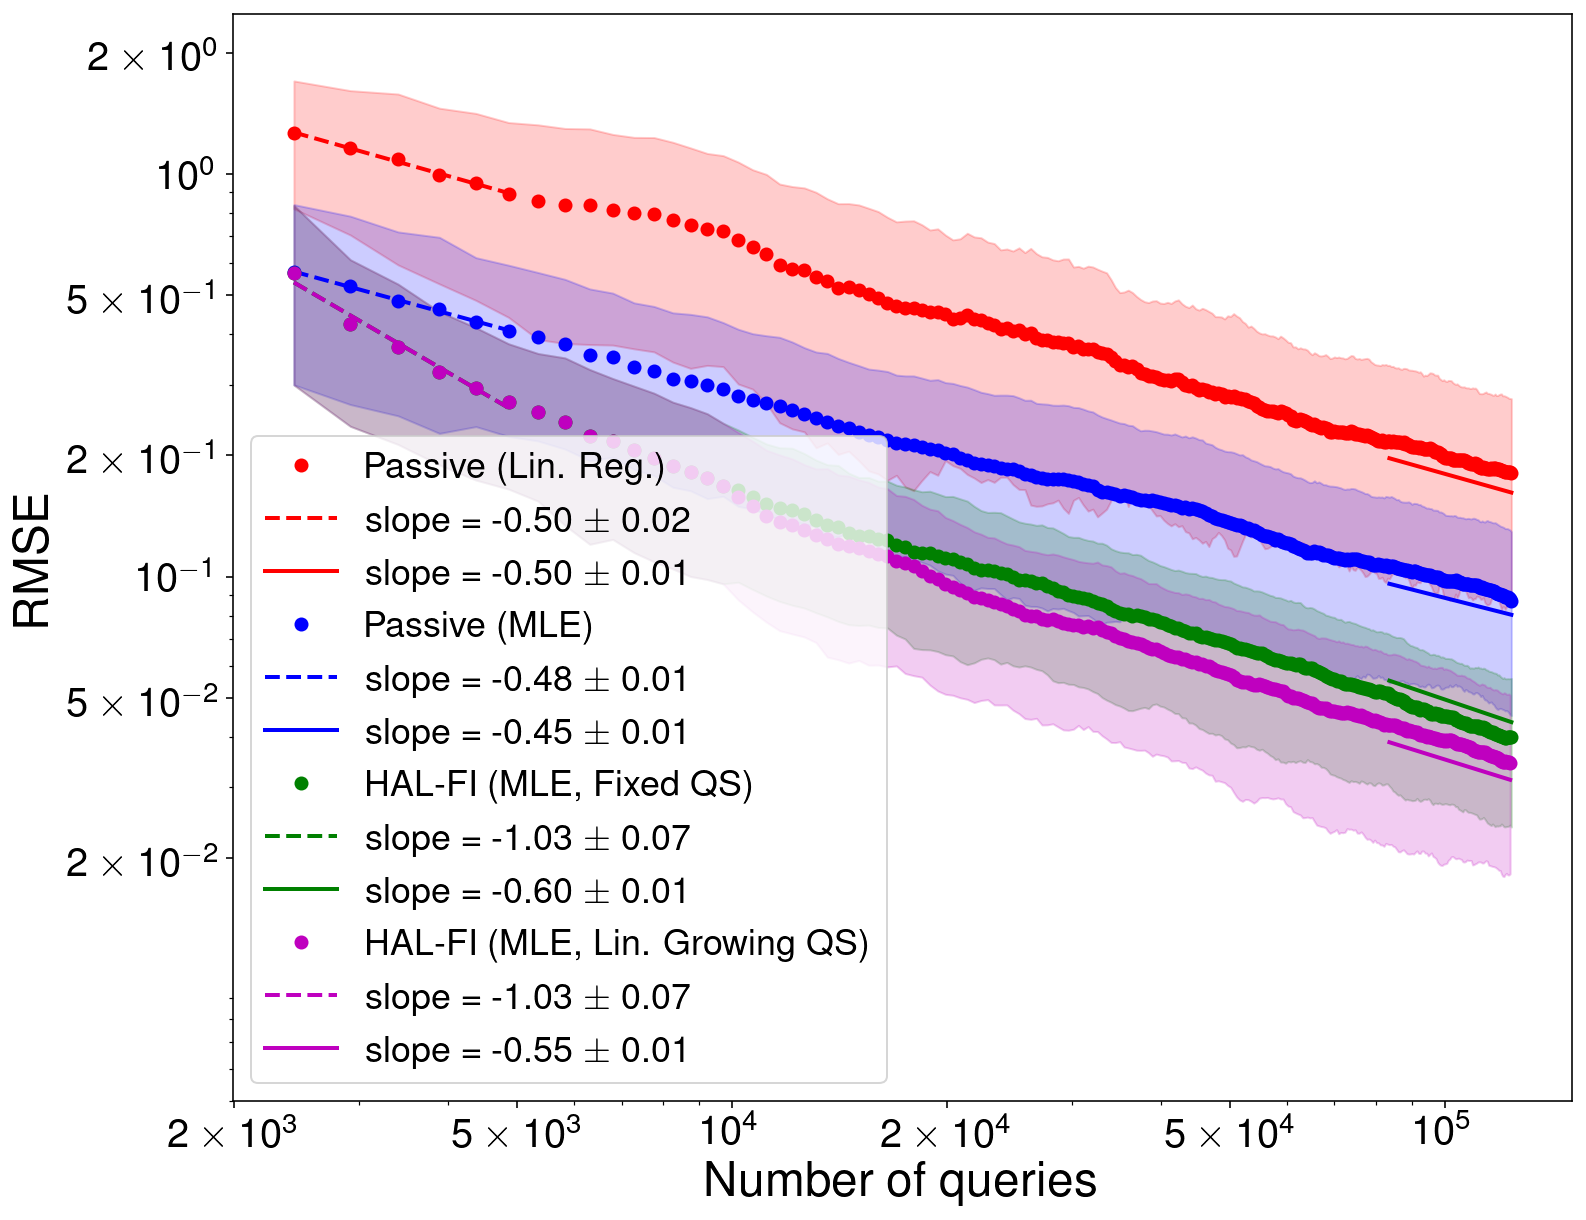

In [183]:
# Plotting
L2_error_plot = []
L2_error_plot.append(results_job_baseline_sim['rmse_mean'])
L2_error_plot.append(results_job_PL_sim['rmse_mean'])
L2_error_plot.append(results_job_AL_sim['rmse_mean'])
L2_error_plot.append(rmse_mean_AL_sim_lin_qs)

nqueries_plot = []
_key = 'N_p'
nqueries_plot.append(results_job_baseline_sim[_key])
nqueries_plot.append(results_job_PL_sim[_key])
nqueries_plot.append(results_job_AL_sim[_key])
nqueries_plot.append(emp_est_AL_sim_lin_qs.N_p)

errorbars_plot = []
_key = 'rmse_std'
errorbars_plot.append(results_job_baseline_sim[_key])
errorbars_plot.append(results_job_PL_sim[_key])
errorbars_plot.append(results_job_AL_sim[_key])
errorbars_plot.append(rmse_std_AL_sim_lin_qs)

labels_plot = []
labels_plot.append('Passive (Lin. Reg.)')
labels_plot.append('Passive (MLE)')
labels_plot.append('HAL-FI (MLE, Fixed QS)')
labels_plot.append('HAL-FI (MLE, Lin. Growing QS)')

plotting_options = {'label_learners': labels_plot,
                    'skip_learner': 0,
                    'save_filename': 'comparison_PL_AL_sim_001.pdf',
                    #'save_filename': 'comparison_PL_AL_qinfer_sim.png',
                    'FLAG_legend_outside': False,
                    #'slope_scales': [0.9, 0.9, 1.1, 0.9]}
                    'slope_scales': [0.9, 0.9, 1.1, 0.9, 1.1, 0.9, 0.9, 0.9]}

job_processor.plot_trend(L2_error_plot, nqueries_plot, error_learners=errorbars_plot,
                         plotting_options=plotting_options)

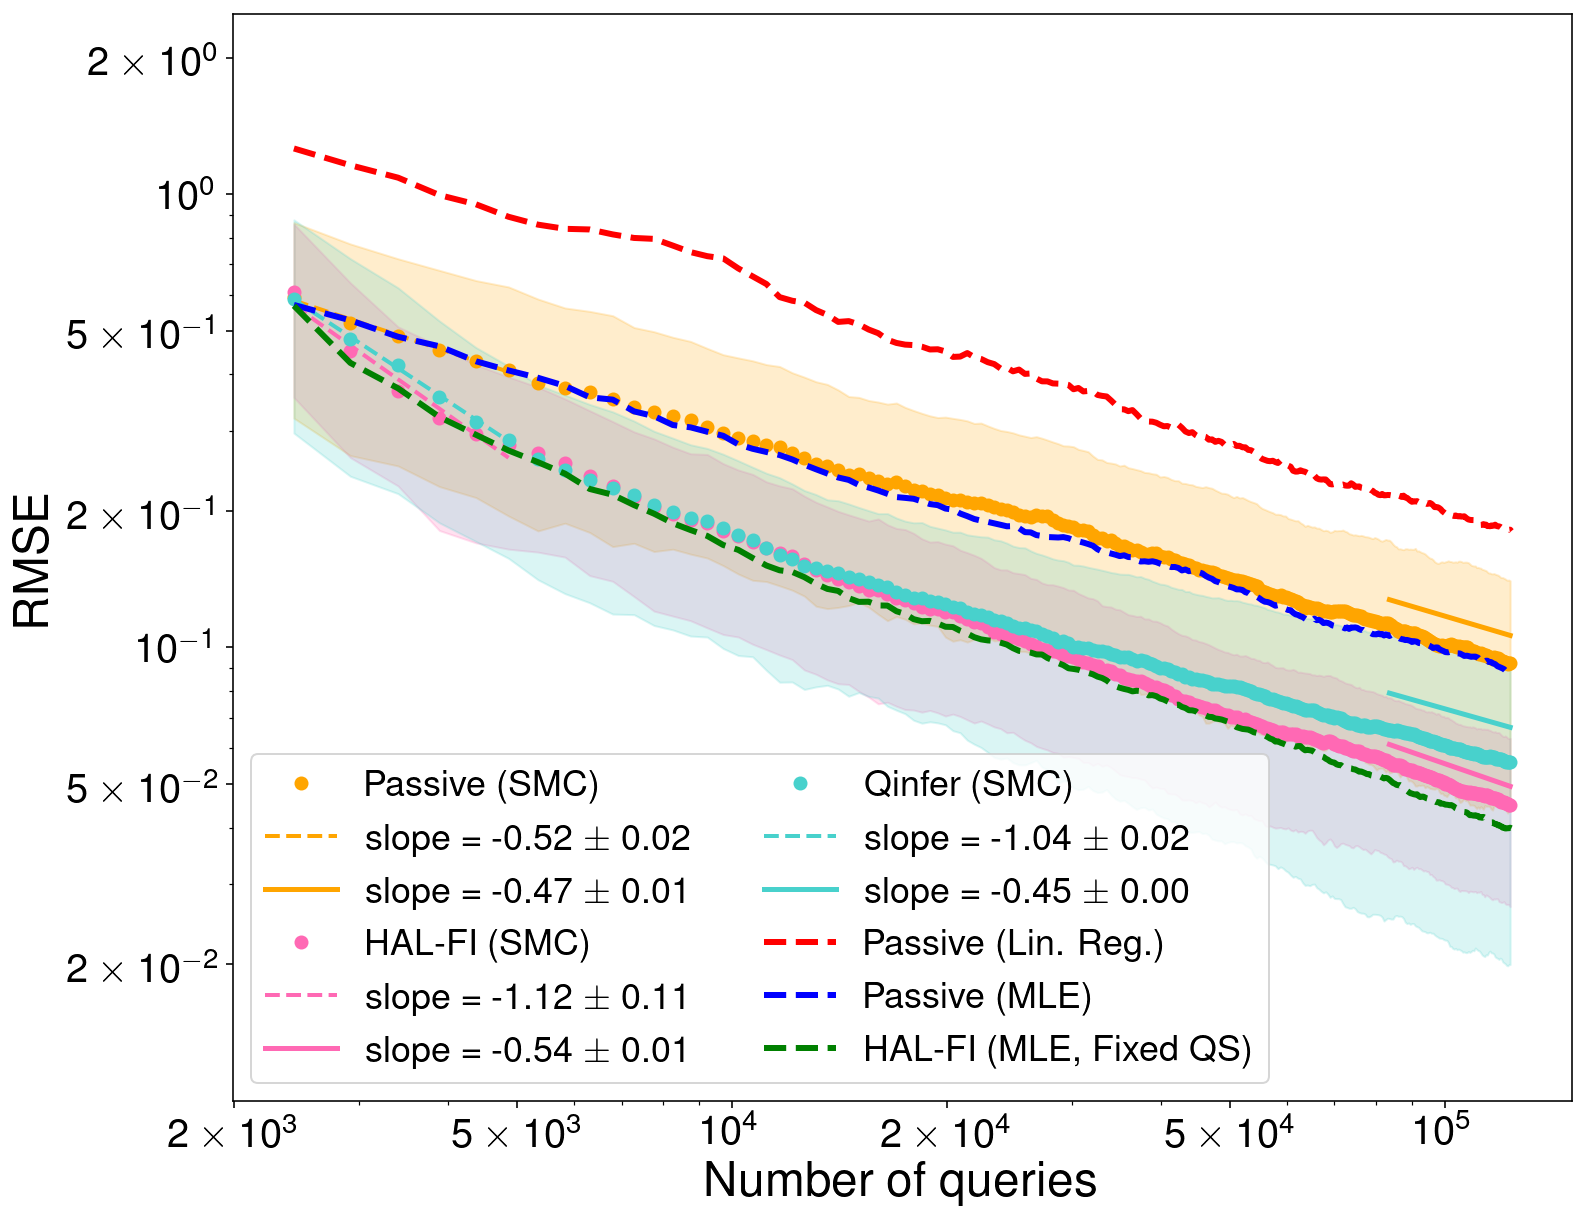

In [184]:
# Plotting
L2_error_plot = []
L2_error_plot.append(rmse_mean_qinfer3)
L2_error_plot.append(rmse_mean_FI_qinfer2)
L2_error_plot.append(rmse_mean_BED_qinfer)

L2_error_plot.append(results_job_baseline_sim['rmse_mean'])
L2_error_plot.append(results_job_PL_sim['rmse_mean'])
L2_error_plot.append(results_job_AL_sim['rmse_mean'])

nqueries_plot = []
_key = 'N_p'
nqueries_plot.append(emp_est_AL_sim_lin_qs.N_p)
nqueries_plot.append(emp_est_AL_sim_lin_qs.N_p)
nqueries_plot.append(emp_est_AL_sim_lin_qs.N_p)

nqueries_plot.append(results_job_baseline_sim[_key])
nqueries_plot.append(results_job_PL_sim[_key])
nqueries_plot.append(results_job_AL_sim[_key])

errorbars_plot = []
_key = 'rmse_std'
errorbars_plot.append(rmse_std_qinfer3)
errorbars_plot.append(rmse_std_FI_qinfer2)
errorbars_plot.append(rmse_std_BED_qinfer)

errorbars_plot.append(results_job_baseline_sim[_key])
errorbars_plot.append(results_job_PL_sim[_key])
errorbars_plot.append(results_job_AL_sim[_key])

FLAG_plot_error_learners = [True]*len(L2_error_plot)
FLAG_plot_error_learners[3:] = [False]*3

labels_plot = []
labels_plot.append('Passive (SMC)')
labels_plot.append('HAL-FI (SMC)')
labels_plot.append('Qinfer (SMC)')

labels_plot.append('Passive (Lin. Reg.)')
labels_plot.append('Passive (MLE)')
labels_plot.append('HAL-FI (MLE, Fixed QS)')

plotting_options = {'label_learners': labels_plot,
                    'skip_learner': 0,
                    #'save_filename': 'comparison_PL_AL_sim_001.png',
                    'save_filename': 'comparison_PL_AL_qinfer_sim.pdf',
                    'FLAG_legend_outside': False,
                    #'slope_scales': [0.9, 0.9, 1.1, 0.9]}
                    'slope_scales': [1.15, 1.1, 1.2, 0.9, 1.1, 0.9, 0.9, 0.9]}

job_processor.plot_trend_compare_mle_bayesian(L2_error_plot, nqueries_plot, error_learners=errorbars_plot, 
                                              FLAG_plot_error_learners=FLAG_plot_error_learners,
                         plotting_options=plotting_options)